In [48]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from IPython.display import display
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Define the directory path
#directory_path = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/Precipitation/'
directory_path = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/ERA5_precipitation/' #Add you directory where you have stored you precipitation files

# Initialize an empty list to store file names
file_names = []

for file_name in os.listdir(directory_path):
    # Check if the item is a file
    if os.path.isfile(os.path.join(directory_path, file_name)):
        # Append the file name to the list
        file_names.append(file_name)

# Print the list of file names
#print(file_names)

col_head = ['Lat', 'Long', 'Time', 'Temp']
df_temp = pd.DataFrame(columns=col_head)
arr_tp = np.empty((1,16)) #Here 16 is the no of station ADD your total number of precipitation stations
arr_time = np.empty((1))
for fname in file_names:
    nc_path = os.path.join(directory_path, fname)
    nc_data = Dataset(nc_path,'r')
    var_data = {}
    #print(nc_data.variables)
    for var in nc_data.variables:
            var_data[var] = nc_data.variables[var][:]
        
    nc_data.close()
    long = var_data.get('longitude')
    long_shape = len(long)
    print(long)
    lat = var_data.get('latitude')
    lat_shape = len(lat)
    print(lat)
    time = var_data.get('time')
    tp = var_data.get('tp')
    arr_tp_temp = tp.reshape(tp.shape[0],-1)
    arr_tp = np.concatenate((arr_tp, arr_tp_temp), axis=0)
    arr_time = np.concatenate((arr_time,time), axis=0)
    
#print(long)    
#print(lat)
arr_time = arr_time[1:] #remove first row
arr_tp = arr_tp[1:] #remove first row
np.savetxt('raw_total_precip_era5_land.csv', arr_tp, delimiter=',', fmt='%f')
print(arr_tp)
print(arr_time)

[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76 83.86 83.96]
[28.55 28.45 28.35 28.25]
[83.66 83.76

In [55]:
work_dir = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/'
os.chdir(work_dir)

num_sta = long_shape*lat_shape
#wt_area = [0.112931,0.554999,0.248395,0.083675]
wt_area = [0, 0.007832, 0.191136, 0.122115, 0.000276, 0.113554, 0.141507, 0.015252, 0.077174, 0.190518, 0.054323, 0, 0.032091, 0.05142, 0.002803, 0] #ADD your weighted area ratio

df_precip = pd.DataFrame(arr_tp)
display(df_precip.shape)
df_precip['Time'] = arr_time
int_time = datetime(1900,1,1,00,0,0) #ADD your start time from your netcdf file
df_precip['DateTime'] = int_time + pd.to_timedelta(df_precip['Time'], unit='h')
df_precip['Date'] = pd.to_datetime(df_precip['DateTime']).dt.date
df_precip['Hour'] = pd.to_datetime(df_precip['DateTime']).dt.hour
col_name = df_precip.columns.tolist()
int_precip = df_precip.iloc[0,0:num_sta]
#display(df_precip)
#print(int_precip)
#print(col_name)
for x in col_name[0:len(col_name)-4]:
    x1 = 'XS-' + str(x)
    condition = df_precip['Hour'] != 1
    df_precip[x1] = np.where(condition,df_precip[x]-df_precip[x].shift(1),df_precip[x])

df_precip.iloc[0,num_sta+4:len(df_precip)]=int_precip
#remove the negative precipitation values
col_name = df_precip.columns.tolist()
for x in col_name[num_sta+4:len(col_name)]:
    condition2 = df_precip[x] < 0
    df_precip[x] = np.where(condition2, 0, df_precip[x])

#display(df_precip)
df_precip.to_csv('final_tp_ana_land.csv', index=False, header=True)
df_precip2 = df_precip.iloc[:,num_sta+2:len(df_precip)]
display(df_precip2)
df_precip2.to_csv('final_tp_station_land.csv', index=False, header=True)
col_name = df_precip2.columns.tolist()
df_precip2['Precip']=0
for x,y in zip(col_name[2:len(col_name)],wt_area):
    df_precip2['Precip'] += df_precip2[x] * y
final_precip = df_precip2[['Date', 'Hour', 'Precip']]
final_precip['Precip'] = round(final_precip['Precip'],4)
display(final_precip)
final_precip.to_csv('final_tp.txt',sep=' ', index=False, header=False)

(96432, 16)

Date  Hour          XS-0      XS-1      XS-2      XS-3  \
0      2010-01-01     0  2.190294e-05  0.000057  0.000082  0.000238   
1      2010-01-01     1  0.000000e+00  0.000000  0.000000  0.000000   
2      2010-01-01     2  1.033158e-07  0.000000  0.000000  0.000000   
3      2010-01-01     3  0.000000e+00  0.000000  0.000000  0.000000   
4      2010-01-01     4  0.000000e+00  0.000000  0.000000  0.000000   
...           ...   ...           ...       ...       ...       ...   
96427  2020-12-31    19  0.000000e+00  0.000000  0.000000  0.000000   
96428  2020-12-31    20  0.000000e+00  0.000000  0.000000  0.000000   
96429  2020-12-31    21  0.000000e+00  0.000000  0.000000  0.000000   
96430  2020-12-31    22  0.000000e+00  0.000000  0.000000  0.000000   
96431  2020-12-31    23  0.000000e+00  0.000000  0.000000  0.000000   

               XS-4          XS-5      XS-6      XS-7      XS-8          XS-9  \
0      6.529556e-05  1.316243e-04  0.000715  0.000957  0.000142  5.366220e-04   
1      0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
2      5.165788e-07  3.099473e-07  0.000000  0.000000  0.000002  3.099473e-07   
3      0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
4      0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
...             ...           ...       ...       ...       ...           ...   
96427  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96428  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96429  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96430  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96431  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   

          XS-10     XS-11     XS-12         XS-13         XS-14         XS-15  
0      0.001259  0.002727  0.000216  6.518191e-04  1.932625e-03  3.475955e-03  
1      0.000000  0.000000  0.000000  0.000000e+00  6.198945e-07  7.232103e-07  
2      0.000000  0.000000  0.000002  6.198945e-07  4.132630e-07  4.132630e-07  
3      0.000000  0.000000  0.000000  0.000000e+00  1.033158e-07  2.066315e-07  
4      0.000000  0.000000  0.000000  1.033158e-07  4.132630e-07  4.132630e-07  
...         ...       ...       ...           ...           ...           ...  
96427  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96428  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96429  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96430  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96431  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  

[96432 rows x 18 columns]

C:\Users\ACER\AppData\Local\Temp\ipykernel_7972\1865236733.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_precip['Precip'] = round(final_precip['Precip'],4)


Date  Hour  Precip
0      2010-01-01     0  0.0004
1      2010-01-01     1  0.0000
2      2010-01-01     2  0.0000
3      2010-01-01     3  0.0000
4      2010-01-01     4  0.0000
...           ...   ...     ...
96427  2020-12-31    19  0.0000
96428  2020-12-31    20  0.0000
96429  2020-12-31    21  0.0000
96430  2020-12-31    22  0.0000
96431  2020-12-31    23  0.0000

[96432 rows x 3 columns]

In [3]:
#calculation of geopotential height for ERA5 stations
#directory_path = ''
nc_path = os.path.join(directory_path, fname)
#ADD your geopotential file path
nc_data = Dataset('G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/geo_1279l4_0.1x0.1.grib2_v4_unpack (2).nc','r')
var_data = {}
df_z = np.empty((1))
print(nc_data.variables)
for var in nc_data.variables:
    var_data[var] = nc_data.variables[var][:]

nc_data.close()

for var,data in var_data.items():
    print(f"Variables:{var}")
    print(f"Data Type: {type(data)}")
    print(data)
    print(len(data))

z = var_data.get('z')
lat_z = var_data.get('latitude')
lon_z = var_data.get('longitude')

#arr_temp_z = z.flatten()
#arr_z = np.concatenate((arr_z, arr_temp_z), axis=0)
arr_z_2D = z.reshape(-1, z.shape[-1])
print(arr_z_2D)
print(len(lat_z))
print(len(lon_z))
arr_z = pd.DataFrame(arr_z_2D, index = lat_z, columns = lon_z)    

#arr_z = arr_z[1:]
#display(arr_z)

arr_z = arr_z/9.80665
display(arr_z)
arr_z.to_csv('final_z.csv', index=True, header=True)

print(lat[0])
print(lat[len(lat)-1])
print(long[0])
print(long[len(long)-1])
for x in lat_z:
    for y in lon_z:
        if ((x<=lat[0] and x>=lat[len(lat)-1]) and (y>=long[0] and y<=long[len(long)-1])):
            df_z = np.append(df_z, arr_z.loc[x,y])
print(df_z)
#print(len(arr_zh))
#station_ele = arr_zh[0:4]
#print(station_ele)

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (3600,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (1801,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:0.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -2147483647 used, 'z': <class 'netCDF4._netCDF4.Variable'>
float64 z(time, latitude, longitude)
    _FillValue: -32767.0
    missing_value: -32767
    units: m**2 s**-2
    long_name: Geopotential
    standard_name: geopotential
unlimited dimensions: 
current shape = (1, 1801, 3600)
filling on}
Variabl

0.000000     0.100000     0.200000     0.300000     0.400000    \
 90.000000     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.900002     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.800003    -0.468429    -0.468429    -0.468429    -0.468429    -0.468429   
 89.699997    -0.263568    -0.263568    -0.263568    -0.263568    -0.263568   
 89.599998     0.146155     0.146155     0.146155     0.146155     0.146155   
...                 ...          ...          ...          ...          ...   
-89.599998  2764.237286  2764.237286  2764.442148  2764.647009  2764.647009   
-89.699997  2770.690417  2770.690417  2770.895279  2770.895279  2771.100140   
-89.800003  2772.739030  2772.943892  2772.943892  2772.943892  2773.148753   
-89.900002  2774.377921  2774.377921  2774.582782  2774.582782  2774.582782   
-90.000000  2764.954301  2764.954301  2764.954301  2764.954301  2764.954301   

             0.500000     0.600000     0.700000     0.800000     0.900000    \
 90.000000     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.900002     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.800003    -0.468429    -0.468429    -0.468429    -0.468429    -0.468429   
 89.699997    -0.263568    -0.263568    -0.263568    -0.263568    -0.263568   
 89.599998     0.146155     0.146155     0.146155     0.146155     0.146155   
...                 ...          ...          ...          ...          ...   
-89.599998  2764.749440  2764.954301  2764.954301  2765.159162  2765.364024   
-89.699997  2771.100140  2771.305001  2771.305001  2771.509863  2771.714724   
-89.800003  2773.148753  2773.353614  2773.353614  2773.353614  2773.558476   
-89.900002  2774.582782  2774.582782  2774.582782  2774.787643  2774.787643   
-90.000000  2764.954301  2764.954301  2764.954301  2764.954301  2764.954301   

             1.000000     1.100000     1.200000     1.300000     1.400000    \
 90.000000     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.900002     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.800003    -0.468429    -0.468429    -0.468429    -0.468429    -0.468429   
 89.699997    -0.263568    -0.263568    -0.263568    -0.263568    -0.263568   
 89.599998     0.146155     0.146155     0.146155     0.146155     0.146155   
...                 ...          ...          ...          ...          ...   
-89.599998  2765.364024  2765.568885  2765.773746  2765.978607  2765.978607   
-89.699997  2771.714724  2771.919585  2771.919585  2772.124447  2772.124447   
-89.800003  2773.558476  2773.558476  2773.763337  2773.763337  2773.763337   
-89.900002  2774.787643  2774.787643  2774.787643  2774.787643  2774.787643   
-90.000000  2764.954301  2764.954301  2764.954301  2764.954301  2764.954301   

             1.500000     1.600000     1.700000     1.800000     1.900000    \
 90.000000     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.900002     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.800003    -0.468429    -0.468429    -0.468429    -0.468429    -0.468429   
 89.699997    -0.263568    -0.263568    -0.263568    -0.263568    -0.263568   
 89.599998     0.146155     0.146155     0.146155     0.146155     0.146155   
...                 ...          ...          ...          ...          ...   
-89.599998  2766.183469  2766.388330  2766.388330  2766.593191  2766.798053   
-89.699997  2772.329308  2772.329308  2772.534169  2772.534169  2772.739030   
-89.800003  2773.968198  2773.968198  2774.173060  2774.173060  2774.173060   
-89.900002  2774.992505  2774.992505  2774.992505  2774.992505  2774.992505   
-90.000000  2764.954301  2764.954301  2764.954301  2764.954301  2764.954301   

             2.000000     2.100000     2.200000     2.300000     2.400000    \
 90.000000     0.146155     0.146155     0.146155     0.146155     0.146155   
 89.900002     0.146155     0.146155     0.146155     0.146

28.55
28.25
83.66
83.96
[   0.         3158.59529476 3979.26967483 4295.98524936 2298.99726711
 2579.452391   2510.72142382 1594.58167653 1576.2465899  1303.57619553]


In [4]:
# Define the directory path for your temperature files
directory_path = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/ERA5 Land Temperature/'

# Initialize an empty list to store file names
file_names = []

# Iterate through each file in the directory
for file_name in os.listdir(directory_path):
    # Check if the item is a file
    if os.path.isfile(os.path.join(directory_path, file_name)):
        # Append the file name to the list
        file_names.append(file_name)

# Print the list of file names
#print(file_names)

col_head = ['Lat', 'Long', 'Time', 'Temp']
df_temp = pd.DataFrame(columns=col_head)
arr_temp = np.empty((1))
arr_time = np.empty((1))
for fname in file_names:
    nc_path = os.path.join(directory_path, fname)
    nc_data = Dataset(nc_path,'r')
    var_data = {}
    #print(nc_data.variables)
    for var in nc_data.variables:
        var_data[var] = nc_data.variables[var][:]
    
    nc_data.close()
    
    for var,data in var_data.items():
        print(f"Variables:{var}")
        print(f"Data Type: {type(data)}")
        print(data)
        
    long = var_data.get('longitude')
    long_shape = len(long)
    lat = var_data.get('latitude')
    lat_shape = len(lat)
    time = var_data.get('time')
    t2m = var_data.get('t2m')
    
    arr_temp_temp = t2m.flatten()
    time = np.repeat(time, long_shape*lat_shape)
    arr_temp = np.concatenate((arr_temp, arr_temp_temp), axis=0)
    arr_time = np.concatenate((arr_time,time), axis=0)
    
arr_time = arr_time[1:]
arr_temp = arr_temp[1:]
print(arr_temp)
print(arr_time)

{'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (4,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (4,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (744,)
filling on, default _FillValue of -2147483647 used, 't2m': <class 'netCDF4._netCDF4.Variable'>
int16 t2m(time, latitude, longitude)
    scale_factor: 0.000552015968308667
    add_offset: 273.4098955008049
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: 2 metre temperature
unlimited dimensions: 
current shape =

In [5]:
#Define elevation values for all stations
station_ele = [3189.919, 4096.932, 4697.022, 4689.186, 2584.246, 3167.179, 3430.846, 3453.278, 1952.894, 2085.184, 2016.217, 1943.932, 1518.64, 1471.562, 1324.083, 1155.267]
station_ele = [element * 0.006 for element in station_ele]

df_temp = pd.DataFrame(arr_temp)
df_temp.columns = ['Temp']
#display(df_temp)
df_temp['Time'] = arr_time
df_temp['DateTime'] = int_time + pd.to_timedelta(df_temp['Time'], unit='h')
# Change temperature to degree celcius
df_temp['Temp'] = df_temp['Temp']-273.1
#Calculate intercept using rate of -0.006 and 
df_temp_grp = df_temp.groupby(df_temp['DateTime']).apply(lambda group: (group['Temp']+station_ele).mean())

df_final_temp = df_temp_grp.to_frame()
df_final_temp.reset_index(inplace=True)
df_final_temp.columns = ['DateTime','Temp']
df_final_temp['Date'] = pd.to_datetime(df_final_temp['DateTime']).dt.date
df_final_temp['Hour'] = pd.to_datetime(df_final_temp['DateTime']).dt.hour
df_final_temp['Rate'] = -0.006
display(df_final_temp)
final_temp = df_final_temp[['Date','Hour','Temp','Rate']]
final_temp['Temp'] = round(final_temp['Temp'],4)
final_temp.to_csv('final_temp.txt',sep=' ', index=False, header=False)

DateTime       Temp        Date  Hour   Rate
0     2010-01-01 00:00:00  13.642402  2010-01-01     0 -0.006
1     2010-01-01 01:00:00  13.281970  2010-01-01     1 -0.006
2     2010-01-01 02:00:00  13.114019  2010-01-01     2 -0.006
3     2010-01-01 03:00:00  14.487883  2010-01-01     3 -0.006
4     2010-01-01 04:00:00  17.538496  2010-01-01     4 -0.006
...                   ...        ...         ...   ...    ...
96427 2020-12-31 19:00:00  16.808926  2020-12-31    19 -0.006
96428 2020-12-31 20:00:00  16.485296  2020-12-31    20 -0.006
96429 2020-12-31 21:00:00  16.095032  2020-12-31    21 -0.006
96430 2020-12-31 22:00:00  15.588686  2020-12-31    22 -0.006
96431 2020-12-31 23:00:00  14.748081  2020-12-31    23 -0.006

[96432 rows x 5 columns]

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\3416297701.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_temp['Temp'] = round(final_temp['Temp'],4)


In [6]:
#Add the directory where you have added the jupyter notebook
work_dir = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis'
os.chdir(work_dir)
df_Psta = pd.read_csv('final_tp_station_land.csv')
display(df_Psta)
df_Psta['Date'] = pd.to_datetime(df_Psta['Date'])
col_name= df_Psta.columns.to_list()
thres = [0.0001, 0.00001, 0.000001, 0.0000001]
col = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation']
Psta_summary = pd.DataFrame(columns=col)
#print(col_name)
#display(Psta_summary)
for t1 in thres:
    for cols in col_name[2:len(col_name)]:
        #print(cols)
        exceed_count = df_Psta[df_Psta[cols] > t1].groupby(df_Psta['Date'].dt.year).size() #count number of times threshold is exceeded
        #display(exceed_count)
        #display(df_Psta)
        nexceed_count = df_Psta[df_Psta[cols] < t1].groupby(df_Psta['Date'].dt.year).size() #count number of times threshold is not exceeded
        #display(nexceed_count)
        cond1 = df_Psta[cols] > t1
        cond2 = df_Psta[cols] < t1
        sum_exceed = df_Psta.loc[cond1, cols].groupby(df_Psta['Date'].dt.year).sum() #sum the precipitation values if threhold is exceeded
        sum_nexceed = df_Psta.loc[cond2,cols].groupby(df_Psta['Date'].dt.year).sum() #sum the precipitation values if threhold isn't exceeded
        #display(sum_exceed)
        #display(sum_nexceed)
        tot_precip = df_Psta[cols].groupby(df_Psta['Date'].dt.year).sum()
        Psta_summary_temp = pd.DataFrame({'Threshold':t1, 'Station':cols, 'Time exceeded':exceed_count, 'Time not exceeded':nexceed_count, 'Total precipitation':tot_precip, 'Exceeded precipitation':sum_exceed, 'Not exceeded precipitation':sum_nexceed})
        Psta_summary = pd.concat([Psta_summary,Psta_summary_temp], axis=0)

Psta_summary.reset_index(inplace=True)
Psta_summary.rename(columns={'index':'Year'}, inplace=True)
display(Psta_summary)
Psta_summary.to_csv('final_rainfall_land_summary.csv', index=True, header=True)        
        

Date  Hour          XS-0      XS-1      XS-2      XS-3  \
0      2010-01-01     0  2.190294e-05  0.000057  0.000082  0.000238   
1      2010-01-01     1  0.000000e+00  0.000000  0.000000  0.000000   
2      2010-01-01     2  1.033158e-07  0.000000  0.000000  0.000000   
3      2010-01-01     3  0.000000e+00  0.000000  0.000000  0.000000   
4      2010-01-01     4  0.000000e+00  0.000000  0.000000  0.000000   
...           ...   ...           ...       ...       ...       ...   
96427  2020-12-31    19  0.000000e+00  0.000000  0.000000  0.000000   
96428  2020-12-31    20  0.000000e+00  0.000000  0.000000  0.000000   
96429  2020-12-31    21  0.000000e+00  0.000000  0.000000  0.000000   
96430  2020-12-31    22  0.000000e+00  0.000000  0.000000  0.000000   
96431  2020-12-31    23  0.000000e+00  0.000000  0.000000  0.000000   

               XS-4          XS-5      XS-6      XS-7      XS-8          XS-9  \
0      6.529556e-05  1.316243e-04  0.000715  0.000957  0.000142  5.366220e-04   
1      0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
2      5.165788e-07  3.099473e-07  0.000000  0.000000  0.000002  3.099473e-07   
3      0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
4      0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
...             ...           ...       ...       ...       ...           ...   
96427  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96428  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96429  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96430  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   
96431  0.000000e+00  0.000000e+00  0.000000  0.000000  0.000000  0.000000e+00   

          XS-10     XS-11     XS-12         XS-13         XS-14         XS-15  
0      0.001259  0.002727  0.000216  6.518191e-04  1.932625e-03  3.475955e-03  
1      0.000000  0.000000  0.000000  0.000000e+00  6.198945e-07  7.232103e-07  
2      0.000000  0.000000  0.000002  6.198945e-07  4.132630e-07  4.132630e-07  
3      0.000000  0.000000  0.000000  0.000000e+00  1.033158e-07  2.066315e-07  
4      0.000000  0.000000  0.000000  1.033158e-07  4.132630e-07  4.132630e-07  
...         ...       ...       ...           ...           ...           ...  
96427  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96428  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96429  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96430  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  
96431  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  

[96432 rows x 18 columns]

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\746508321.py:28: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  Psta_summary = pd.concat([Psta_summary,Psta_summary_temp], axis=0)
C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\746508321.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Psta_summary = pd.concat([Psta_summary,Psta_summary_temp], axis=0)


Year     Threshold Station Time exceeded Time not exceeded  \
0    2010  1.000000e-04    XS-0          3056              5704   
1    2011  1.000000e-04    XS-0          3498              5262   
2    2012  1.000000e-04    XS-0          2976              5808   
3    2013  1.000000e-04    XS-0          3289              5471   
4    2014  1.000000e-04    XS-0          3054              5706   
..    ...           ...     ...           ...               ...   
699  2016  1.000000e-07   XS-15          7288              1496   
700  2017  1.000000e-07   XS-15          7156              1604   
701  2018  1.000000e-07   XS-15          7616              1144   
702  2019  1.000000e-07   XS-15          7561              1199   
703  2020  1.000000e-07   XS-15          7202              1582   

     Total precipitation  Exceeded precipitation  Not exceeded precipitation  
0               2.475941                2.399590                7.635096e-02  
1               2.652690                2.569681                8.300881e-02  
2               2.134993                2.055999                7.899398e-02  
3               2.717817                2.640158                7.765867e-02  
4               2.149809                2.076678                7.313175e-02  
..                   ...                     ...                         ...  
699             5.013390                5.013389                1.662617e-06  
700             4.332637                4.332637                8.326673e-17  
701             4.882790                4.882790                2.878827e-08  
702             4.483190                4.483190                8.082500e-09  
703             5.582232                5.582231                7.181263e-08  

[704 rows x 8 columns]

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
0   2010          3056              5704
1   2011          3498              5262
2   2012          2976              5808
3   2013          3289              5471
4   2014          3054              5706
5   2015          2938              5822
6   2016          3440              5344
7   2017          3171              5589
8   2018          3527              5233
9   2019          3202              5558
10  2020          3462              5322

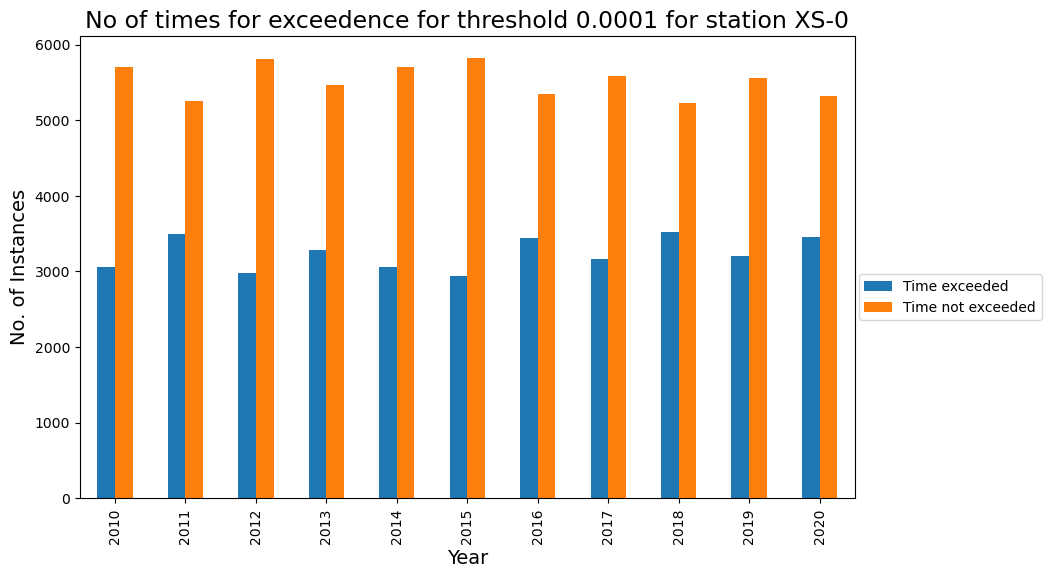

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
11  2010          2901              5859
12  2011          3262              5498
13  2012          2922              5862
14  2013          3186              5574
15  2014          2893              5867
16  2015          2768              5992
17  2016          3205              5579
18  2017          2955              5805
19  2018          3355              5405
20  2019          3105              5655
21  2020          3234              5550

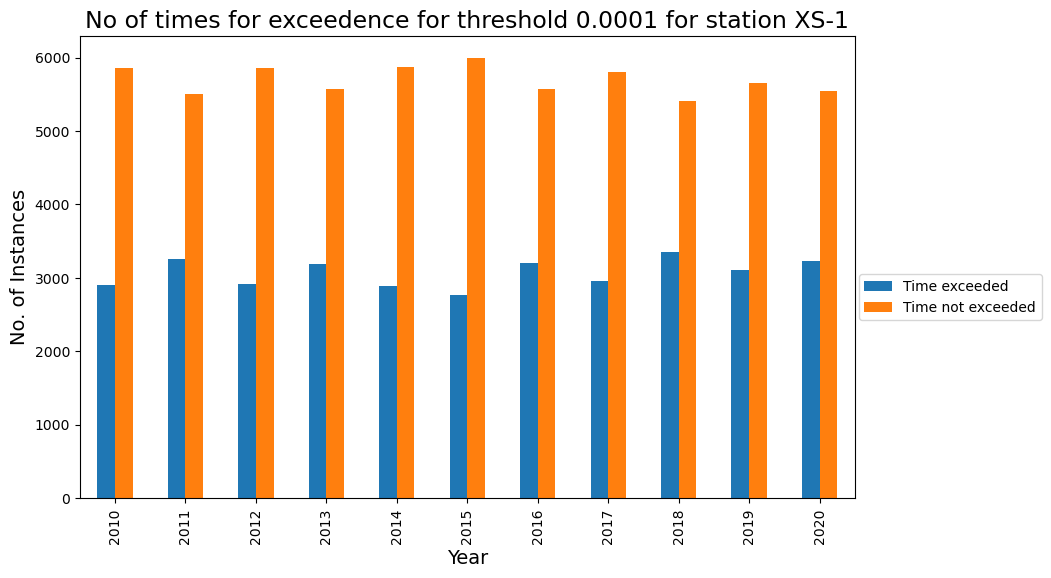

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
22  2010          2847              5913
23  2011          3157              5603
24  2012          2892              5892
25  2013          3124              5636
26  2014          2836              5924
27  2015          2718              6042
28  2016          3145              5639
29  2017          2885              5875
30  2018          3263              5497
31  2019          3112              5648
32  2020          3153              5631

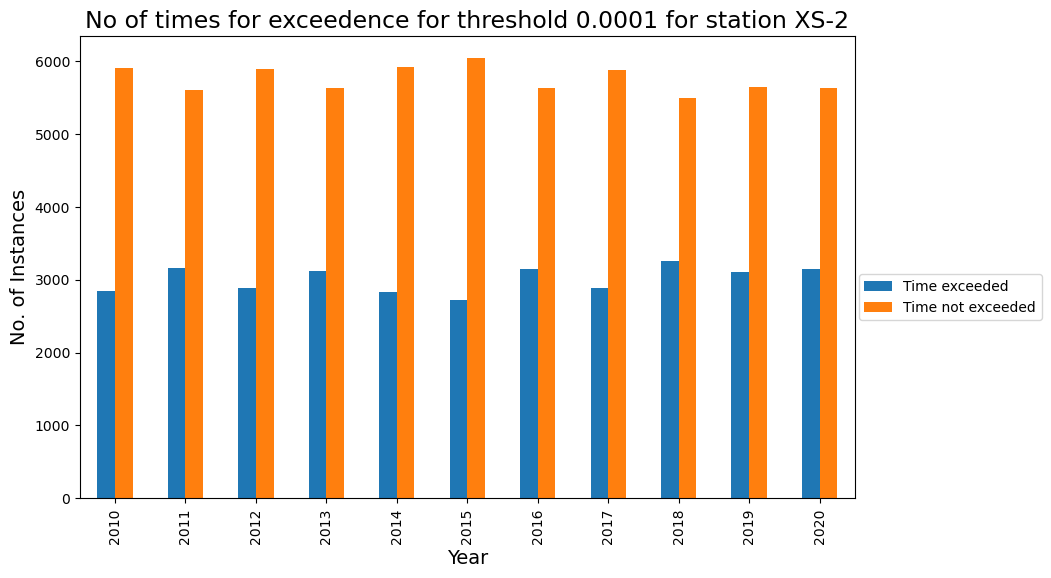

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
33  2010          2904              5856
34  2011          3215              5545
35  2012          2957              5827
36  2013          3248              5512
37  2014          2860              5900
38  2015          2862              5898
39  2016          3212              5572
40  2017          3004              5756
41  2018          3292              5468
42  2019          3227              5533
43  2020          3107              5677

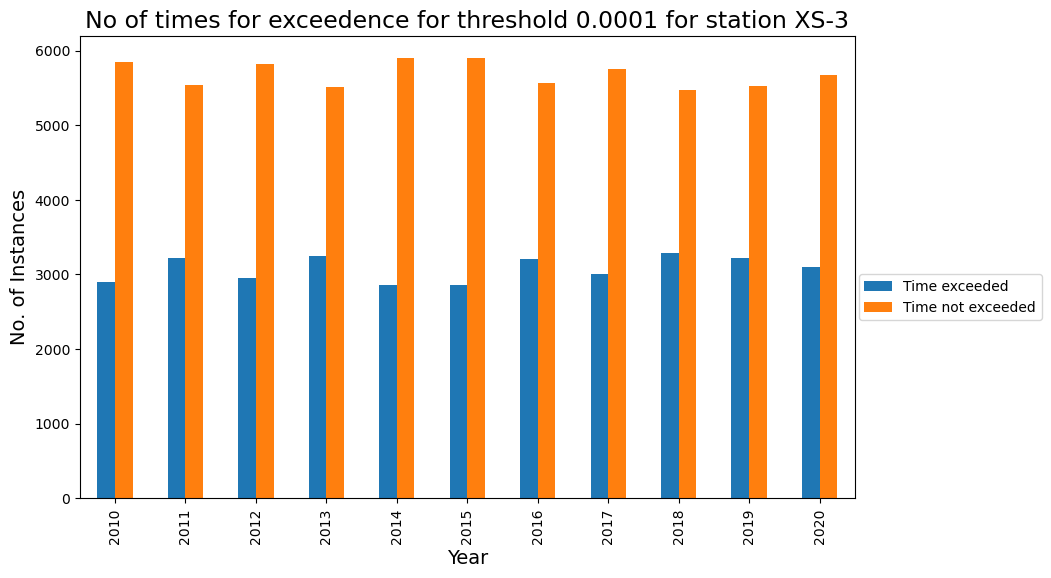

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
44  2010          3123              5637
45  2011          3518              5242
46  2012          2961              5823
47  2013          3375              5385
48  2014          3110              5650
49  2015          3071              5689
50  2016          3542              5242
51  2017          3300              5460
52  2018          3582              5178
53  2019          3227              5533
54  2020          3566              5218

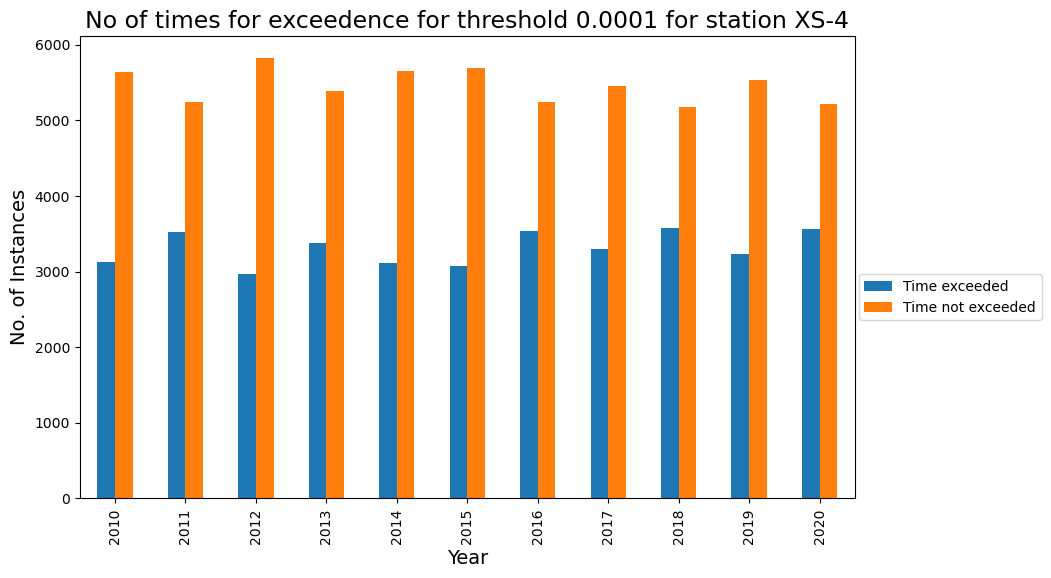

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
55  2010          3037              5723
56  2011          3378              5382
57  2012          2914              5870
58  2013          3251              5509
59  2014          2991              5769
60  2015          2975              5785
61  2016          3372              5412
62  2017          3134              5626
63  2018          3454              5306
64  2019          3223              5537
65  2020          3378              5406

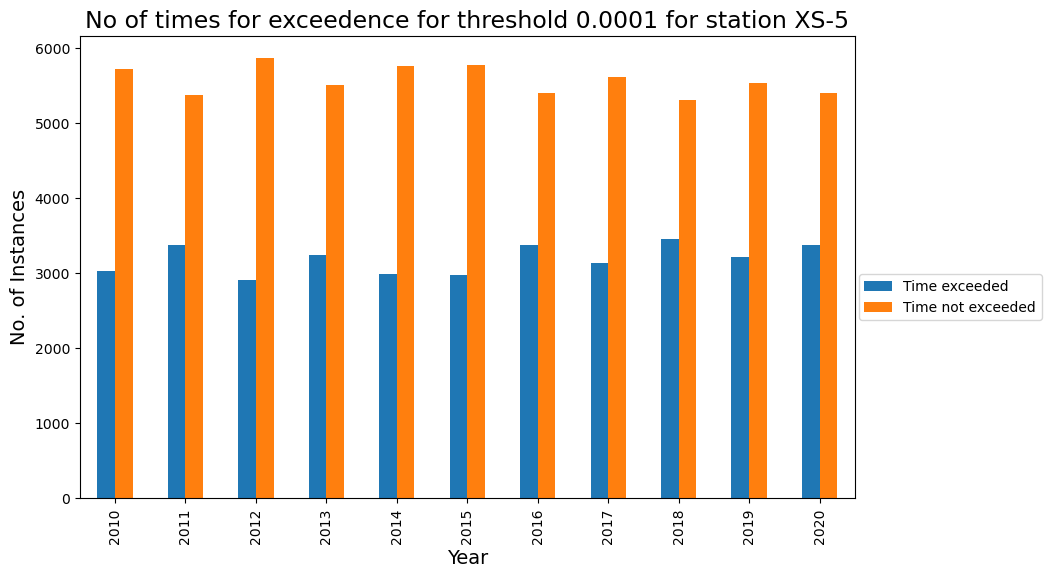

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
66  2010          3419              5341
67  2011          3774              4986
68  2012          3267              5517
69  2013          3741              5019
70  2014          3403              5357
71  2015          3559              5201
72  2016          3791              4993
73  2017          3566              5194
74  2018          3942              4818
75  2019          3816              4944
76  2020          3346              5438

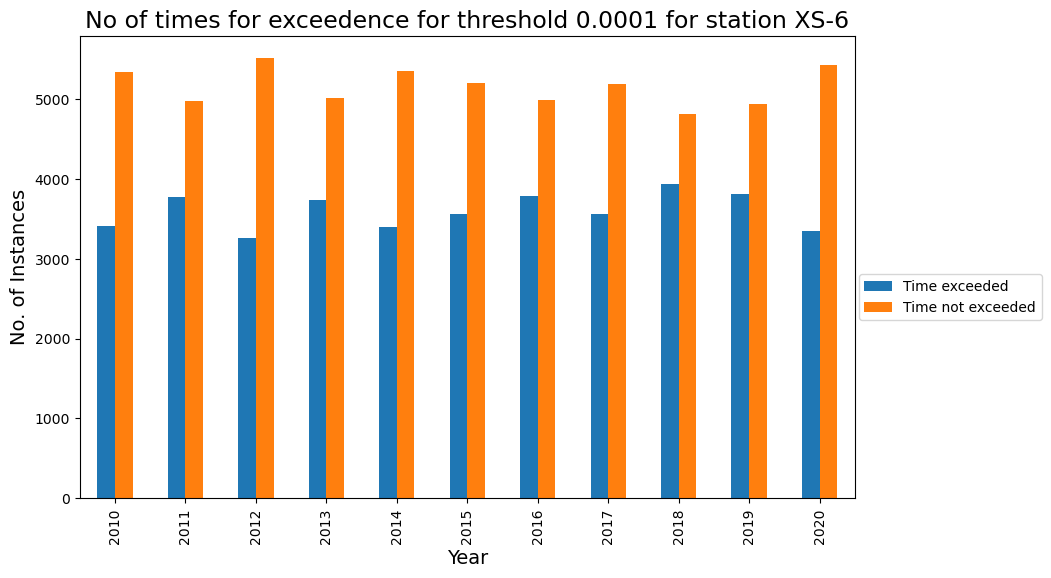

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
77  2010          3488              5272
78  2011          3860              4900
79  2012          3361              5423
80  2013          3866              4894
81  2014          3486              5274
82  2015          3705              5055
83  2016          3897              4887
84  2017          3666              5094
85  2018          4047              4713
86  2019          3931              4829
87  2020          3437              5347

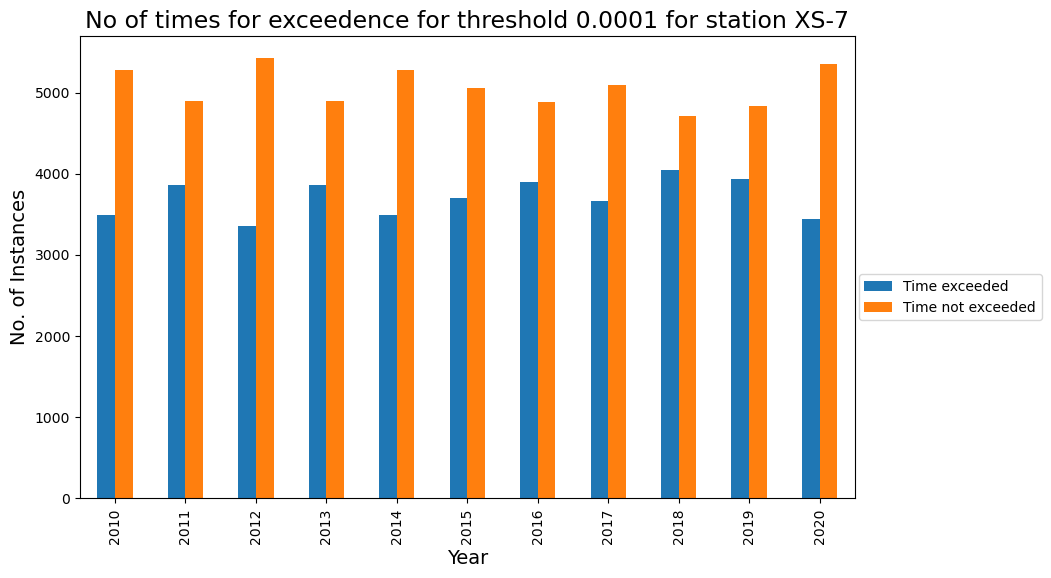

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
88  2010          2970              5790
89  2011          3391              5369
90  2012          2712              6072
91  2013          3223              5537
92  2014          2964              5796
93  2015          3064              5696
94  2016          3397              5387
95  2017          3141              5619
96  2018          3442              5318
97  2019          3134              5626
98  2020          3453              5331

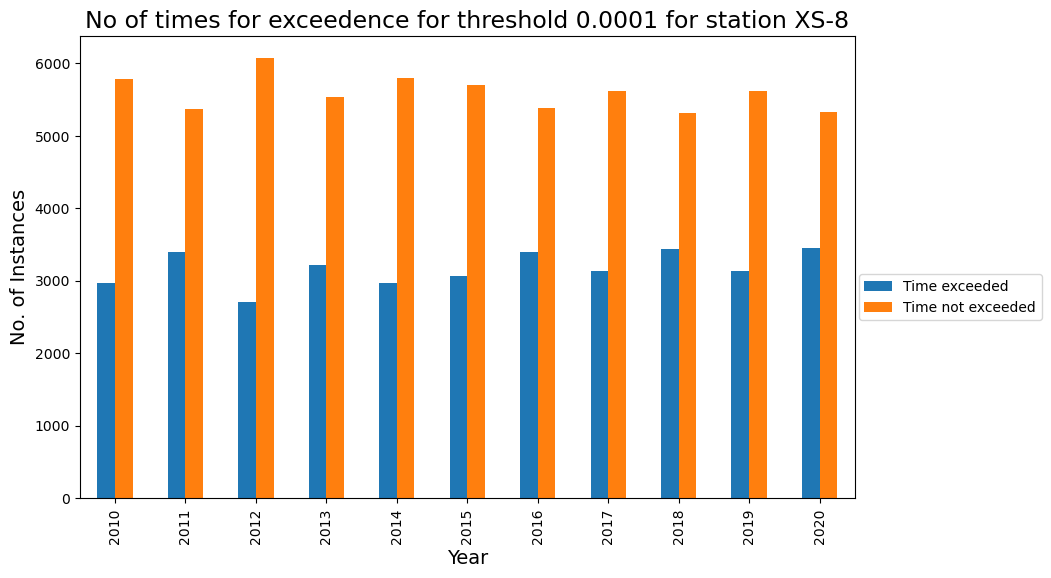

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
99   2010          3125              5635
100  2011          3565              5195
101  2012          2878              5906
102  2013          3513              5247
103  2014          3130              5630
104  2015          3350              5410
105  2016          3560              5224
106  2017          3289              5471
107  2018          3617              5143
108  2019          3387              5373
109  2020          3398              5386

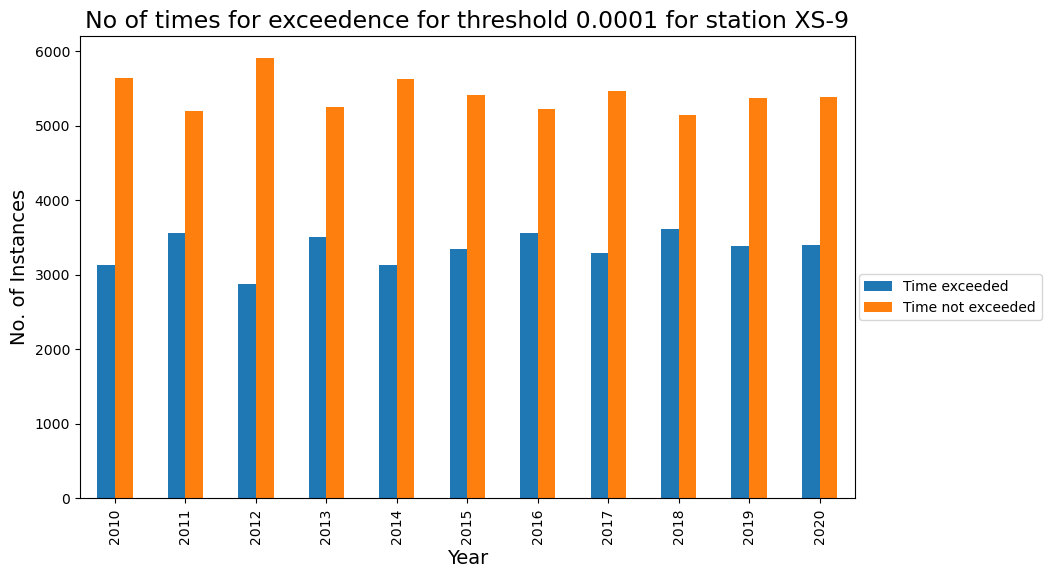

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
110  2010          3496              5264
111  2011          3873              4887
112  2012          3251              5533
113  2013          3895              4865
114  2014          3519              5241
115  2015          3818              4942
116  2016          3903              4881
117  2017          3661              5099
118  2018          4098              4662
119  2019          3904              4856
120  2020          3427              5357

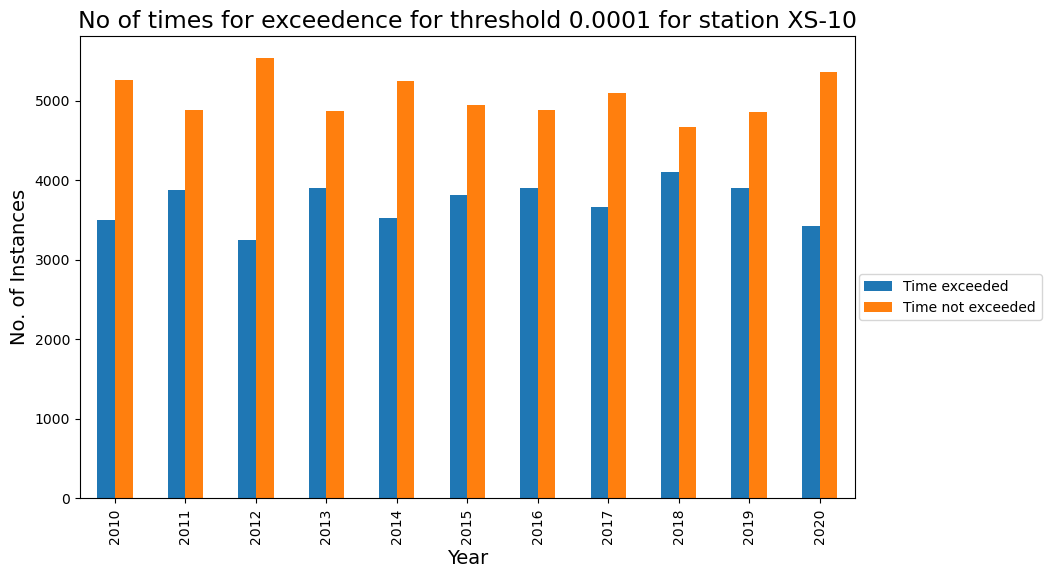

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
121  2010          3869              4891
122  2011          4146              4614
123  2012          3586              5198
124  2013          4162              4598
125  2014          3898              4862
126  2015          4205              4555
127  2016          4249              4535
128  2017          3986              4774
129  2018          4430              4330
130  2019          4244              4516
131  2020          4138              4646

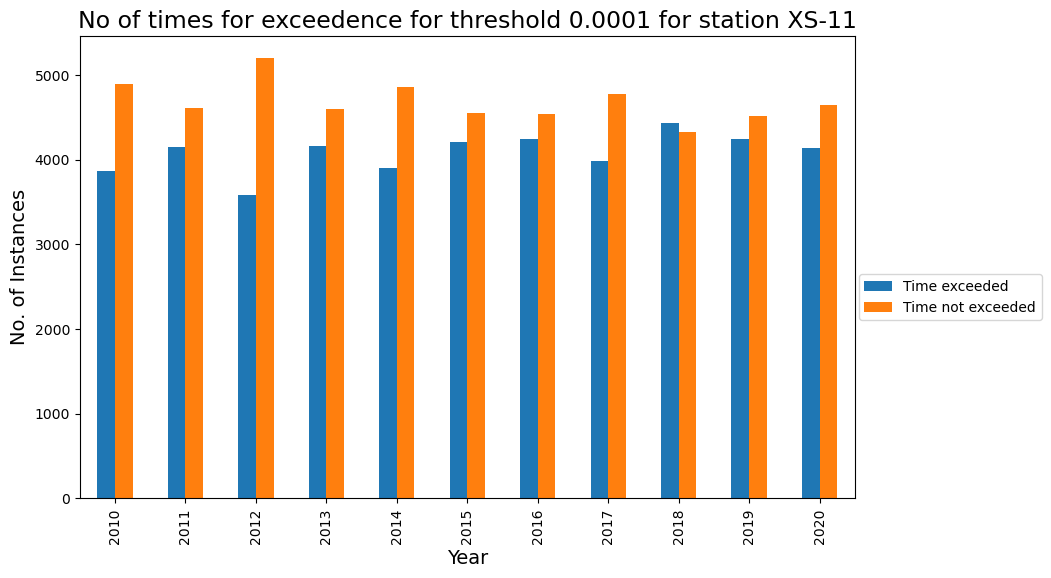

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
132  2010          2732              6028
133  2011          3141              5619
134  2012          2409              6375
135  2013          2980              5780
136  2014          2756              6004
137  2015          2917              5843
138  2016          3208              5576
139  2017          2948              5812
140  2018          3226              5534
141  2019          2963              5797
142  2020          3315              5469

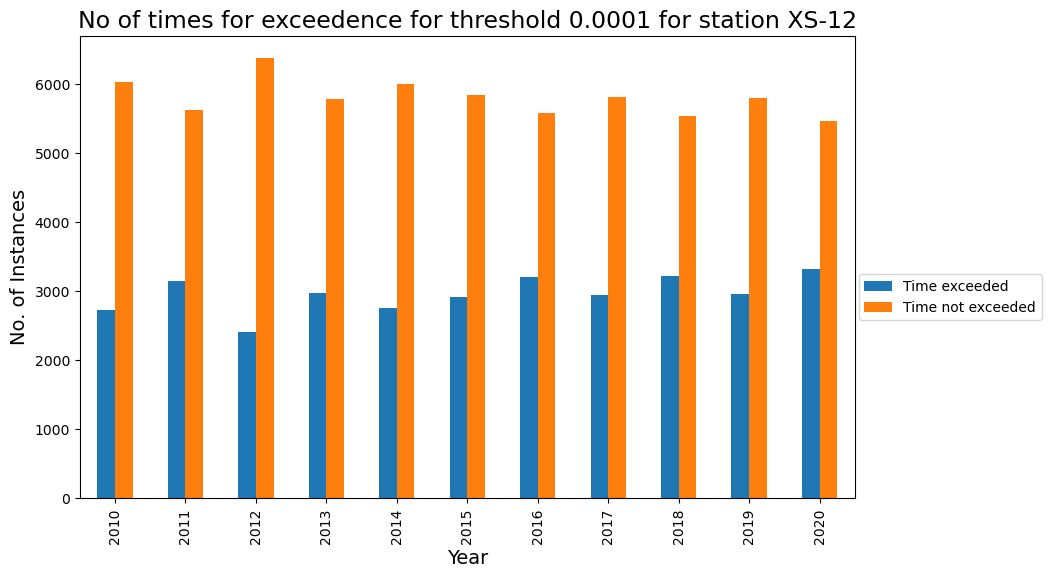

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
143  2010          2939              5821
144  2011          3348              5412
145  2012          2605              6179
146  2013          3274              5486
147  2014          2951              5809
148  2015          3240              5520
149  2016          3370              5414
150  2017          3152              5608
151  2018          3451              5309
152  2019          3228              5532
153  2020          3254              5530

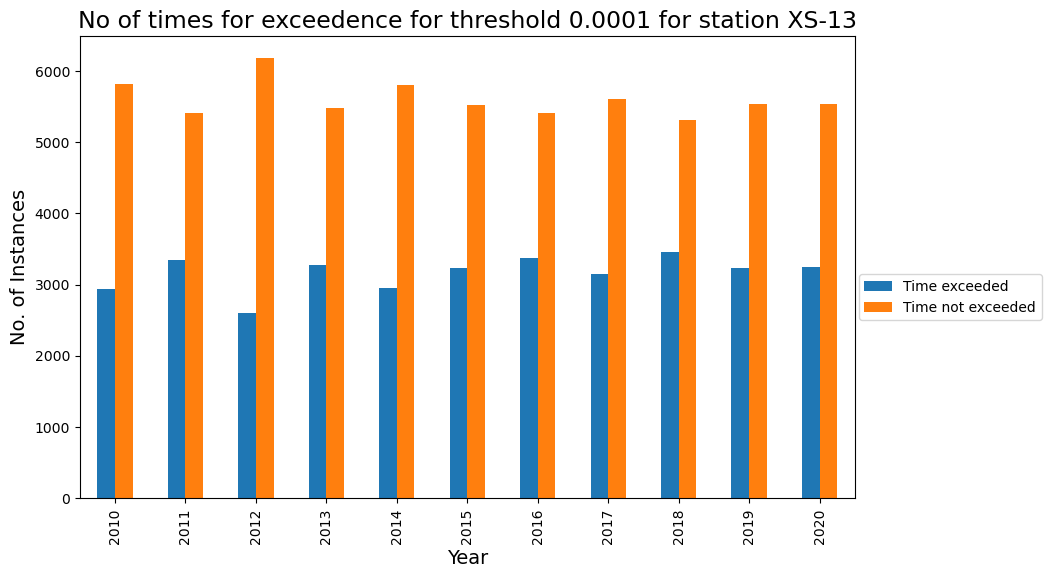

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
154  2010          3392              5368
155  2011          3726              5034
156  2012          3043              5741
157  2013          3748              5012
158  2014          3417              5343
159  2015          3793              4967
160  2016          3814              4970
161  2017          3567              5193
162  2018          3990              4770
163  2019          3720              5040
164  2020          3768              5016

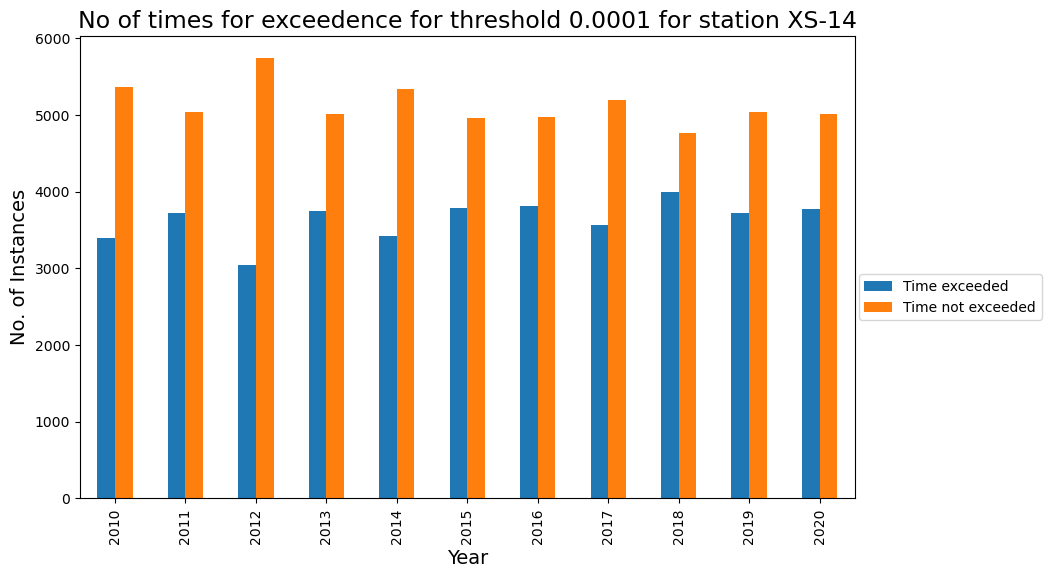

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
165  2010          3668              5092
166  2011          3906              4854
167  2012          3312              5472
168  2013          3921              4839
169  2014          3732              5028
170  2015          4105              4655
171  2016          4068              4716
172  2017          3811              4949
173  2018          4212              4548
174  2019          3983              4777
175  2020          4126              4658

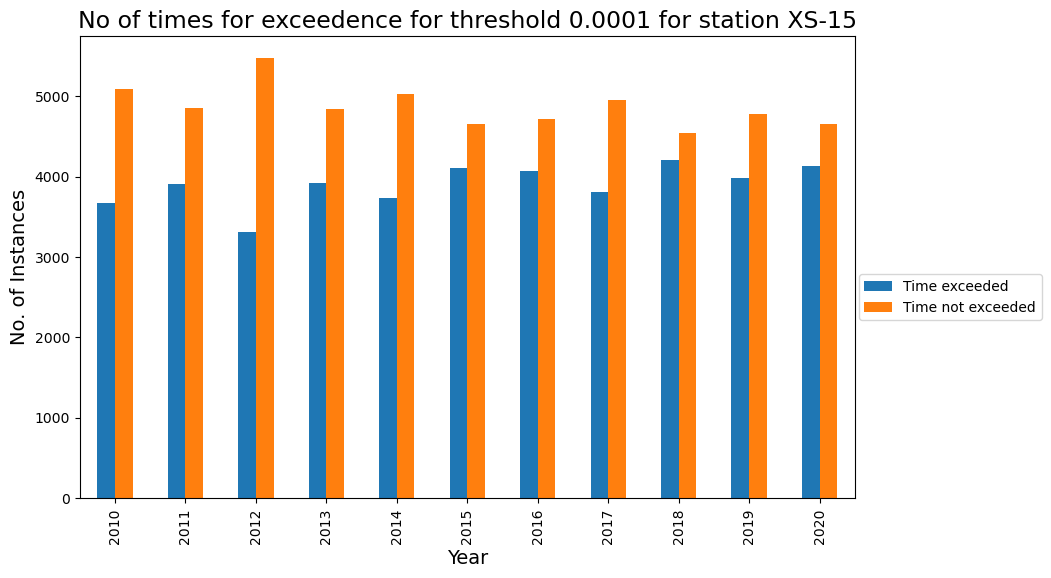

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
176  2010          4705              4055
177  2011          5282              3478
178  2012          4718              4066
179  2013          4978              3782
180  2014          4666              4094
181  2015          4851              3909
182  2016          5225              3559
183  2017          5113              3647
184  2018          5313              3447
185  2019          5029              3731
186  2020          5184              3600

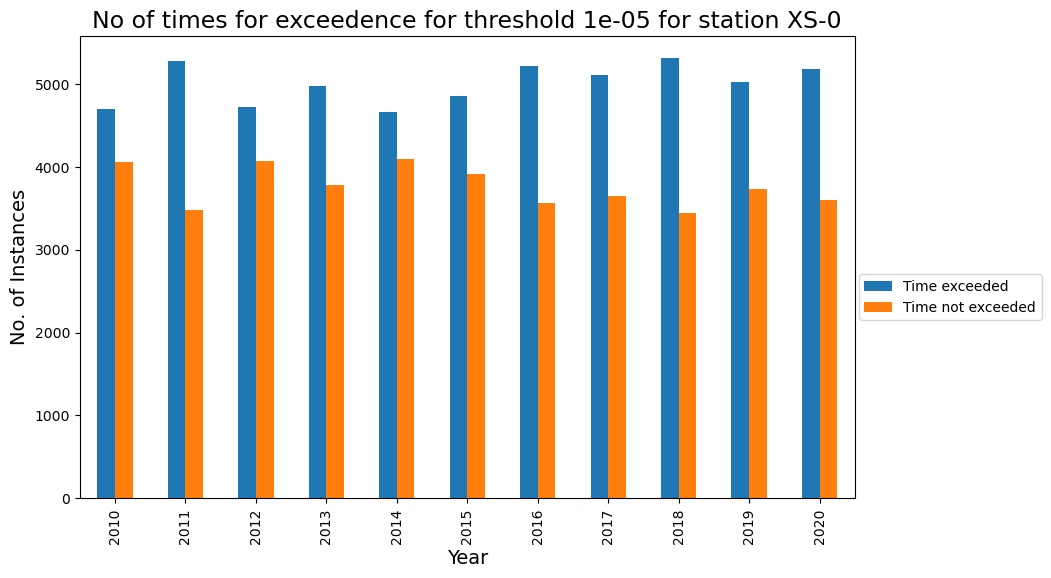

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
187  2010          4742              4018
188  2011          5260              3500
189  2012          4785              3999
190  2013          5042              3718
191  2014          4659              4101
192  2015          4923              3837
193  2016          5246              3538
194  2017          5028              3732
195  2018          5318              3442
196  2019          5112              3648
197  2020          5138              3646

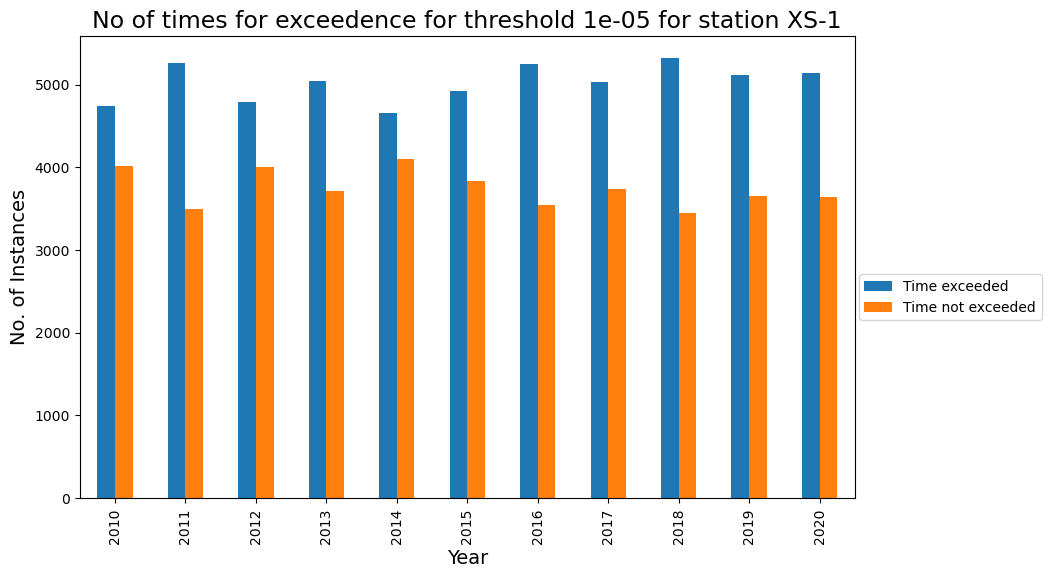

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
198  2010          4590              4170
199  2011          4994              3766
200  2012          4675              4109
201  2013          4944              3816
202  2014          4509              4251
203  2015          4777              3983
204  2016          5052              3732
205  2017          4855              3905
206  2018          5165              3595
207  2019          5023              3737
208  2020          4920              3864

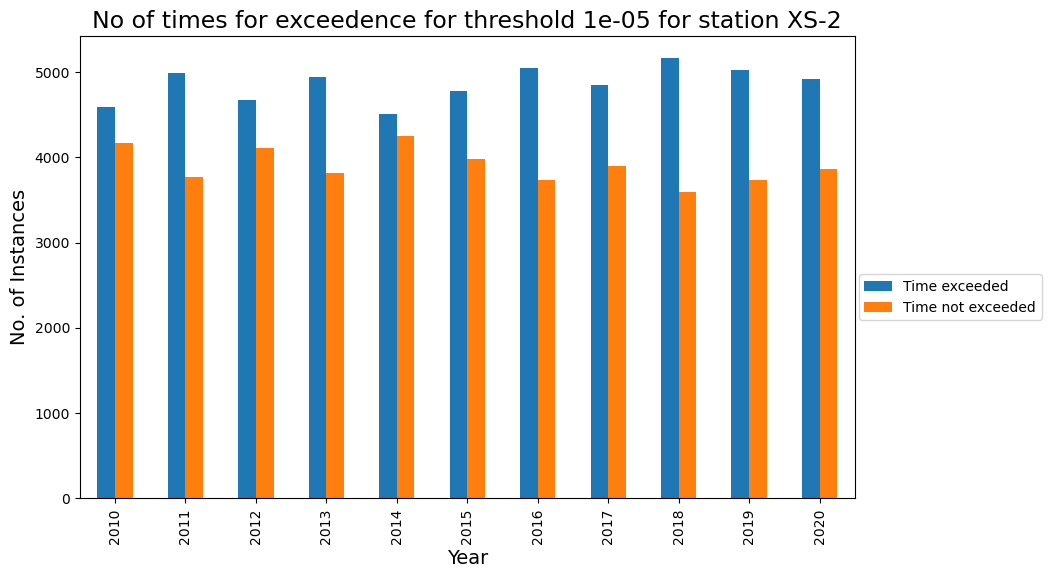

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
209  2010          4981              3779
210  2011          5322              3438
211  2012          5024              3760
212  2013          5320              3440
213  2014          4931              3829
214  2015          5270              3490
215  2016          5412              3372
216  2017          5237              3523
217  2018          5574              3186
218  2019          5425              3335
219  2020          5220              3564

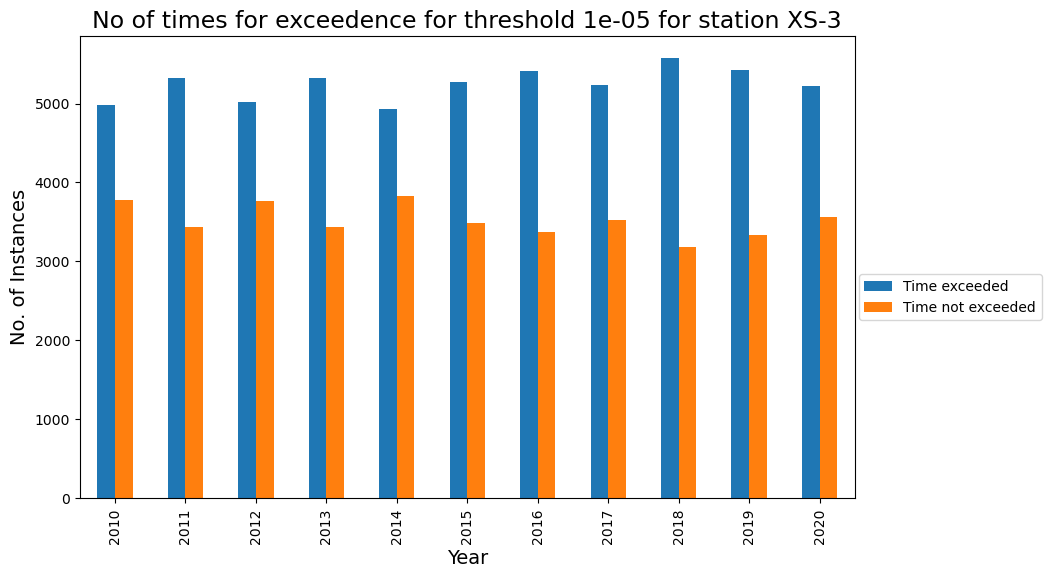

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
220  2010          4655              4105
221  2011          5311              3449
222  2012          4513              4271
223  2013          5016              3744
224  2014          4704              4056
225  2015          5022              3738
226  2016          5393              3391
227  2017          5118              3642
228  2018          5366              3394
229  2019          5018              3742
230  2020          5180              3604

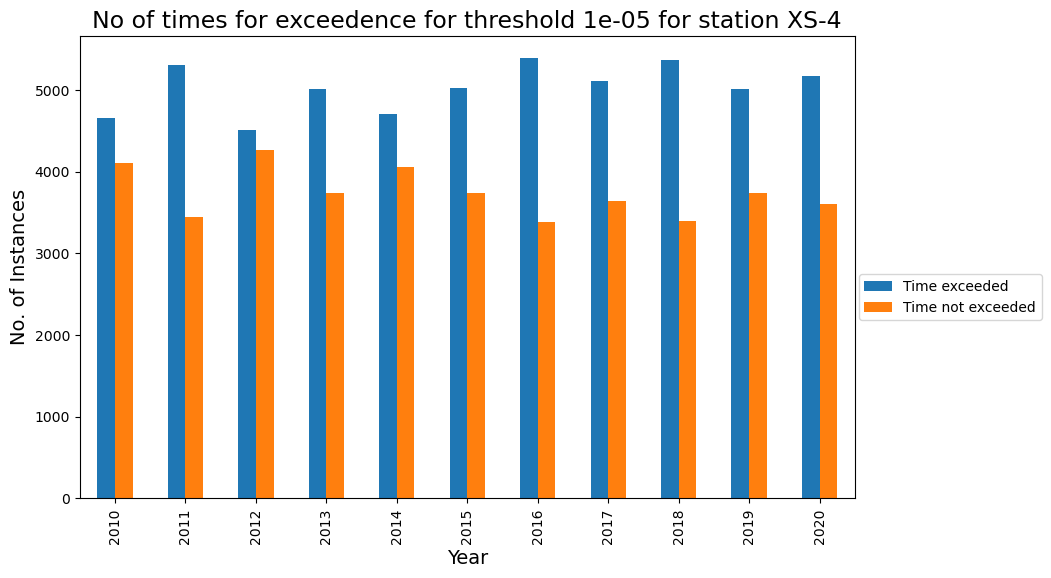

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
231  2010          4767              3993
232  2011          5372              3388
233  2012          4651              4133
234  2013          5158              3602
235  2014          4790              3970
236  2015          5192              3568
237  2016          5472              3312
238  2017          5121              3639
239  2018          5470              3290
240  2019          5257              3503
241  2020          5188              3596

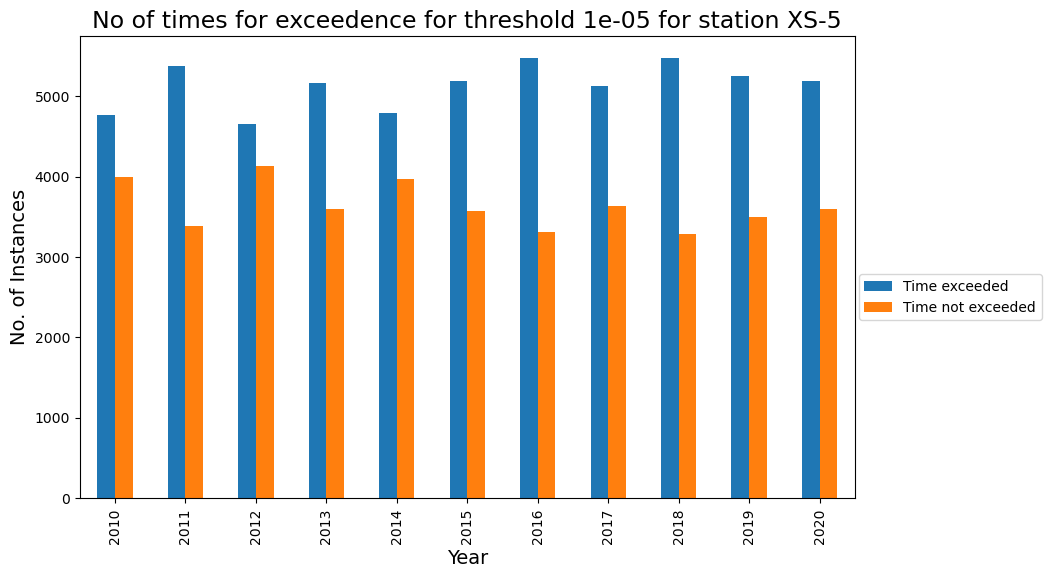

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
242  2010          5296              3464
243  2011          5671              3089
244  2012          5194              3590
245  2013          5563              3197
246  2014          5284              3476
247  2015          5709              3051
248  2016          5781              3003
249  2017          5455              3305
250  2018          5894              2866
251  2019          5728              3032
252  2020          4975              3809

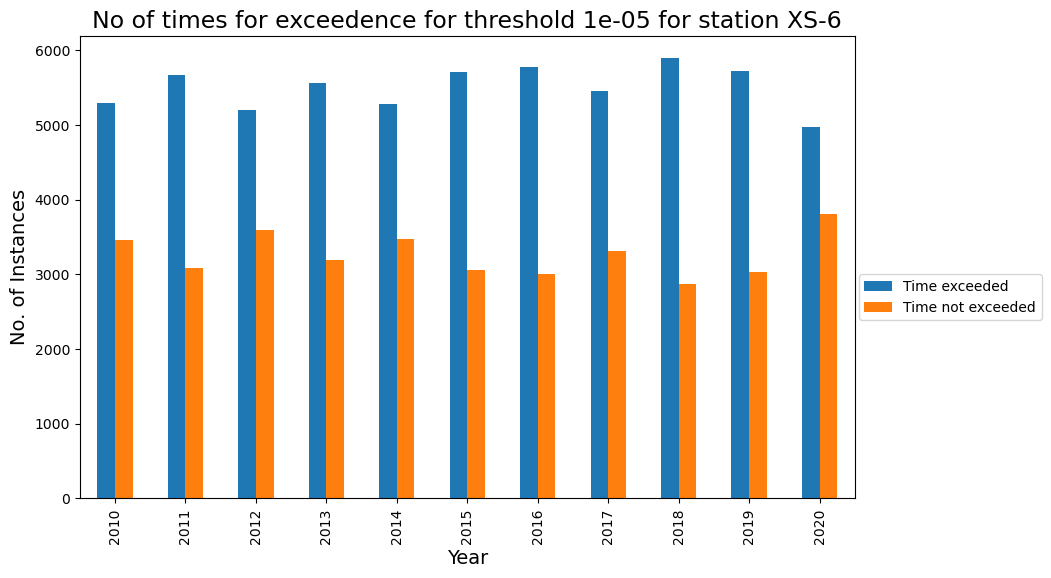

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
253  2010          5357              3403
254  2011          5706              3054
255  2012          5291              3493
256  2013          5638              3122
257  2014          5360              3400
258  2015          5793              2967
259  2016          5803              2981
260  2017          5525              3235
261  2018          5956              2804
262  2019          5823              2937
263  2020          5438              3346

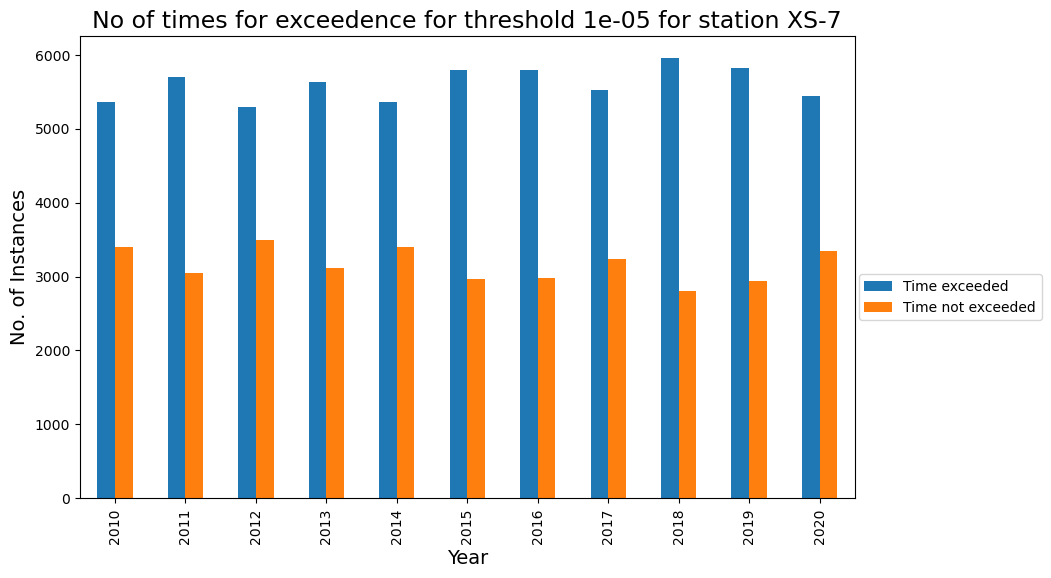

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
264  2010          4642              4118
265  2011          5338              3422
266  2012          4512              4272
267  2013          5068              3692
268  2014          4764              3996
269  2015          5172              3588
270  2016          5510              3274
271  2017          5122              3638
272  2018          5509              3251
273  2019          5089              3671
274  2020          5310              3474

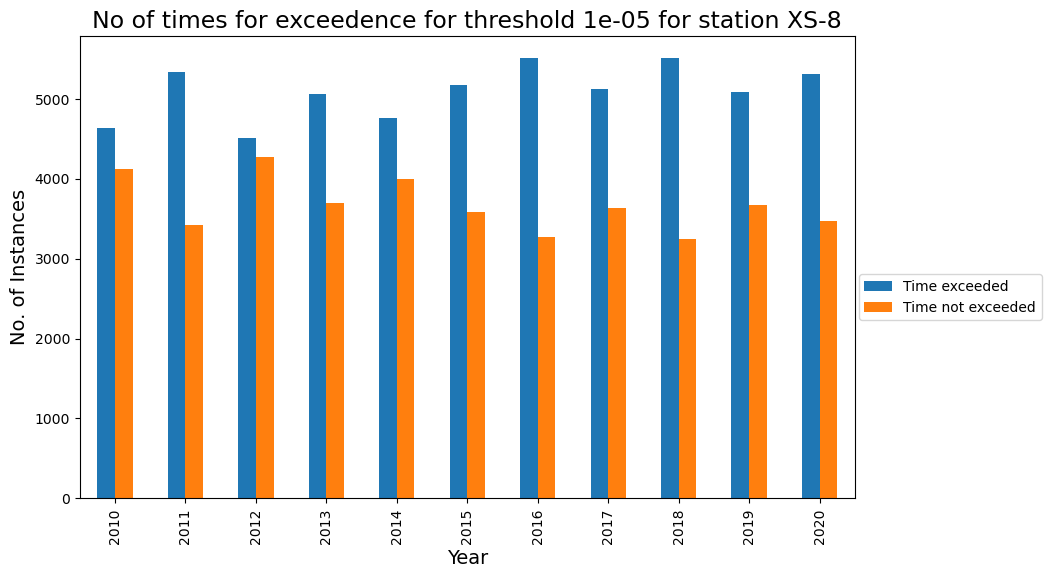

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
275  2010          5121              3639
276  2011          5617              3143
277  2012          4991              3793
278  2013          5404              3356
279  2014          5169              3591
280  2015          5671              3089
281  2016          5837              2947
282  2017          5375              3385
283  2018          5848              2912
284  2019          5571              3189
285  2020          5467              3317

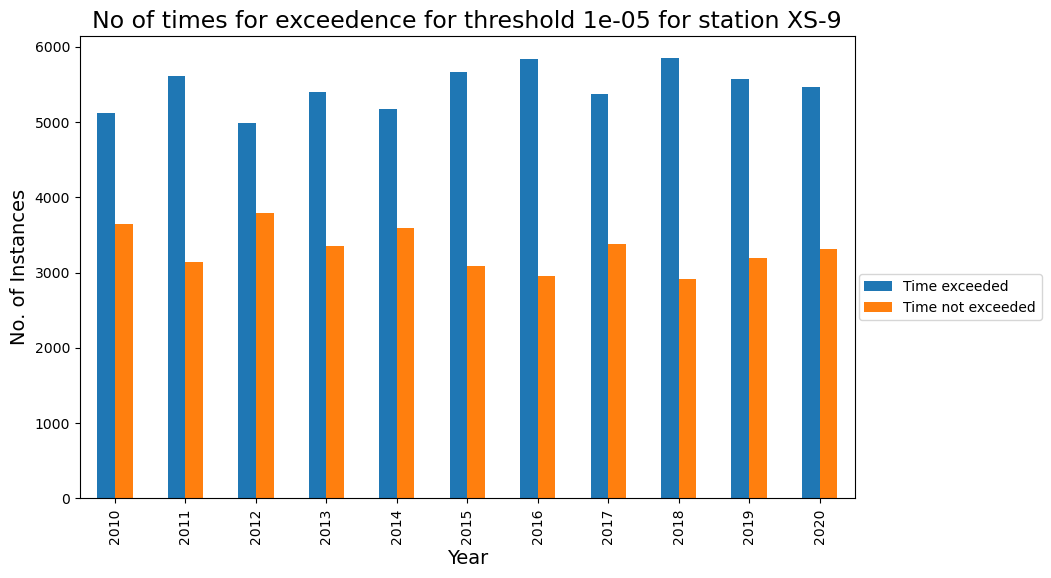

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
286  2010          5322              3438
287  2011          5720              3040
288  2012          5221              3563
289  2013          5632              3128
290  2014          5363              3397
291  2015          5839              2921
292  2016          5850              2934
293  2017          5480              3280
294  2018          5988              2772
295  2019          5805              2955
296  2020          5447              3337

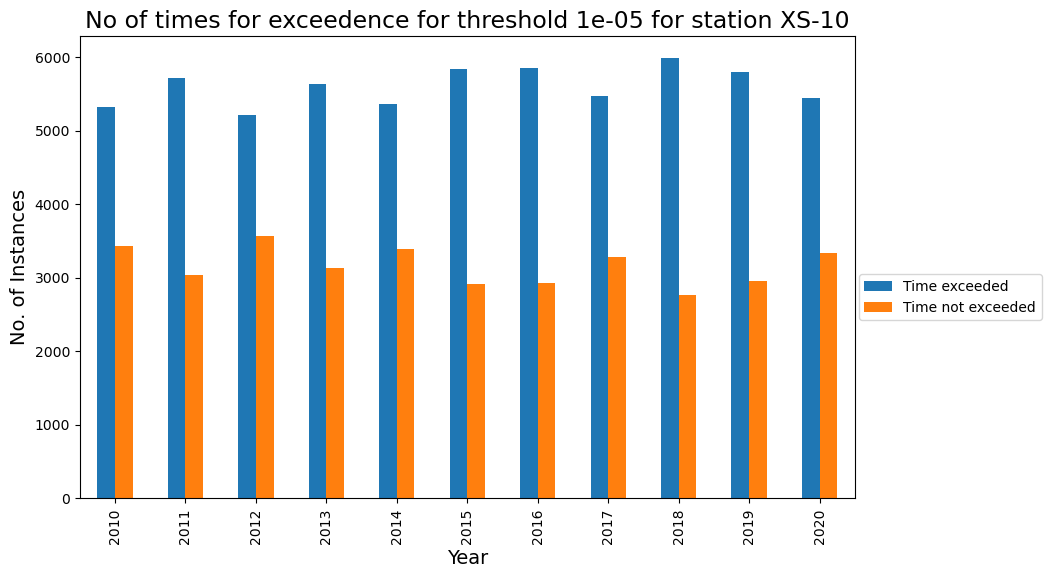

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
297  2010          5476              3284
298  2011          5872              2888
299  2012          5401              3383
300  2013          5804              2956
301  2014          5534              3226
302  2015          5999              2761
303  2016          5961              2823
304  2017          5601              3159
305  2018          6122              2638
306  2019          5986              2774
307  2020          5852              2932

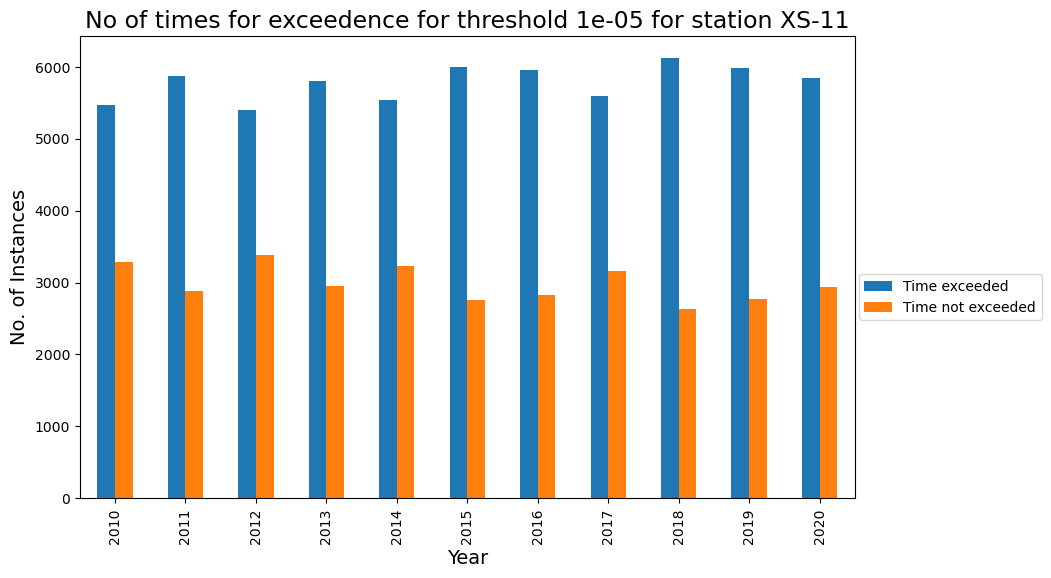

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
308  2010          4587              4173
309  2011          5256              3504
310  2012          4417              4367
311  2013          4981              3779
312  2014          4723              4037
313  2015          5291              3469
314  2016          5396              3388
315  2017          5036              3724
316  2018          5451              3309
317  2019          5135              3625
318  2020          5293              3491

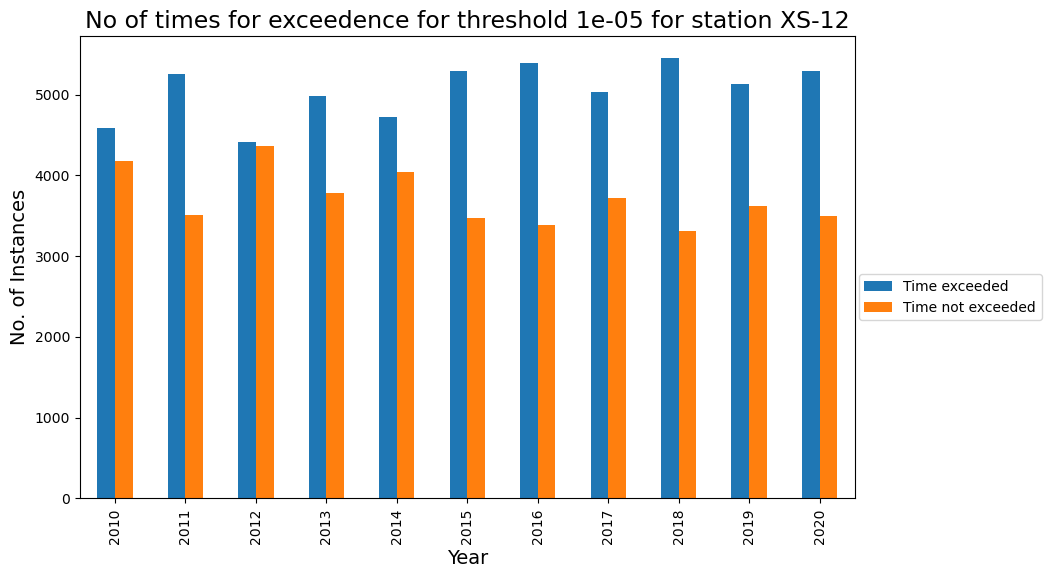

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
319  2010          4978              3782
320  2011          5391              3369
321  2012          4809              3975
322  2013          5224              3536
323  2014          5050              3710
324  2015          5585              3175
325  2016          5582              3202
326  2017          5164              3596
327  2018          5704              3056
328  2019          5470              3290
329  2020          5303              3481

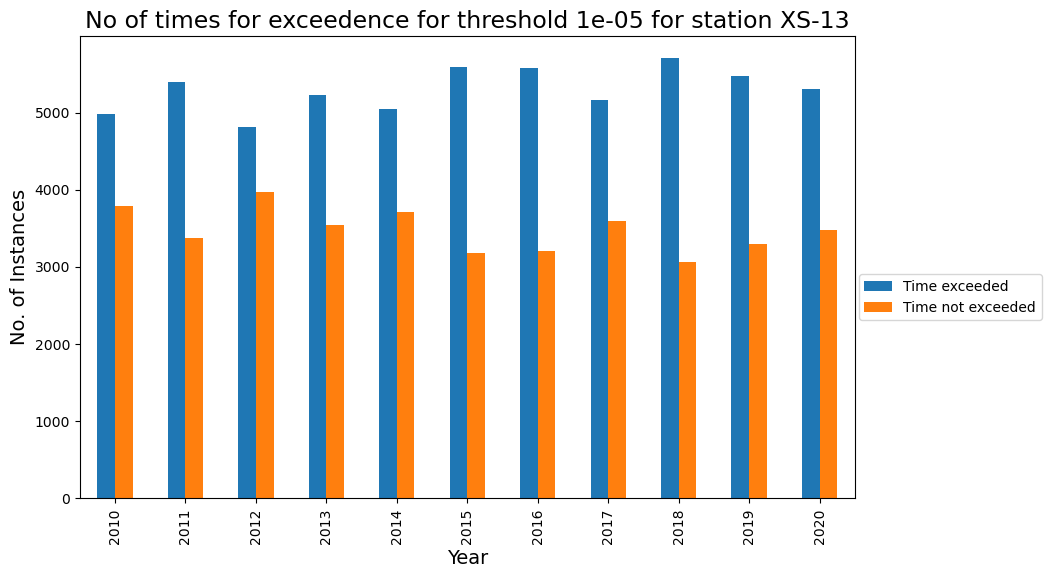

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
330  2010          5171              3589
331  2011          5530              3230
332  2012          5026              3758
333  2013          5460              3300
334  2014          5234              3526
335  2015          5765              2995
336  2016          5733              3051
337  2017          5303              3457
338  2018          5822              2938
339  2019          5675              3085
340  2020          5631              3153

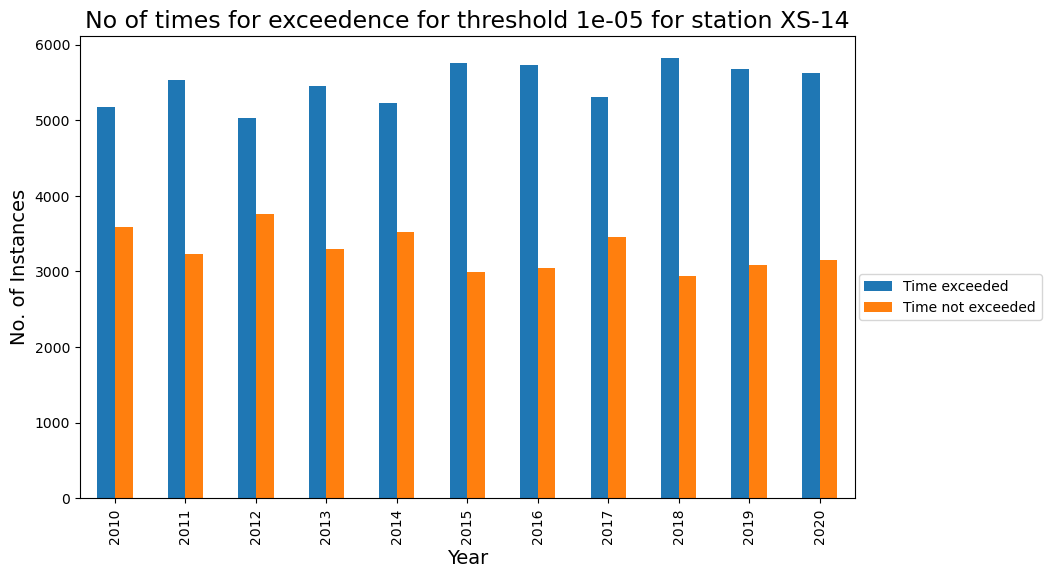

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
341  2010          5295              3465
342  2011          5672              3088
343  2012          5144              3640
344  2013          5603              3157
345  2014          5359              3401
346  2015          5915              2845
347  2016          5805              2979
348  2017          5413              3347
349  2018          5923              2837
350  2019          5839              2921
351  2020          5740              3044

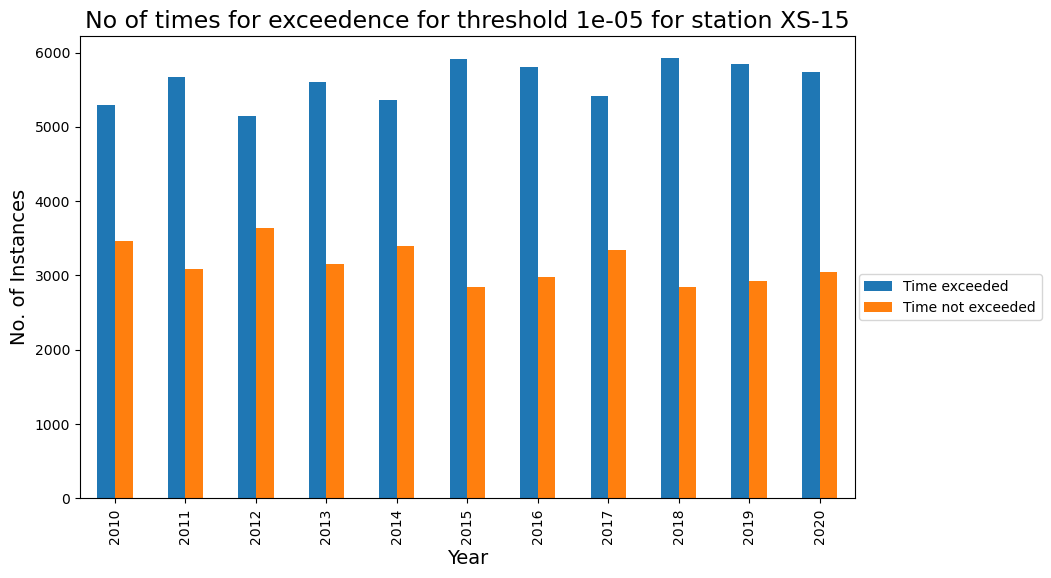

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
352  2010          5952              2808
353  2011          6659              2101
354  2012          6093              2691
355  2013          6162              2598
356  2014          6006              2754
357  2015          6378              2382
358  2016          6461              2323
359  2017          6557              2203
360  2018          6709              2051
361  2019          6451              2309
362  2020          6508              2276

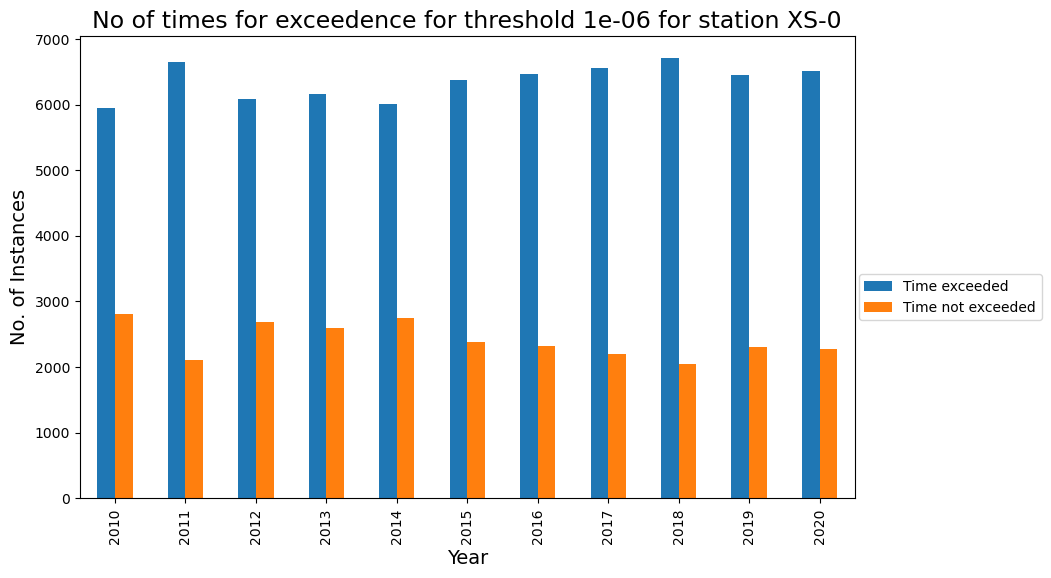

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
363  2010          6272              2488
364  2011          6784              1976
365  2012          6380              2404
366  2013          6405              2355
367  2014          6290              2470
368  2015          6706              2054
369  2016          6729              2055
370  2017          6686              2074
371  2018          6883              1877
372  2019          6748              2012
373  2020          6551              2233

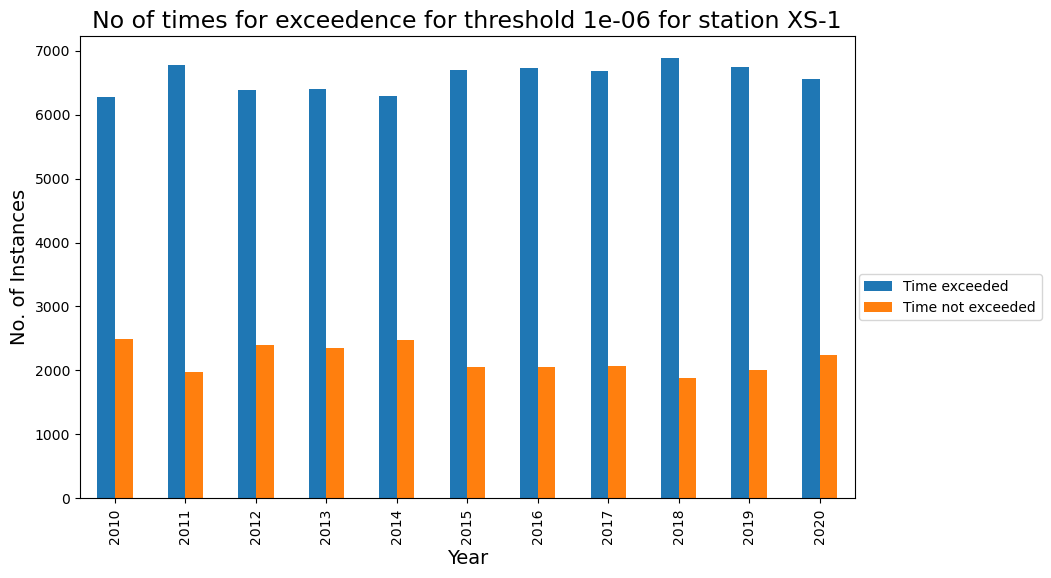

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
374  2010          6198              2562
375  2011          6646              2114
376  2012          6302              2482
377  2013          6341              2419
378  2014          6227              2533
379  2015          6610              2150
380  2016          6638              2146
381  2017          6555              2205
382  2018          6783              1977
383  2019          6679              2081
384  2020          6402              2382

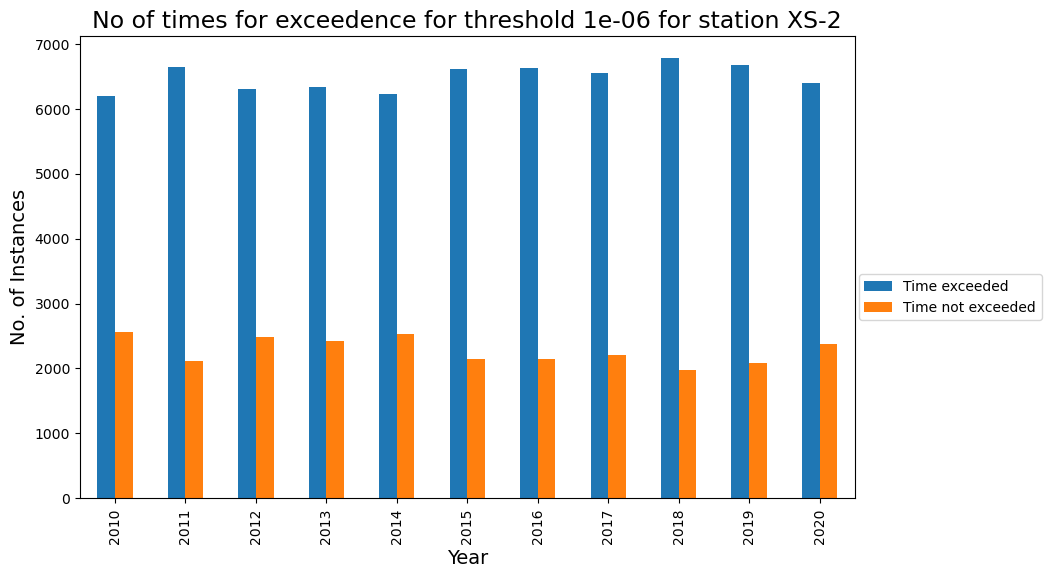

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
385  2010          6357              2403
386  2011          6781              1979
387  2012          6515              2269
388  2013          6535              2225
389  2014          6452              2308
390  2015          6816              1944
391  2016          6726              2058
392  2017          6675              2085
393  2018          6944              1816
394  2019          6894              1866
395  2020          6905              1879

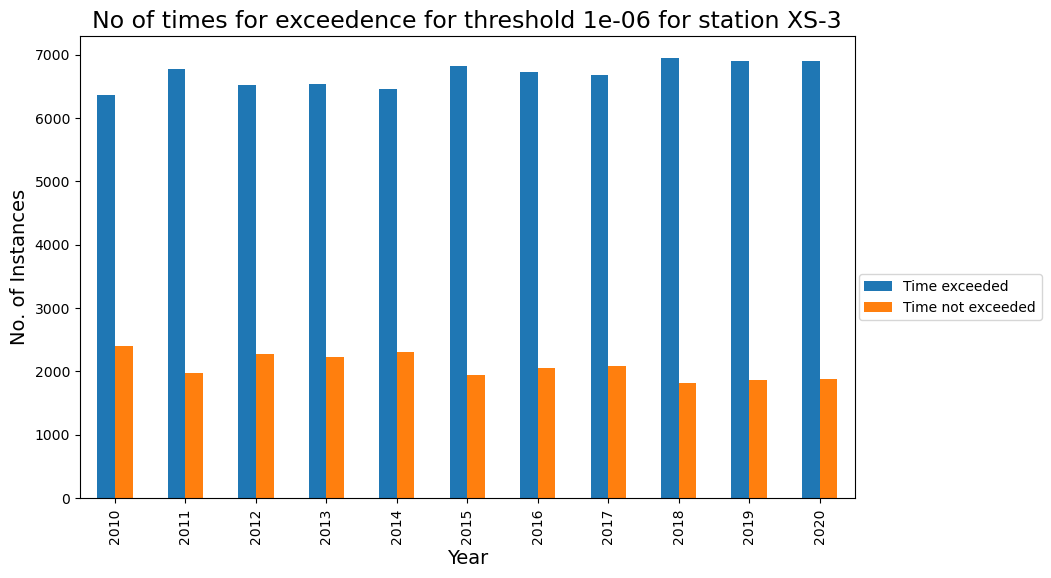

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
396  2010          5788              2972
397  2011          6487              2273
398  2012          5740              3044
399  2013          6026              2734
400  2014          5795              2965
401  2015          6416              2344
402  2016          6531              2253
403  2017          6191              2569
404  2018          6692              2068
405  2019          6277              2483
406  2020          6029              2755

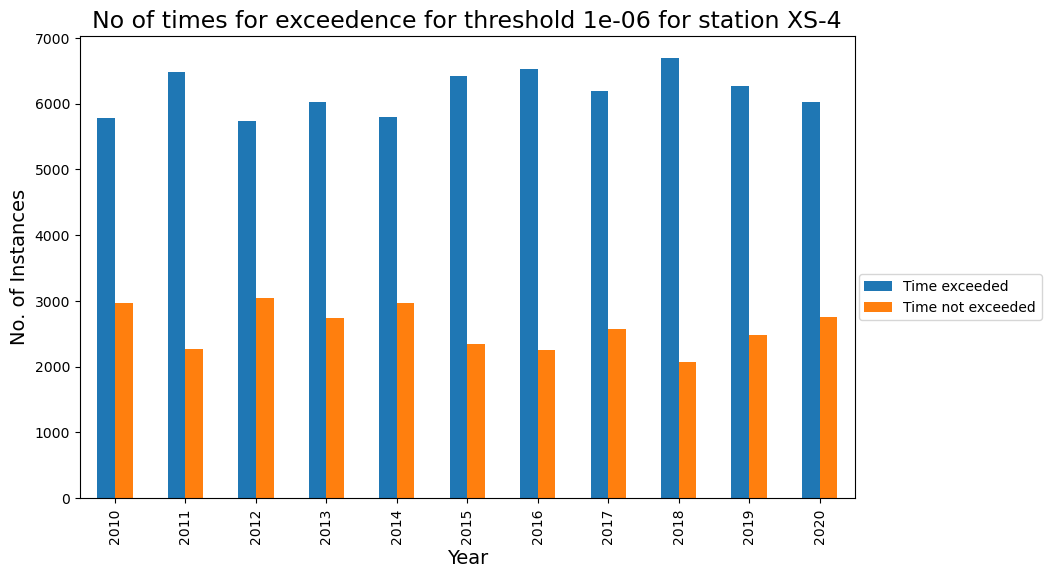

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
407  2010          6100              2660
408  2011          6630              2130
409  2012          6046              2738
410  2013          6225              2535
411  2014          6090              2670
412  2015          6653              2107
413  2016          6722              2062
414  2017          6333              2427
415  2018          6879              1881
416  2019          6562              2198
417  2020          6123              2661

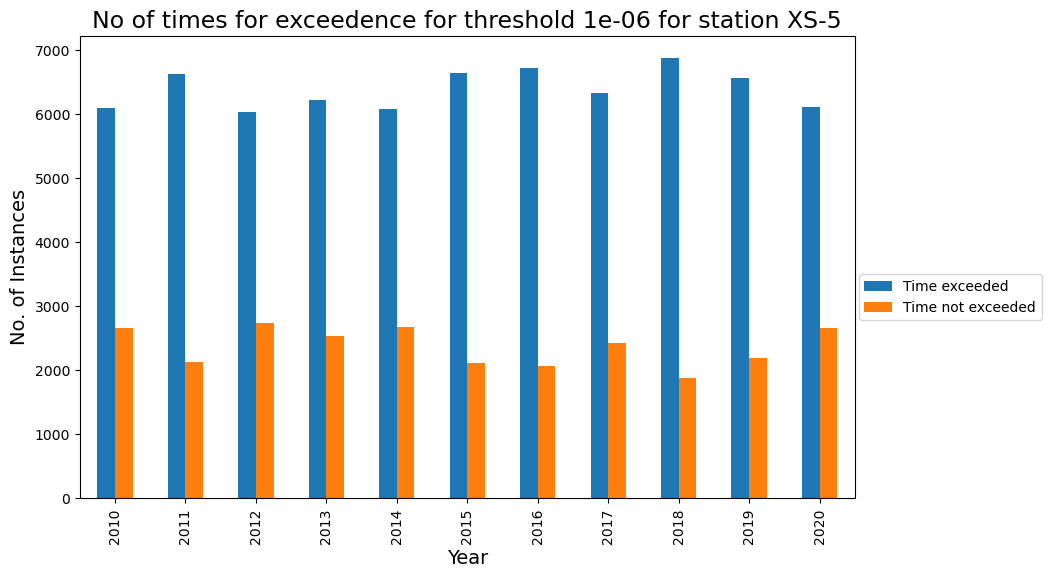

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
418  2010          6198              2562
419  2011          6622              2138
420  2012          6200              2584
421  2013          6383              2377
422  2014          6187              2573
423  2015          6745              2015
424  2016          6726              2058
425  2017          6326              2434
426  2018          6880              1880
427  2019          6731              2029
428  2020          6098              2686

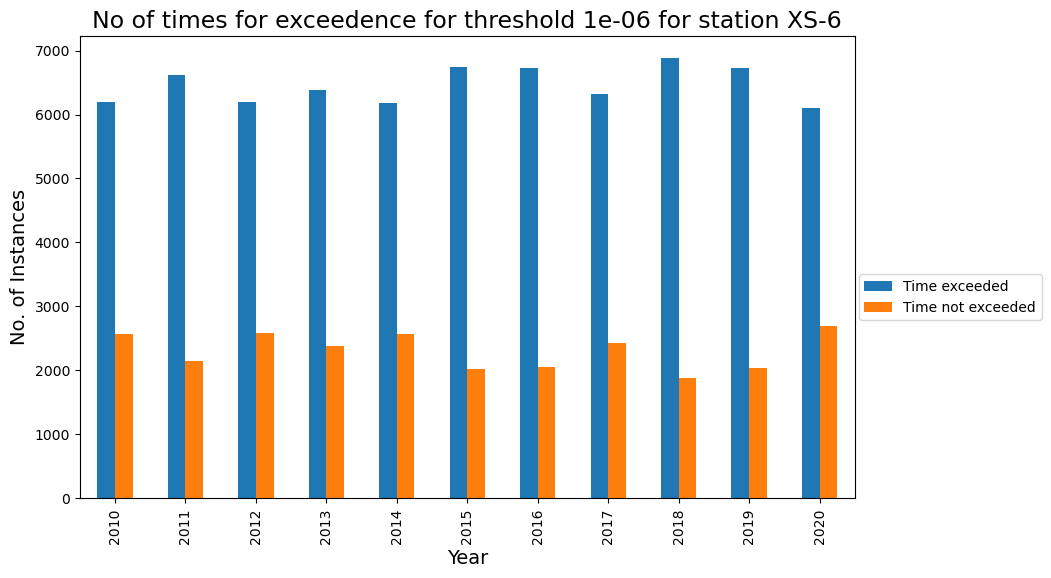

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
429  2010          6284              2476
430  2011          6705              2055
431  2012          6301              2483
432  2013          6462              2298
433  2014          6309              2451
434  2015          6838              1922
435  2016          6790              1994
436  2017          6421              2339
437  2018          6955              1805
438  2019          6818              1942
439  2020          6617              2167

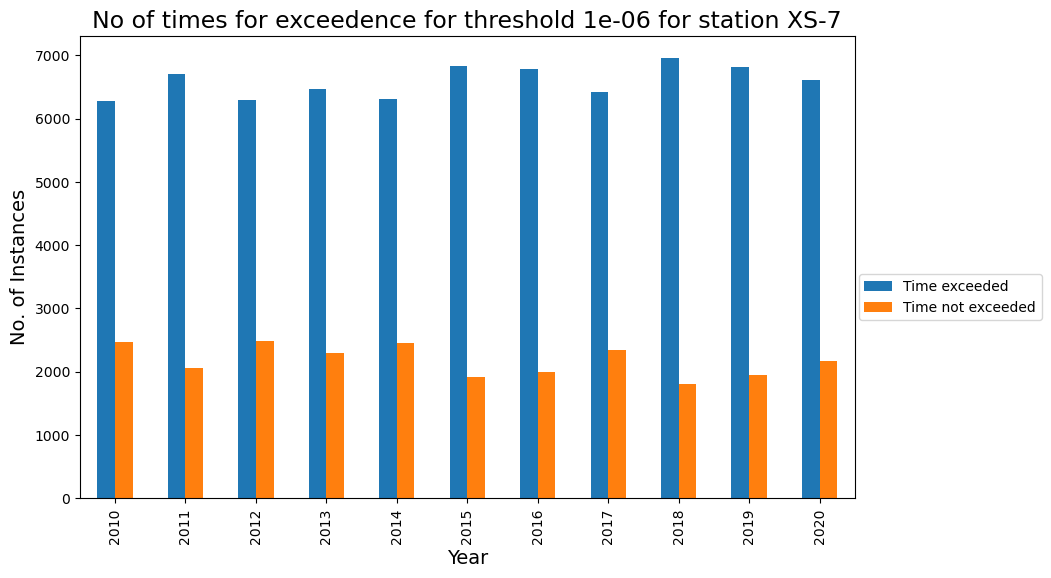

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
440  2010          5918              2842
441  2011          6545              2215
442  2012          5823              2961
443  2013          6107              2653
444  2014          5944              2816
445  2015          6550              2210
446  2016          6645              2139
447  2017          6207              2553
448  2018          6783              1977
449  2019          6391              2369
450  2020          6280              2504

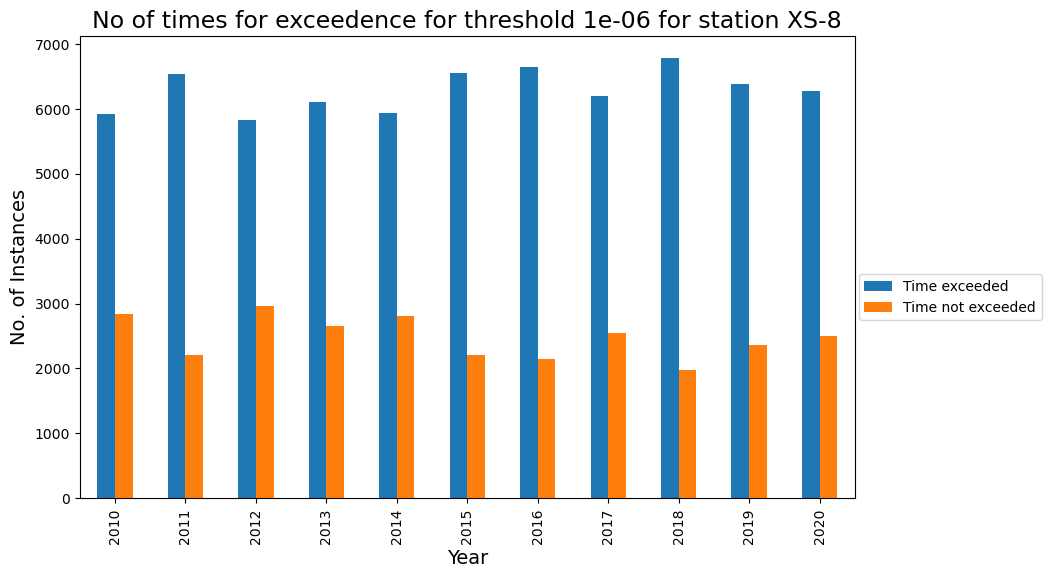

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
451  2010          6224              2536
452  2011          6722              2038
453  2012          6145              2639
454  2013          6326              2434
455  2014          6212              2548
456  2015          6791              1969
457  2016          6789              1995
458  2017          6375              2385
459  2018          6986              1774
460  2019          6705              2055
461  2020          6569              2215

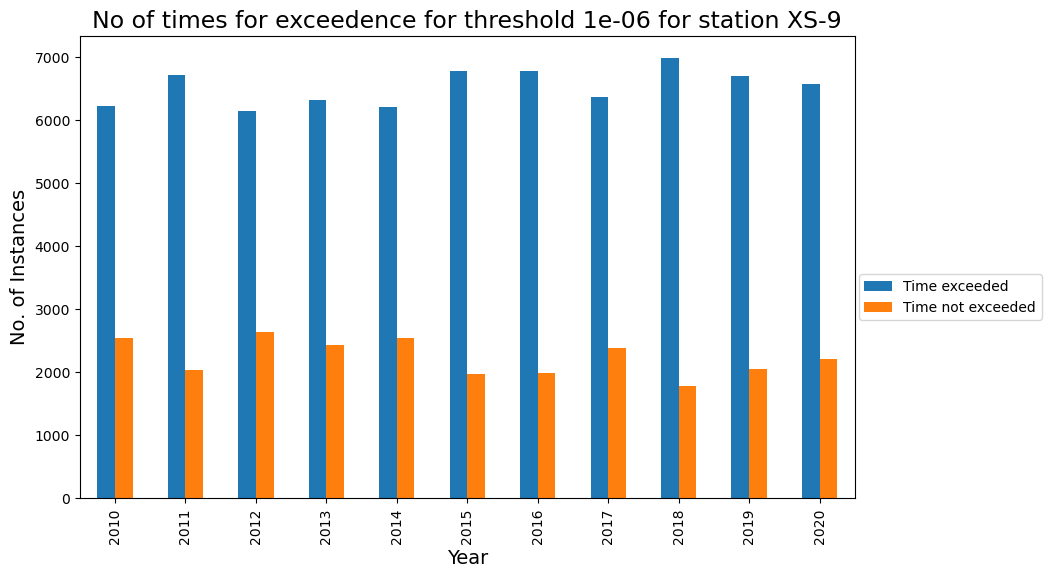

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
462  2010          6195              2565
463  2011          6631              2129
464  2012          6169              2615
465  2013          6395              2365
466  2014          6204              2556
467  2015          6774              1986
468  2016          6722              2062
469  2017          6301              2459
470  2018          6899              1861
471  2019          6735              2025
472  2020          6526              2258

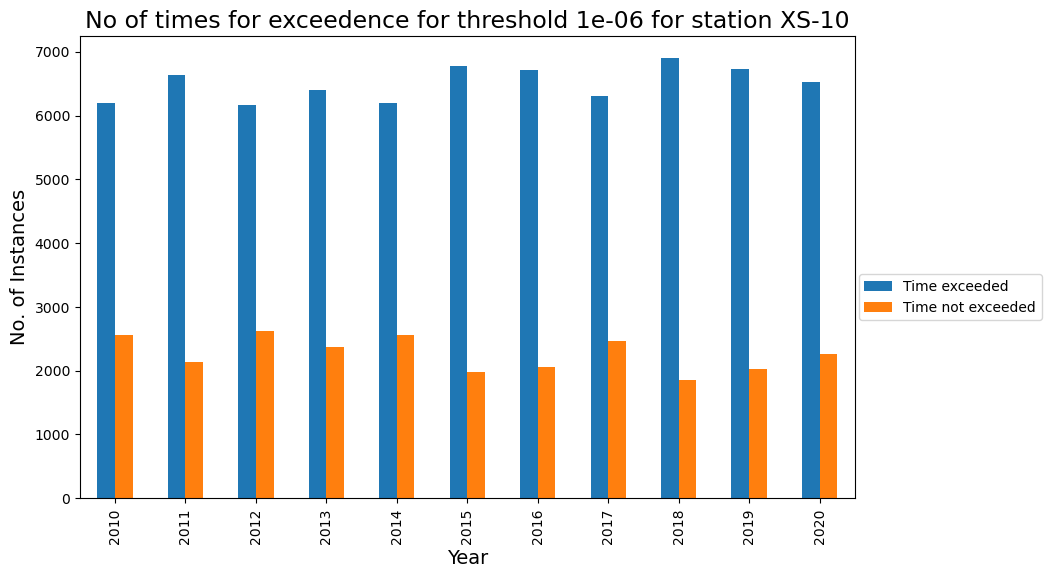

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
473  2010          6477              2283
474  2011          6859              1901
475  2012          6514              2270
476  2013          6671              2089
477  2014          6498              2262
478  2015          7051              1709
479  2016          6891              1893
480  2017          6555              2205
481  2018          7100              1660
482  2019          7023              1737
483  2020          6816              1968

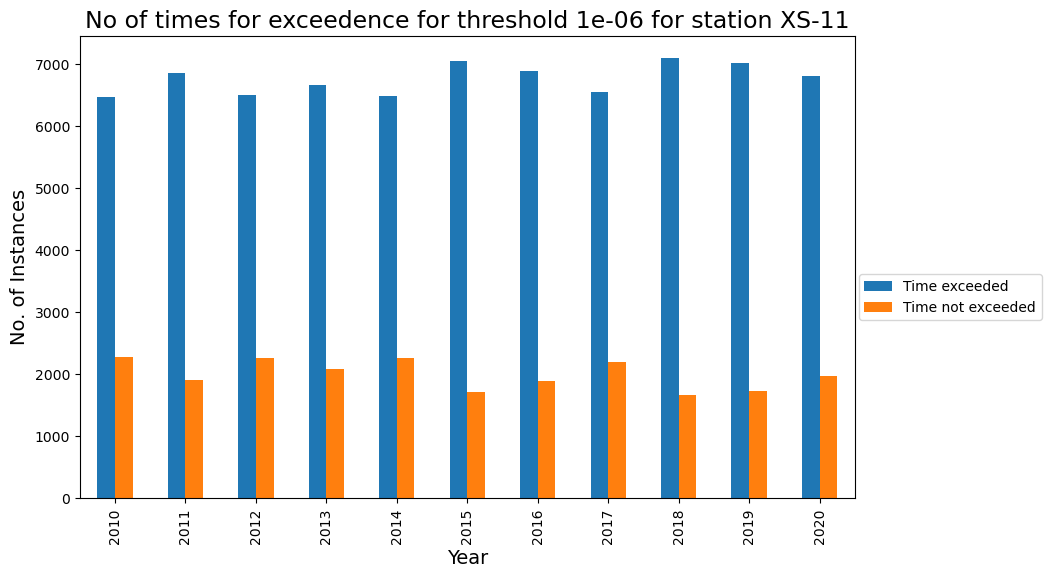

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
484  2010          5976              2784
485  2011          6557              2203
486  2012          5828              2956
487  2013          6124              2636
488  2014          6054              2706
489  2015          6595              2165
490  2016          6645              2139
491  2017          6227              2533
492  2018          6765              1995
493  2019          6471              2289
494  2020          6403              2381

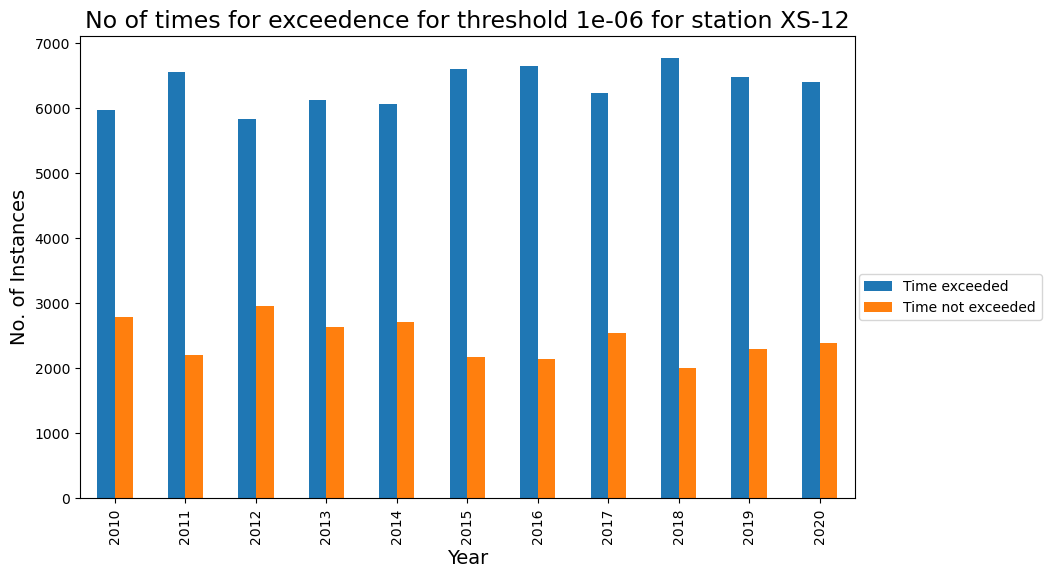

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
495  2010          6115              2645
496  2011          6558              2202
497  2012          6022              2762
498  2013          6274              2486
499  2014          6198              2562
500  2015          6711              2049
501  2016          6662              2122
502  2017          6250              2510
503  2018          6862              1898
504  2019          6693              2067
505  2020          6529              2255

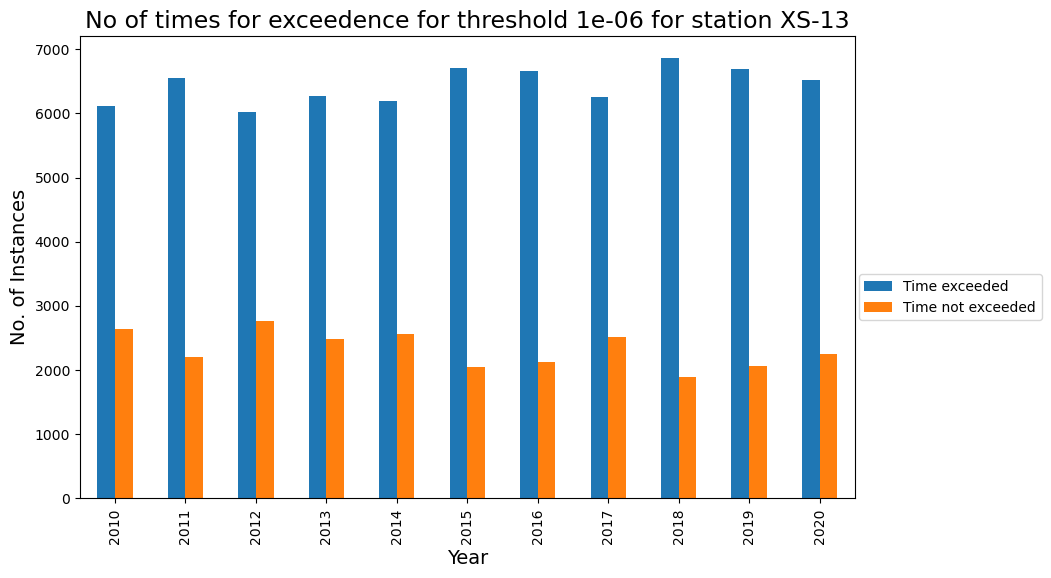

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
506  2010          6136              2624
507  2011          6581              2179
508  2012          6021              2763
509  2013          6332              2428
510  2014          6256              2504
511  2015          6727              2033
512  2016          6675              2109
513  2017          6262              2498
514  2018          6858              1902
515  2019          6671              2089
516  2020          6559              2225

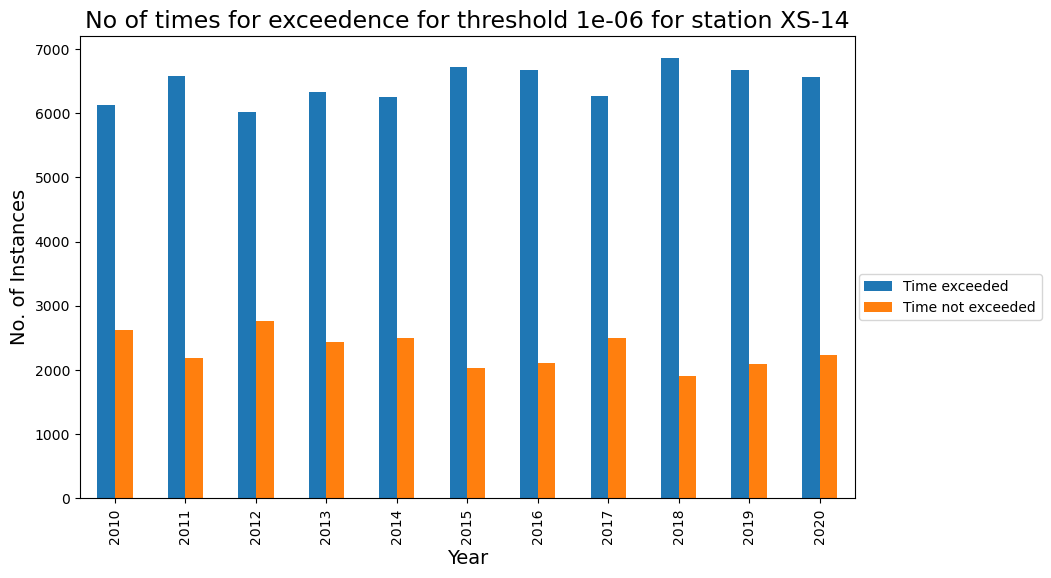

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
517  2010          6379              2381
518  2011          6805              1955
519  2012          6365              2419
520  2013          6601              2159
521  2014          6516              2244
522  2015          7000              1760
523  2016          6843              1941
524  2017          6496              2264
525  2018          7077              1683
526  2019          6946              1814
527  2020          6672              2112

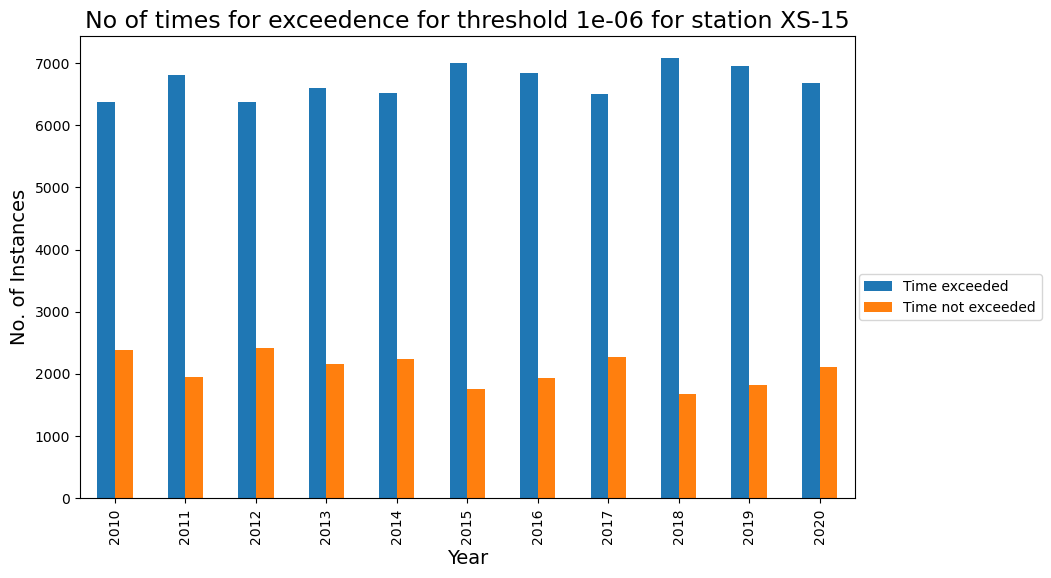

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
528  2010          6645              2115
529  2011          7204              1556
530  2012          6954              1830
531  2013          6664              2096
532  2014          6600              2160
533  2015          7053              1707
534  2016          7051              1733
535  2017          7193              1567
536  2018          7321              1439
537  2019          7063              1697
538  2020          7106              1678

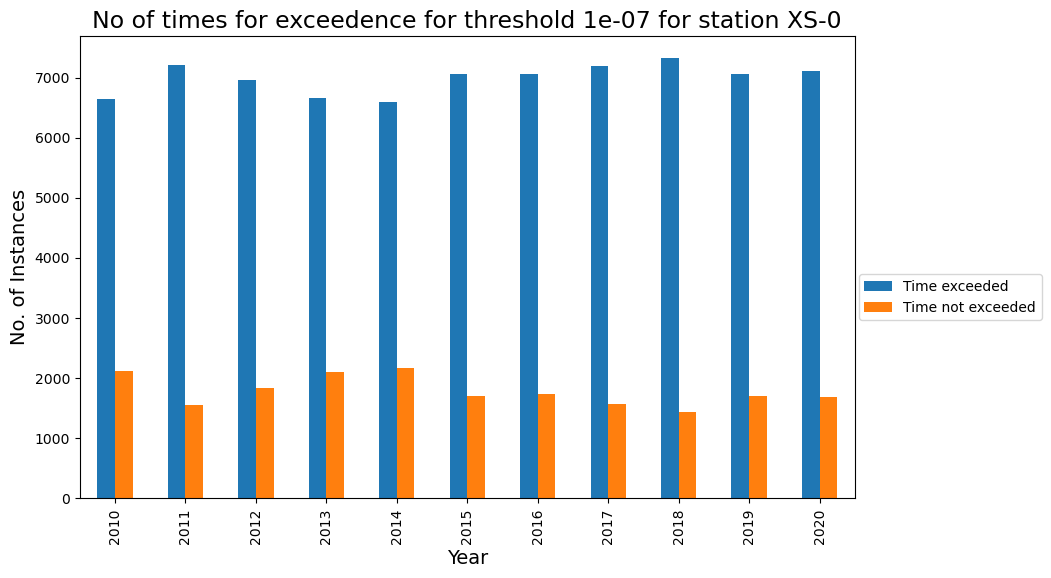

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
539  2010          6949              1811
540  2011          7334              1426
541  2012          7209              1575
542  2013          6901              1859
543  2014          6909              1851
544  2015          7303              1457
545  2016          7244              1540
546  2017          7316              1444
547  2018          7443              1317
548  2019          7363              1397
549  2020          7134              1650

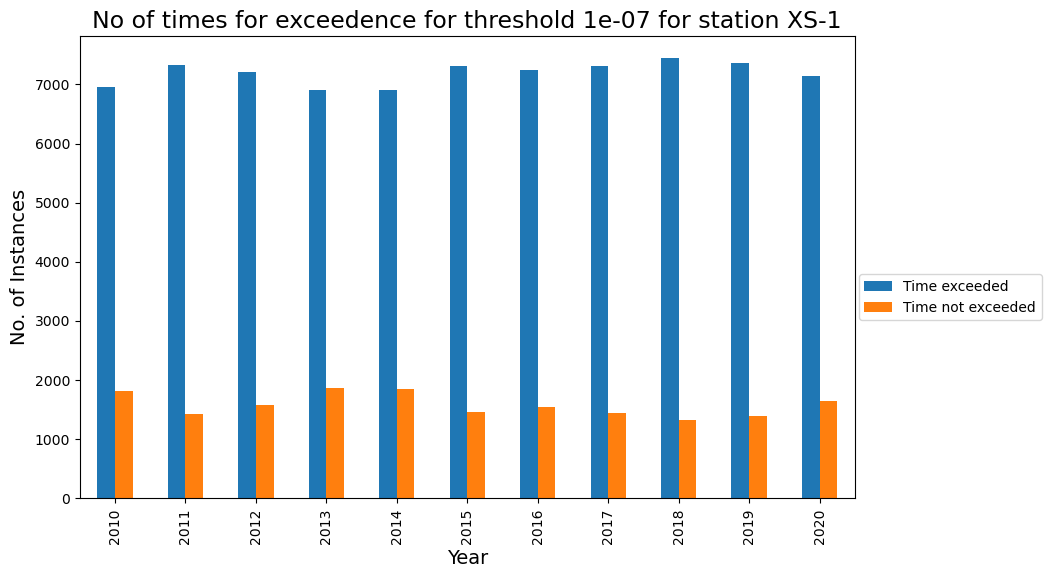

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
550  2010          6897              1863
551  2011          7227              1533
552  2012          7158              1626
553  2013          6910              1850
554  2014          6914              1846
555  2015          7257              1503
556  2016          7168              1616
557  2017          7231              1529
558  2018          7411              1349
559  2019          7361              1399
560  2020          7038              1746

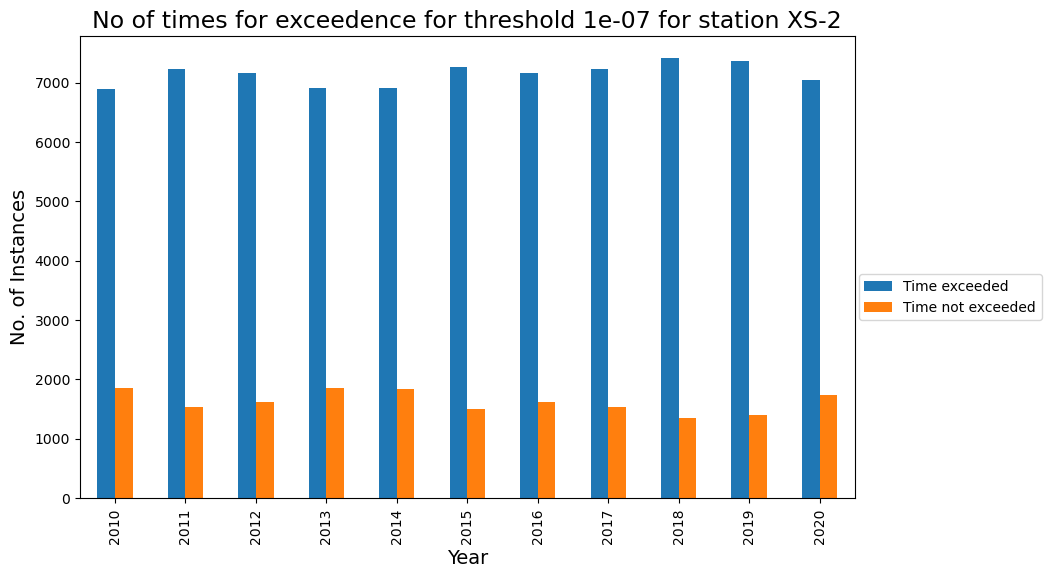

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
561  2010          7019              1741
562  2011          7318              1442
563  2012          7239              1545
564  2013          7040              1720
565  2014          7044              1716
566  2015          7366              1394
567  2016          7224              1560
568  2017          7334              1426
569  2018          7488              1272
570  2019          7467              1293
571  2020          7520              1264

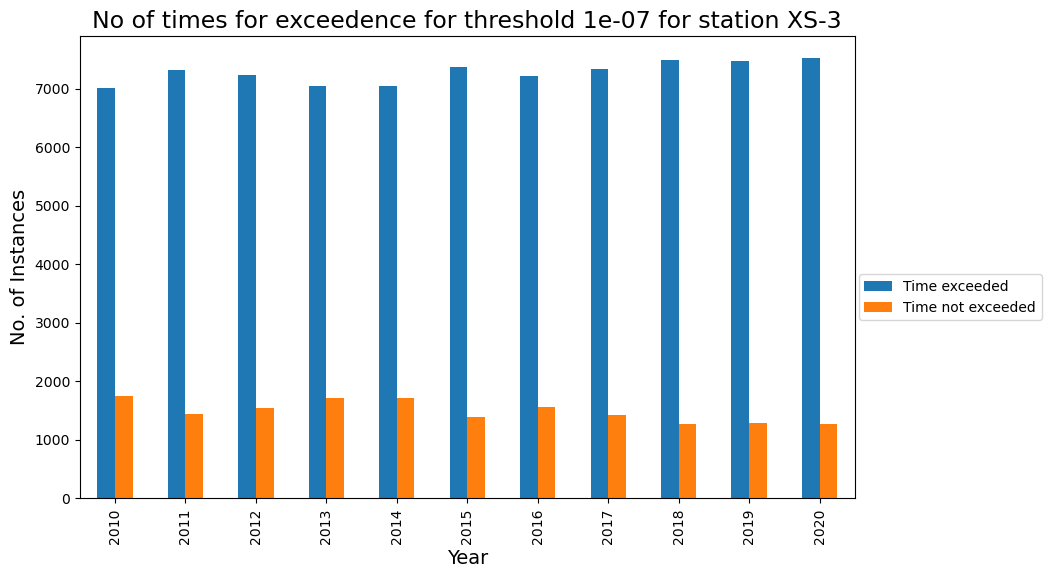

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
572  2010          6459              2301
573  2011          6965              1795
574  2012          6521              2263
575  2013          6460              2300
576  2014          6351              2409
577  2015          6991              1769
578  2016          6974              1810
579  2017          6675              2085
580  2018          7195              1565
581  2019          6866              1894
582  2020          6487              2297

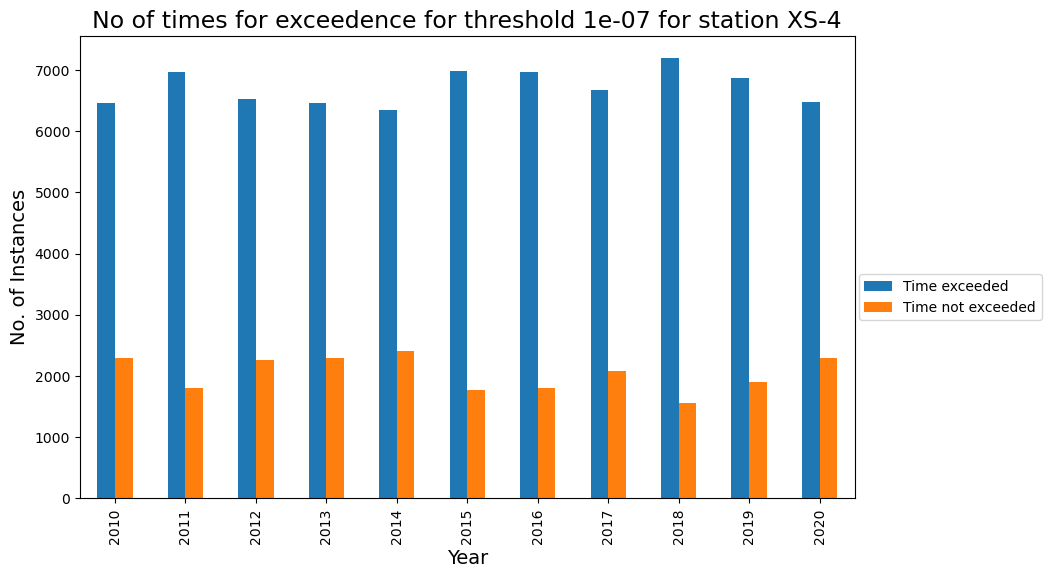

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
583  2010          6662              2098
584  2011          7102              1658
585  2012          6755              2029
586  2013          6635              2125
587  2014          6612              2148
588  2015          7177              1583
589  2016          7104              1680
590  2017          6841              1919
591  2018          7346              1414
592  2019          7125              1635
593  2020          6594              2190

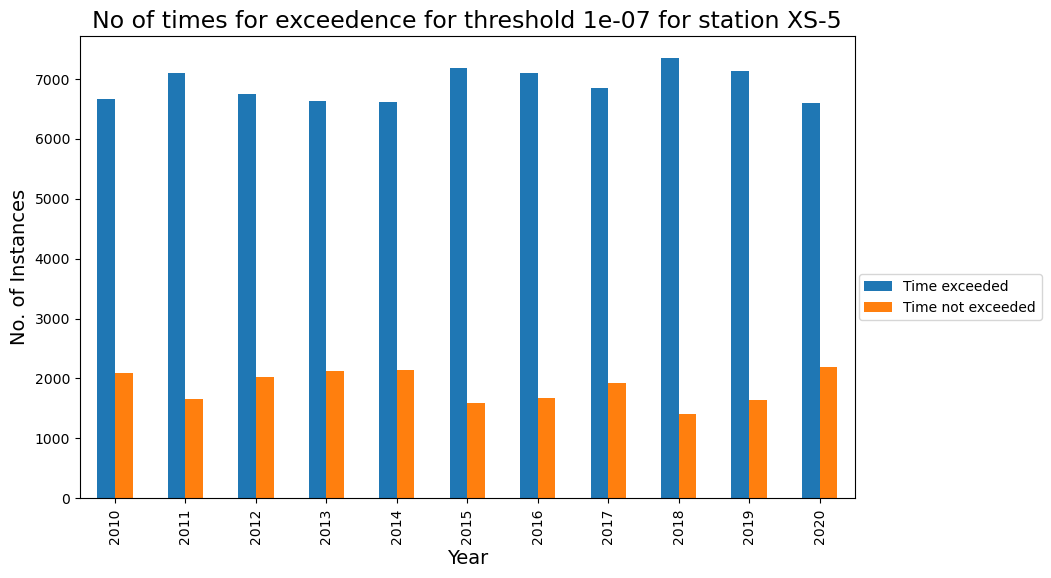

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
594  2010          6654              2106
595  2011          7013              1747
596  2012          6731              2053
597  2013          6712              2048
598  2014          6618              2142
599  2015          7148              1612
600  2016          7049              1735
601  2017          6807              1953
602  2018          7264              1496
603  2019          7145              1615
604  2020          6811              1973

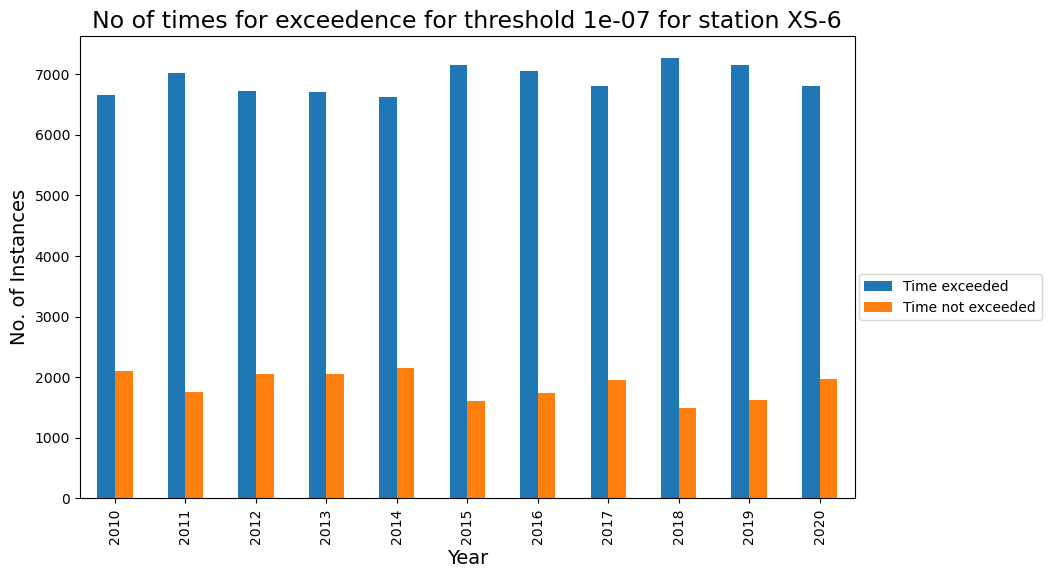

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
605  2010          6885              1875
606  2011          7155              1605
607  2012          6947              1837
608  2013          6876              1884
609  2014          6830              1930
610  2015          7325              1435
611  2016          7152              1632
612  2017          6999              1761
613  2018          7384              1376
614  2019          7289              1471
615  2020          7210              1574

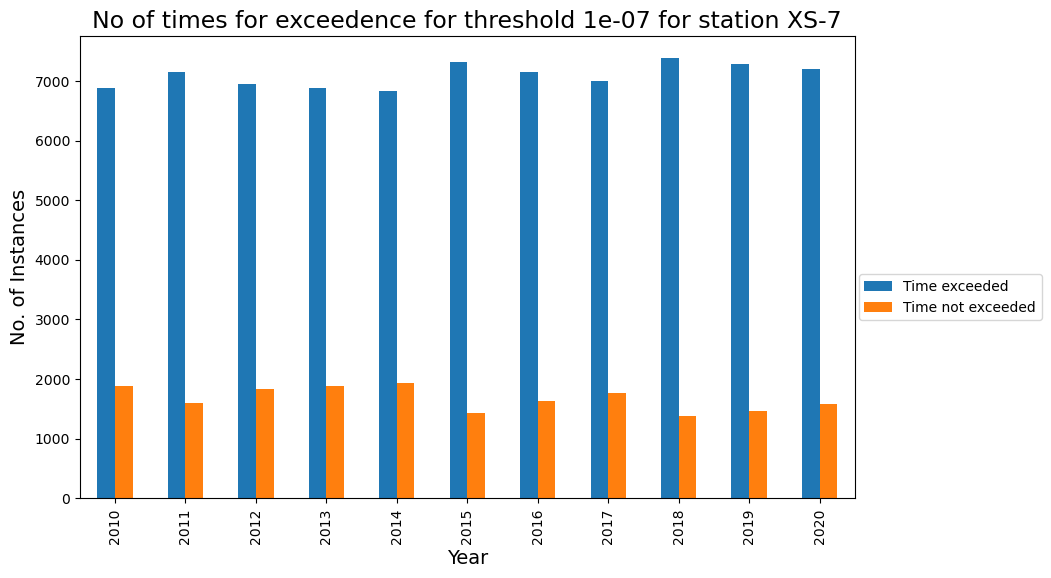

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
616  2010          6486              2274
617  2011          6958              1802
618  2012          6514              2270
619  2013          6459              2301
620  2014          6419              2341
621  2015          6994              1766
622  2016          7015              1769
623  2017          6649              2111
624  2018          7220              1540
625  2019          6908              1852
626  2020          6705              2079

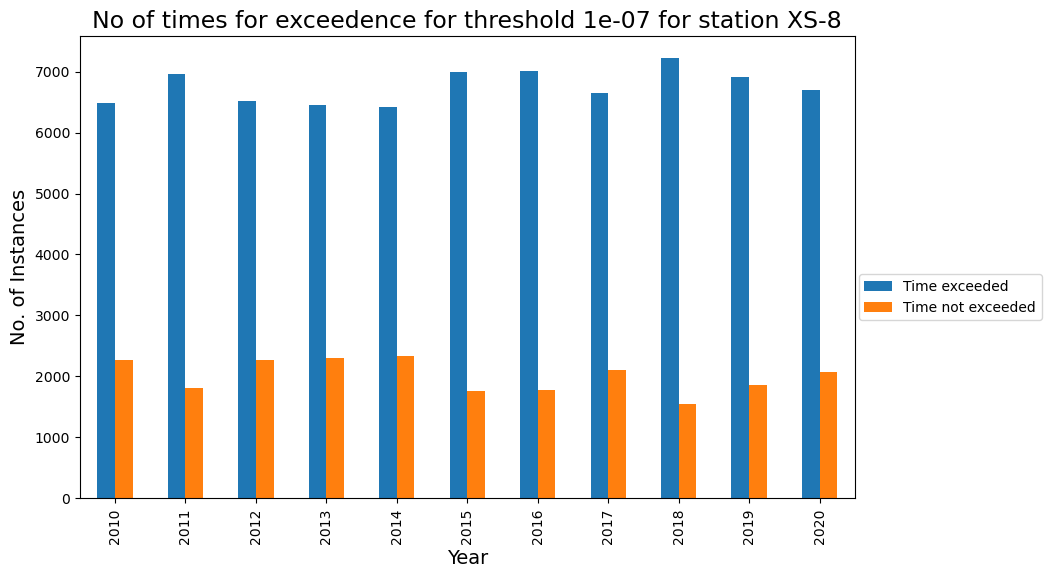

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
627  2010          6694              2066
628  2011          7111              1649
629  2012          6748              2036
630  2013          6673              2087
631  2014          6631              2129
632  2015          7214              1546
633  2016          7112              1672
634  2017          6801              1959
635  2018          7376              1384
636  2019          7155              1605
637  2020          7054              1730

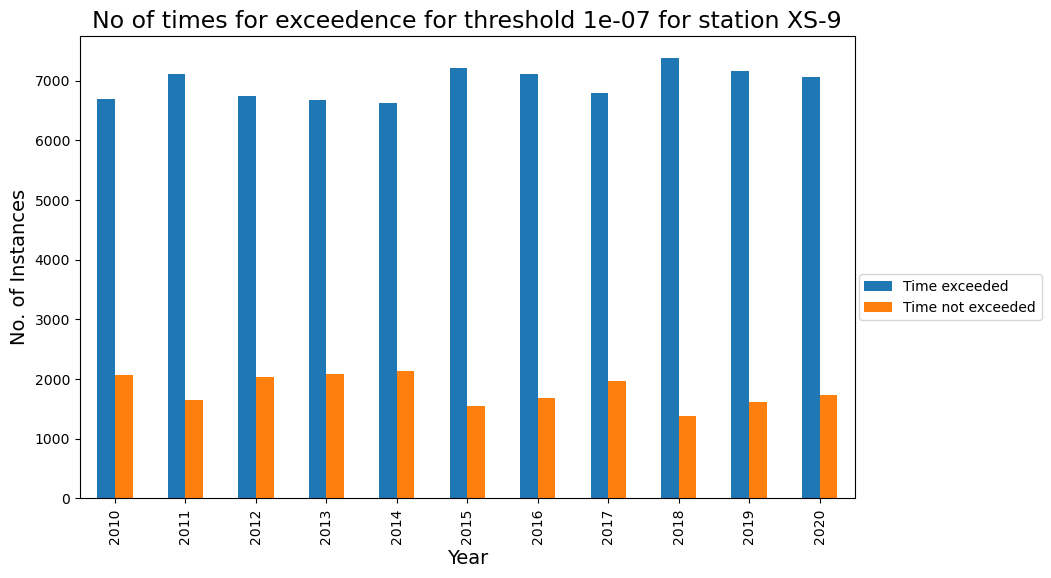

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
638  2010          6613              2147
639  2011          6993              1767
640  2012          6684              2100
641  2013          6675              2085
642  2014          6609              2151
643  2015          7098              1662
644  2016          7015              1769
645  2017          6736              2024
646  2018          7239              1521
647  2019          7111              1649
648  2020          7052              1732

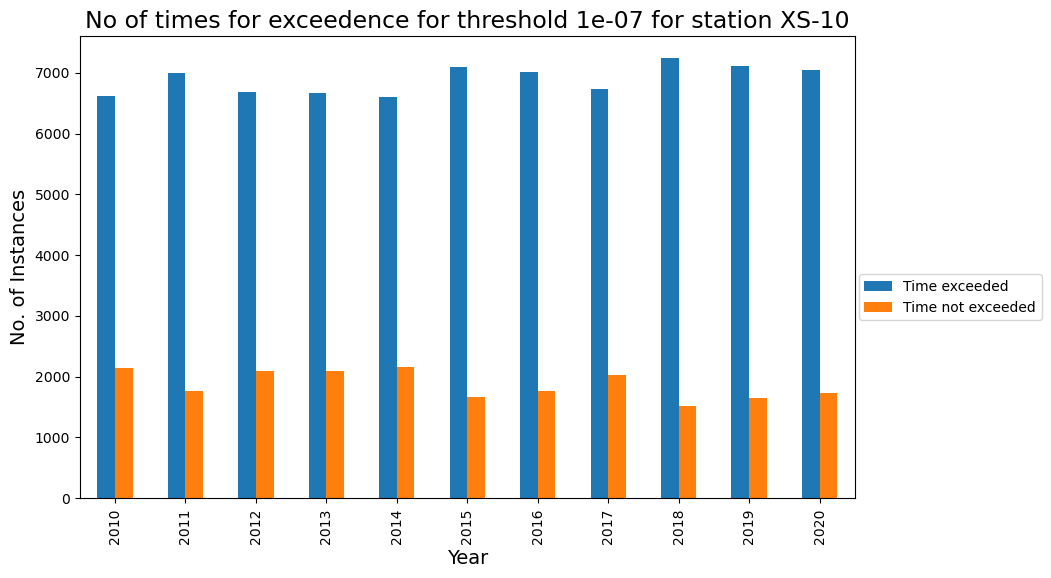

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
649  2010          7102              1658
650  2011          7359              1401
651  2012          7217              1567
652  2013          7148              1612
653  2014          7149              1611
654  2015          7539              1221
655  2016          7332              1452
656  2017          7180              1580
657  2018          7614              1146
658  2019          7566              1194
659  2020          7363              1421

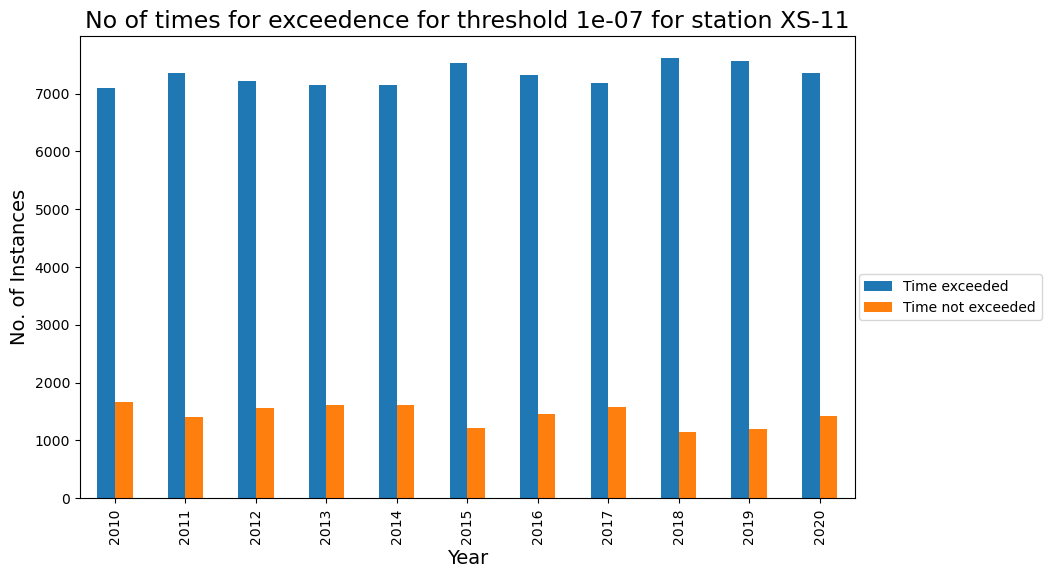

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
660  2010          6512              2248
661  2011          6972              1788
662  2012          6469              2315
663  2013          6482              2278
664  2014          6520              2240
665  2015          7004              1756
666  2016          6982              1802
667  2017          6648              2112
668  2018          7185              1575
669  2019          6981              1779
670  2020          6946              1838

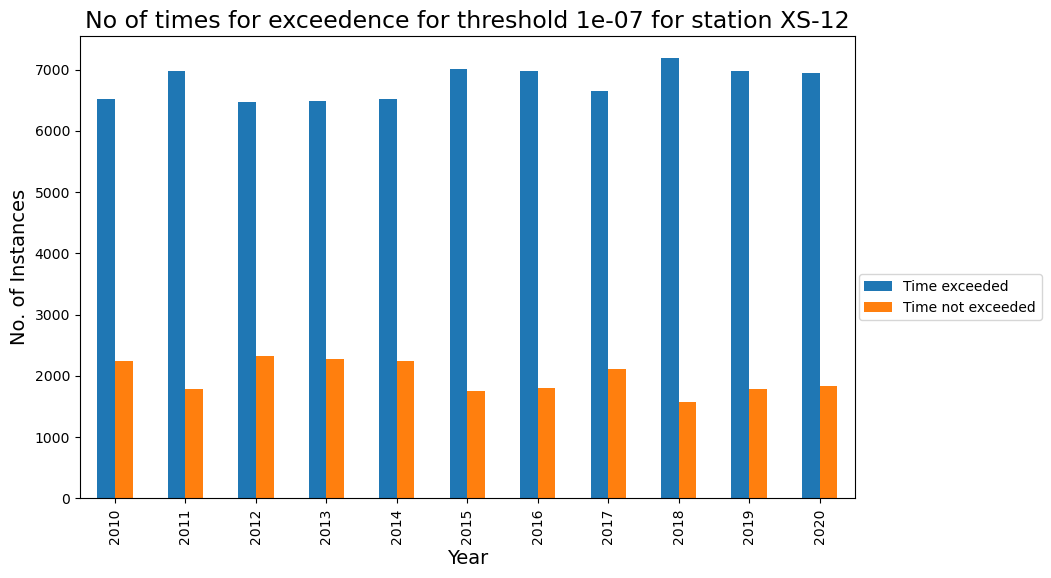

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
671  2010          6611              2149
672  2011          6966              1794
673  2012          6621              2163
674  2013          6614              2146
675  2014          6624              2136
676  2015          7098              1662
677  2016          7013              1771
678  2017          6689              2071
679  2018          7265              1495
680  2019          7120              1640
681  2020          7061              1723

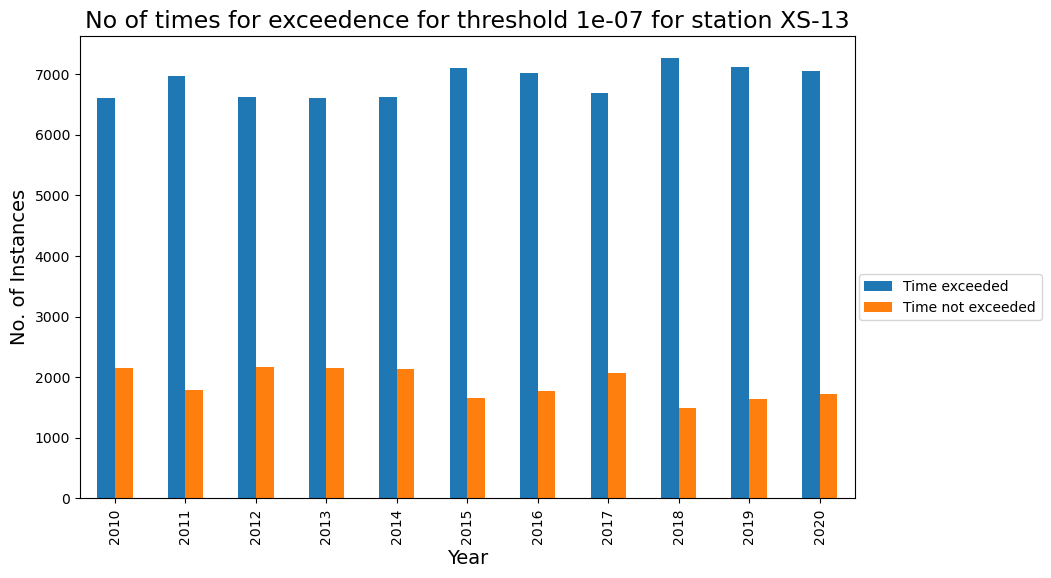

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
682  2010          6614              2146
683  2011          6960              1800
684  2012          6588              2196
685  2013          6652              2108
686  2014          6710              2050
687  2015          7087              1673
688  2016          6996              1788
689  2017          6686              2074
690  2018          7277              1483
691  2019          7082              1678
692  2020          7039              1745

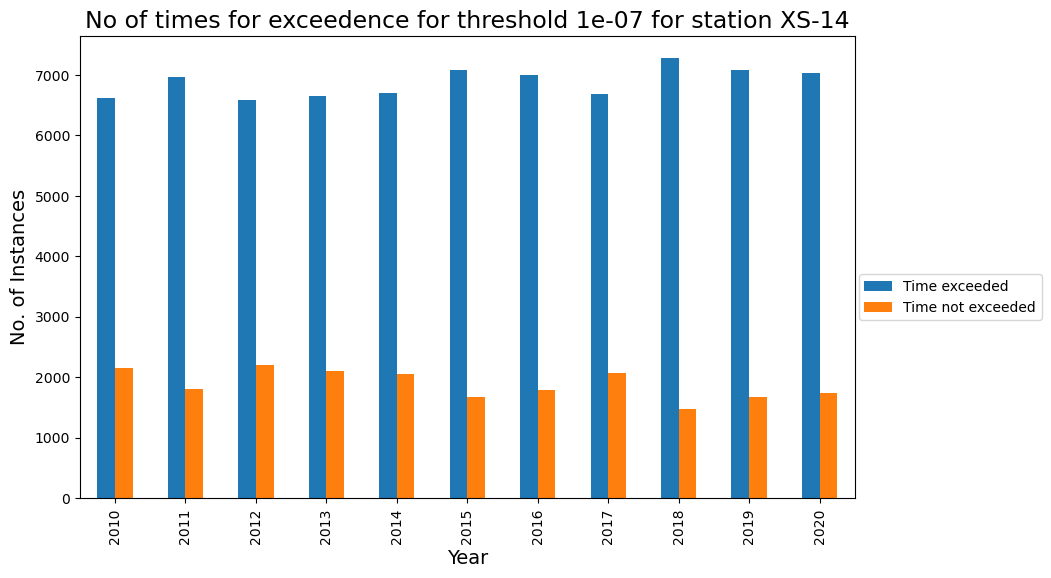

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)


Year Time exceeded Time not exceeded
693  2010          7102              1658
694  2011          7319              1441
695  2012          7202              1582
696  2013          7098              1662
697  2014          7232              1528
698  2015          7519              1241
699  2016          7288              1496
700  2017          7156              1604
701  2018          7616              1144
702  2019          7561              1199
703  2020          7202              1582

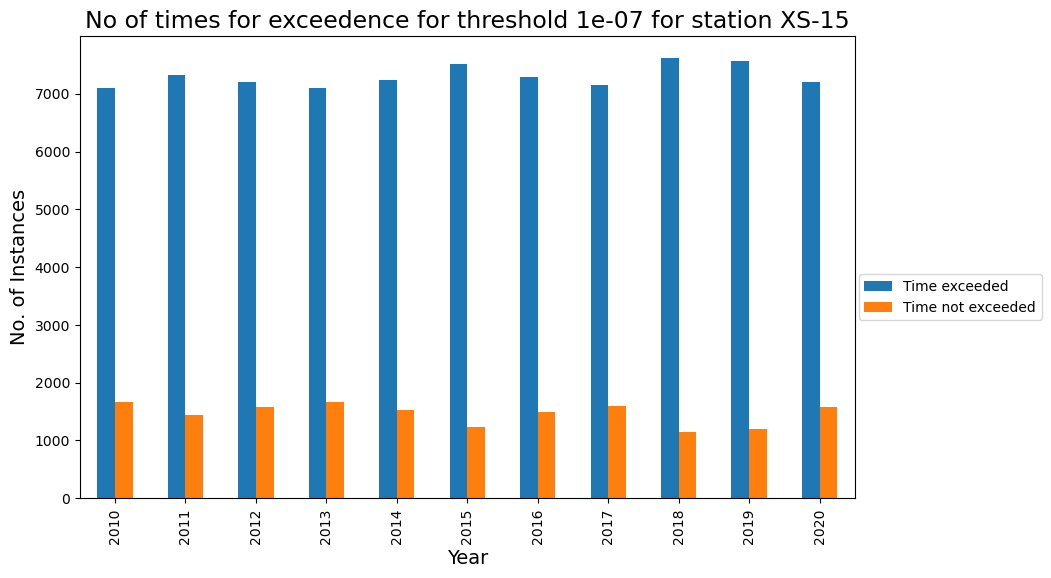

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


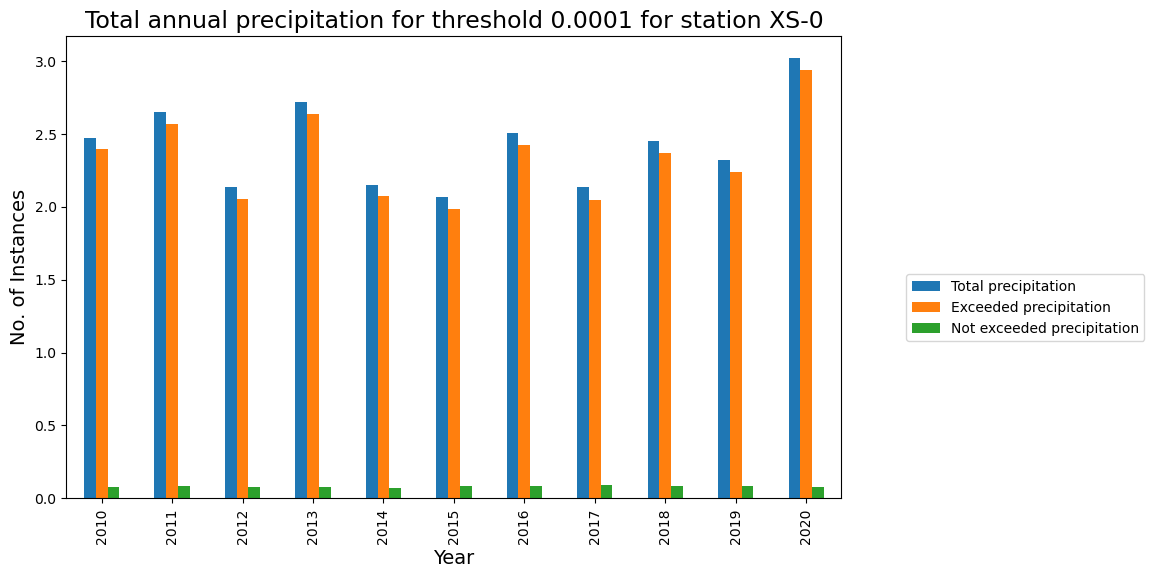

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


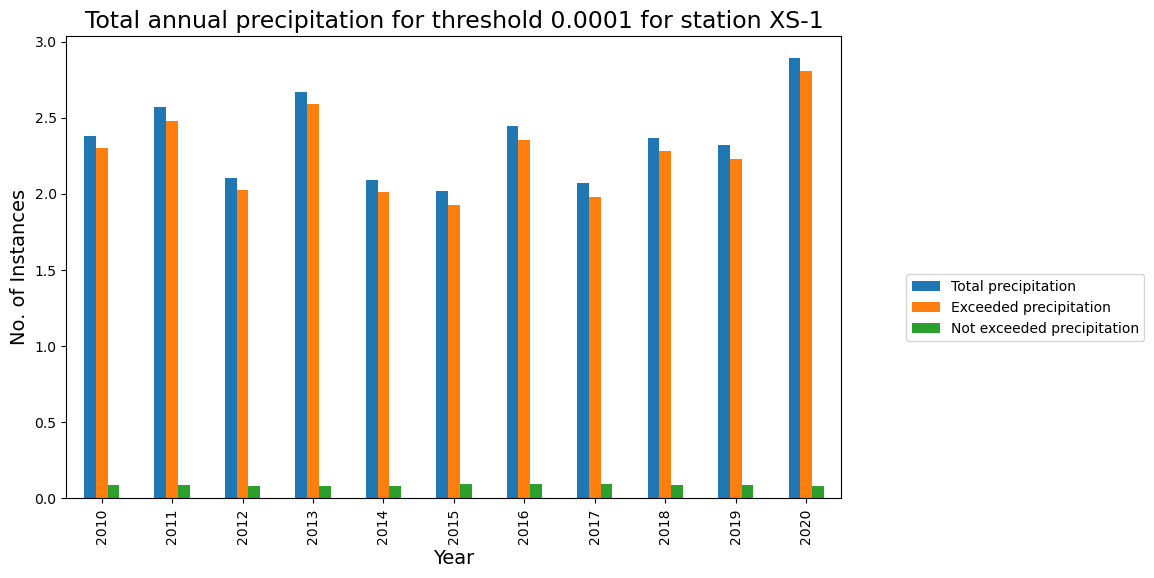

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


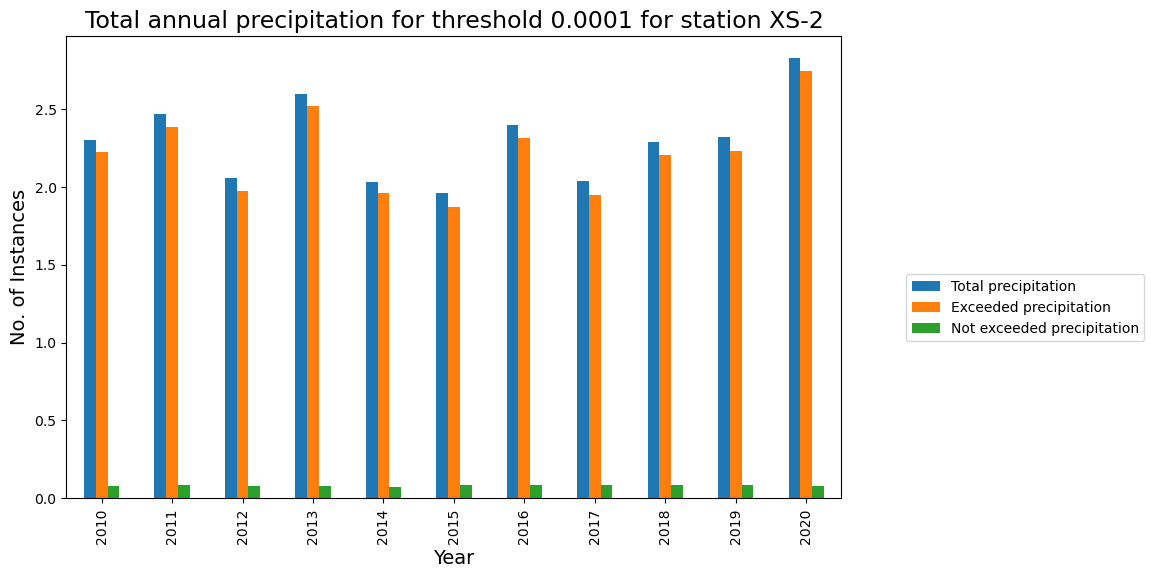

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


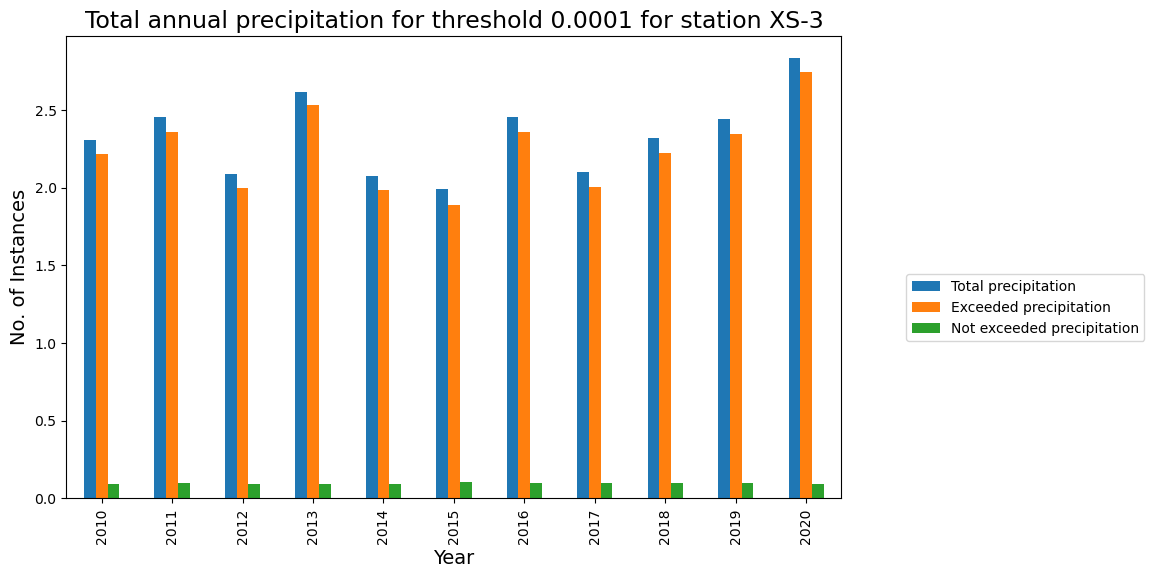

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


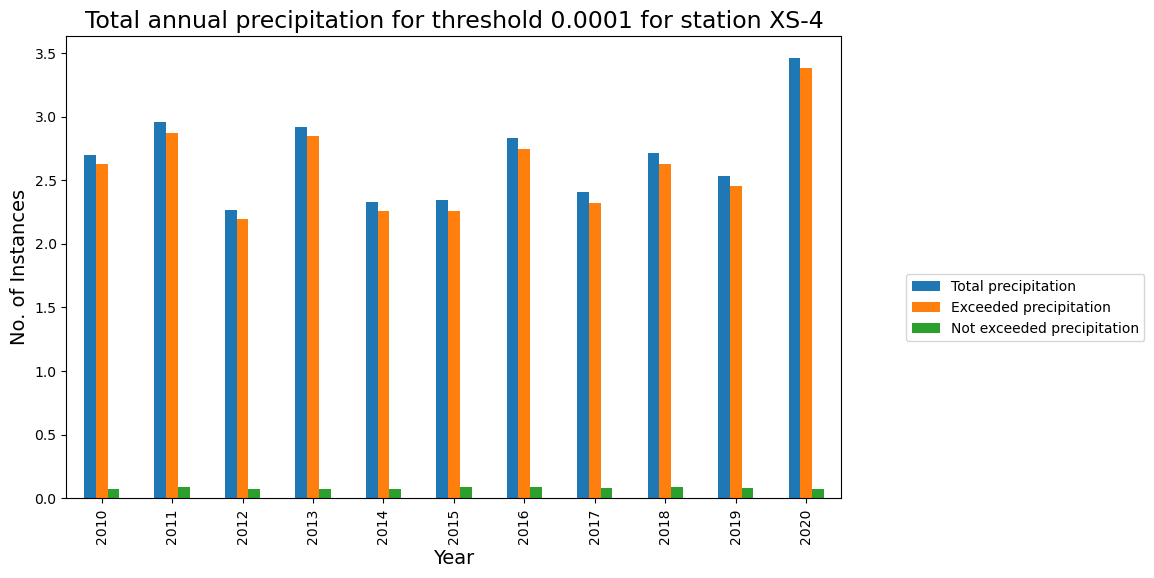

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


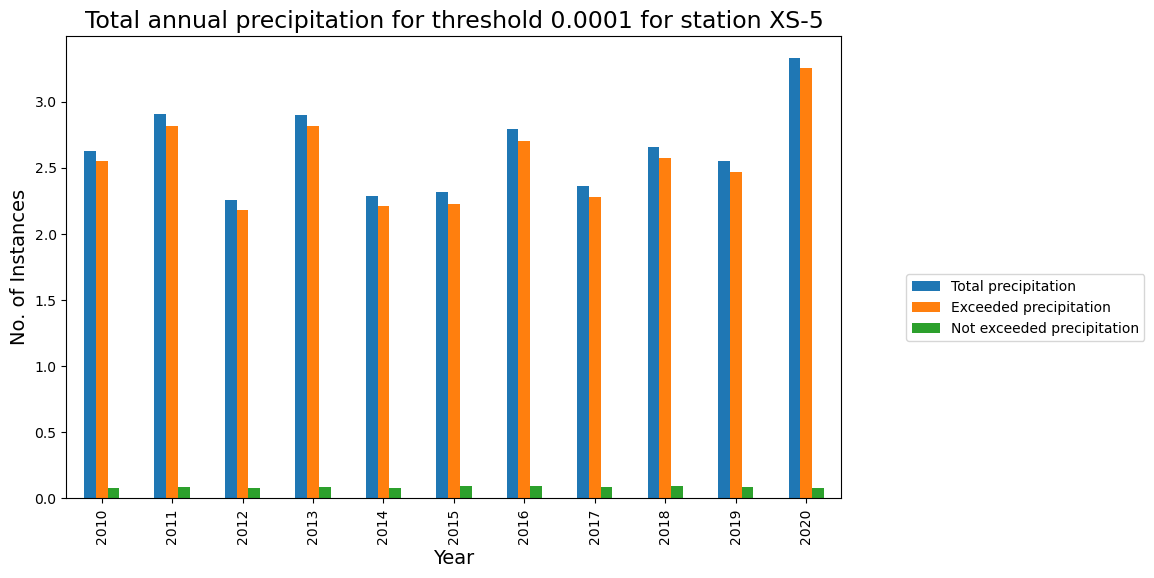

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


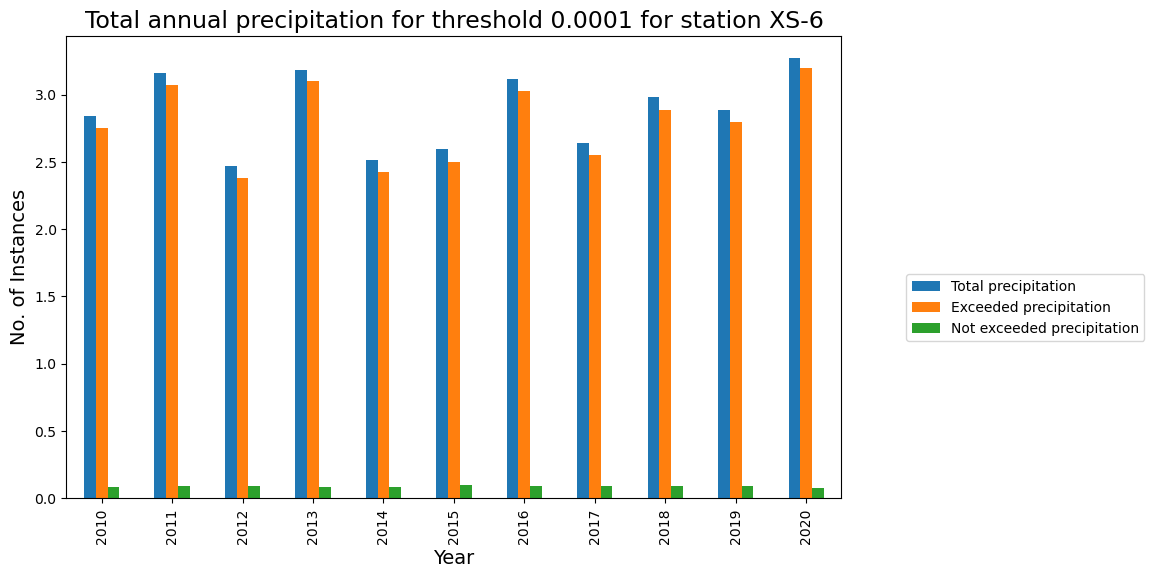

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


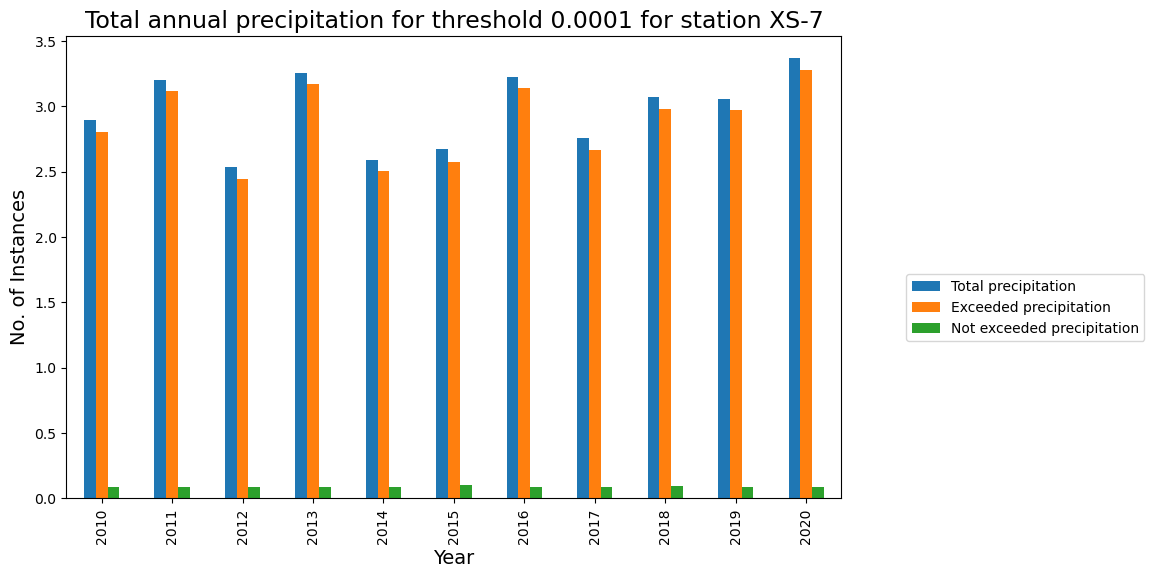

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


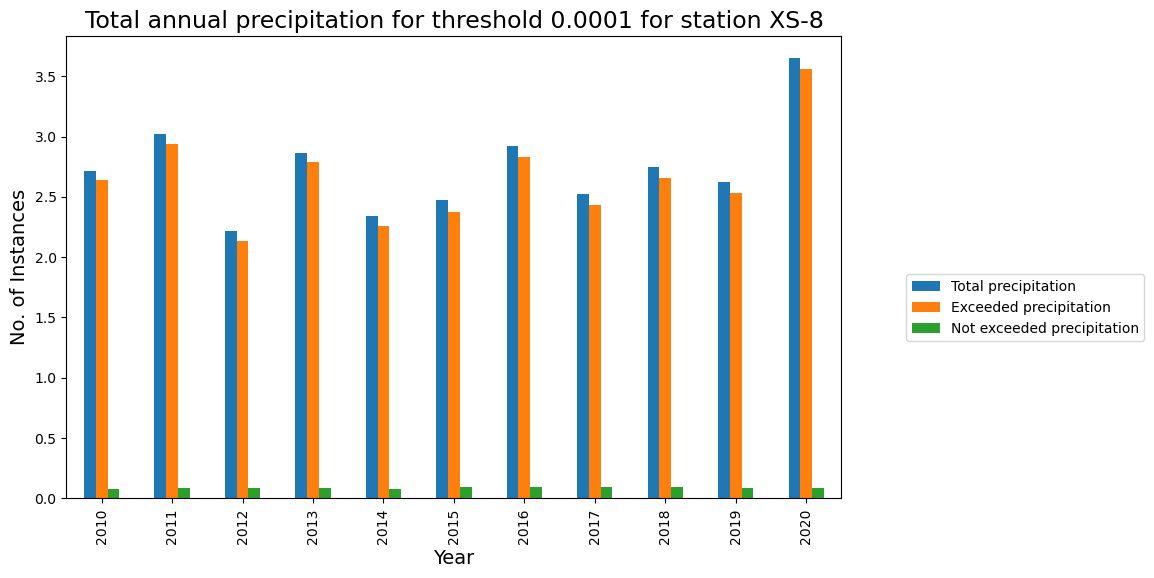

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


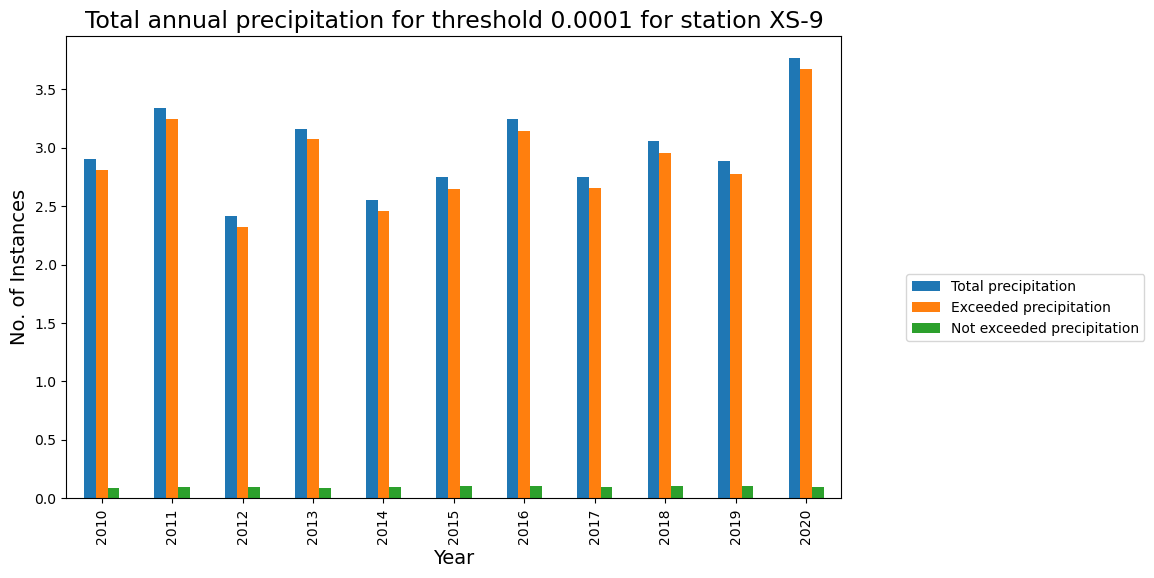

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


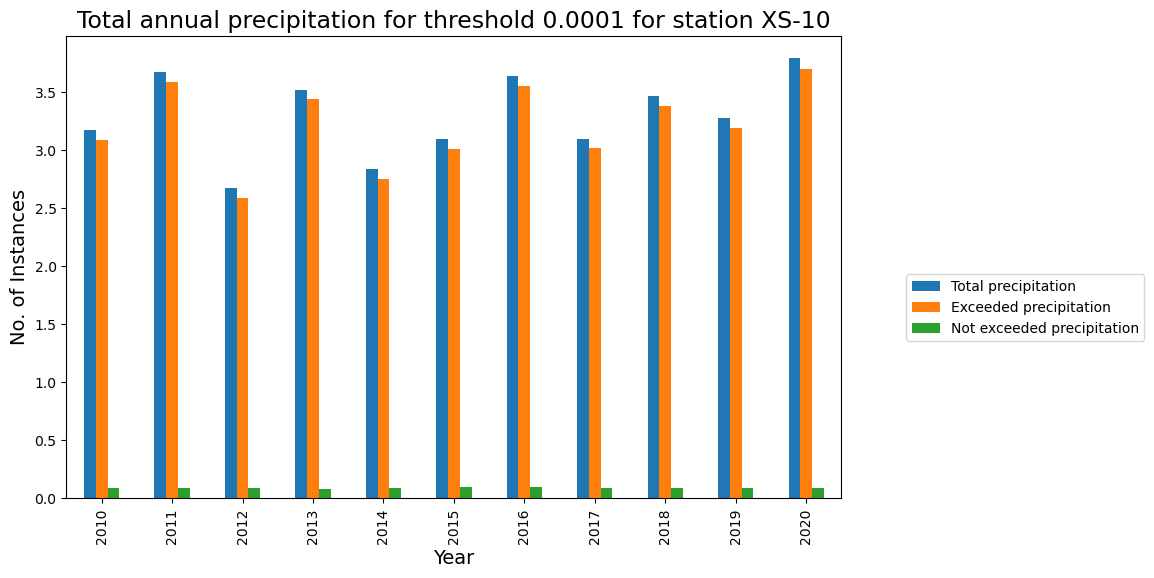

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


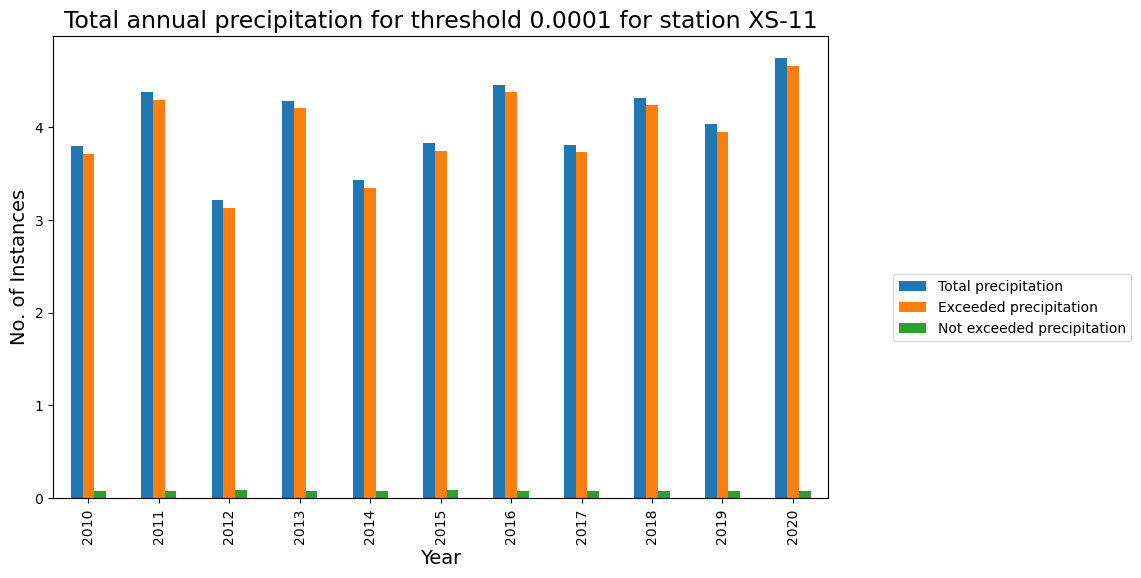

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


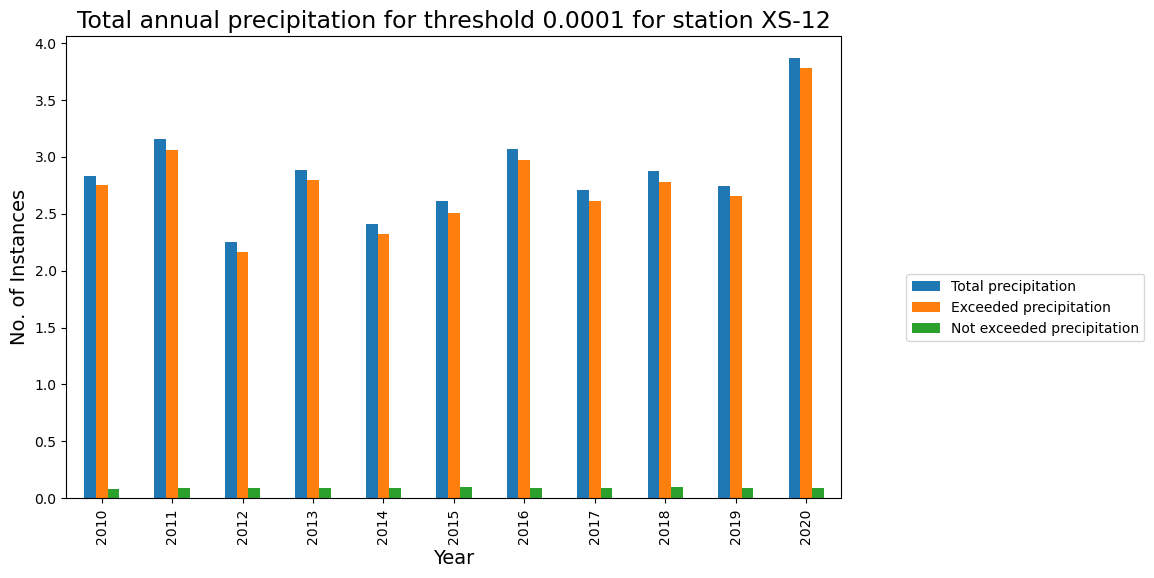

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


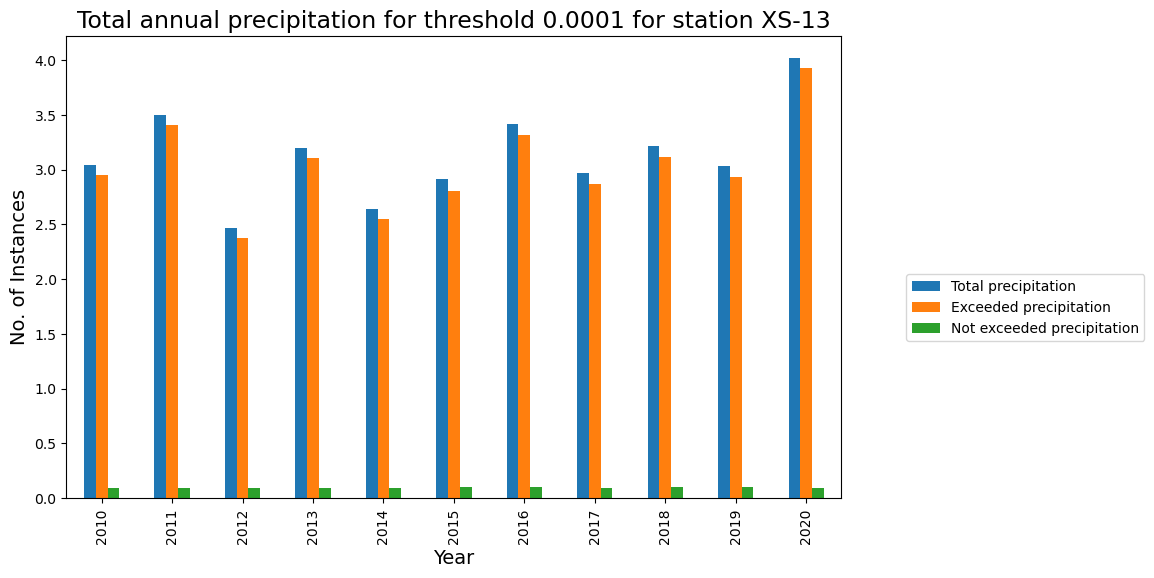

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


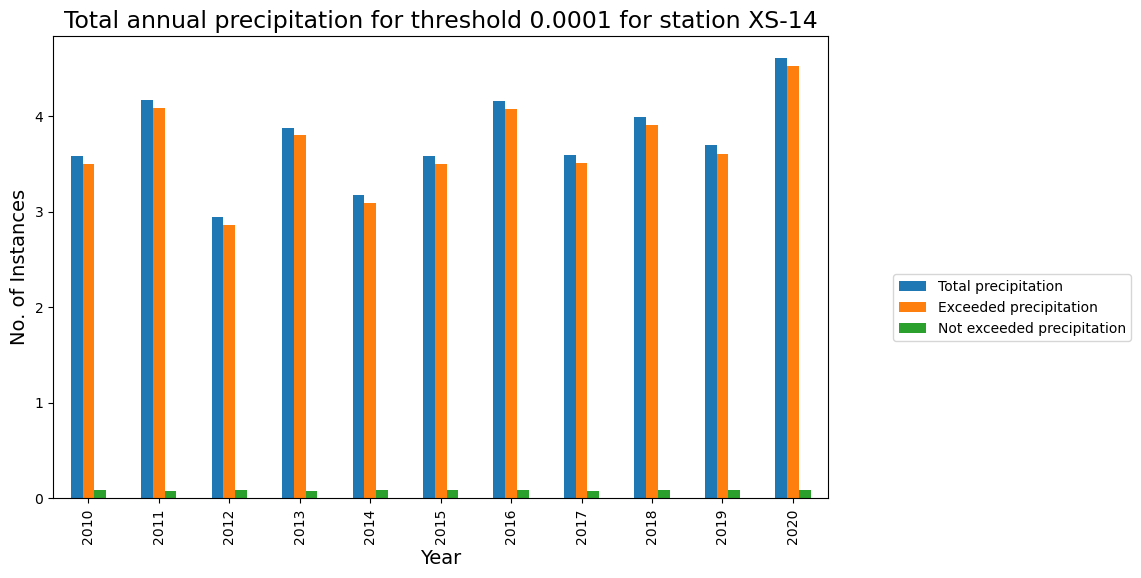

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


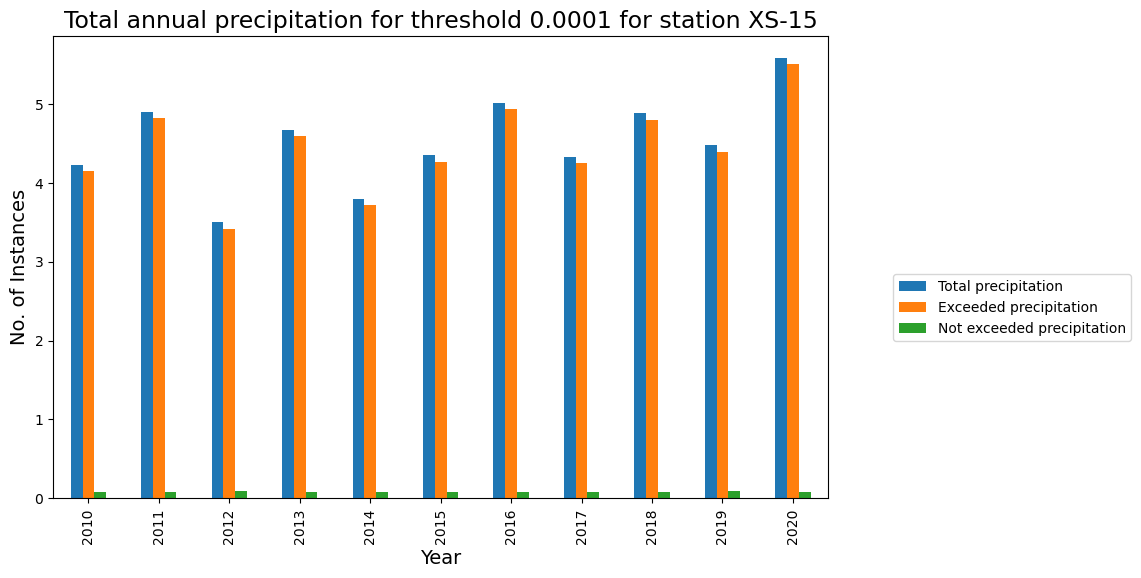

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


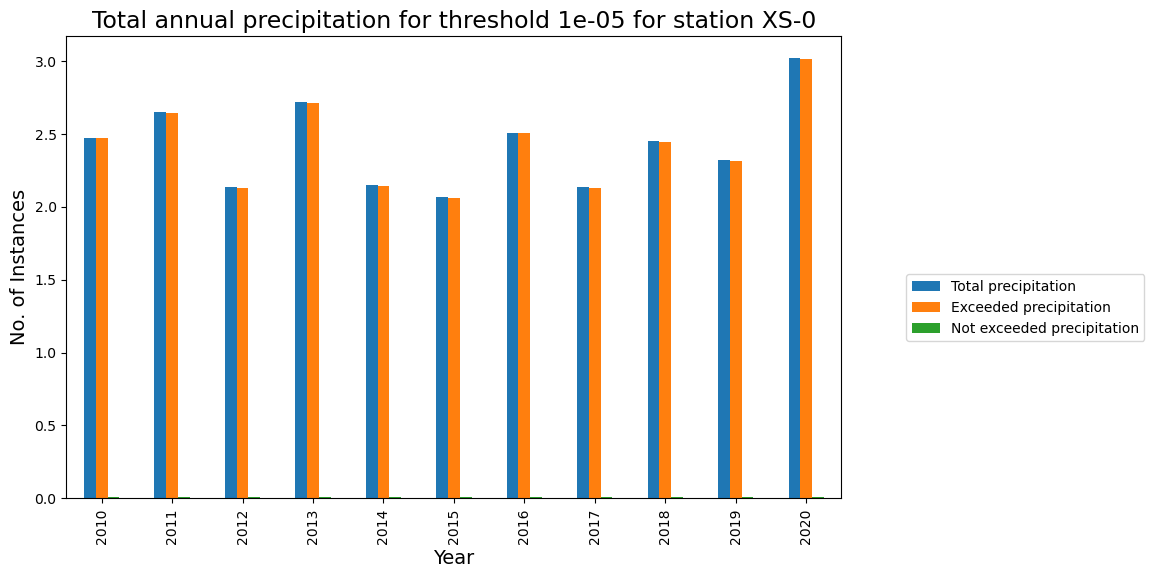

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


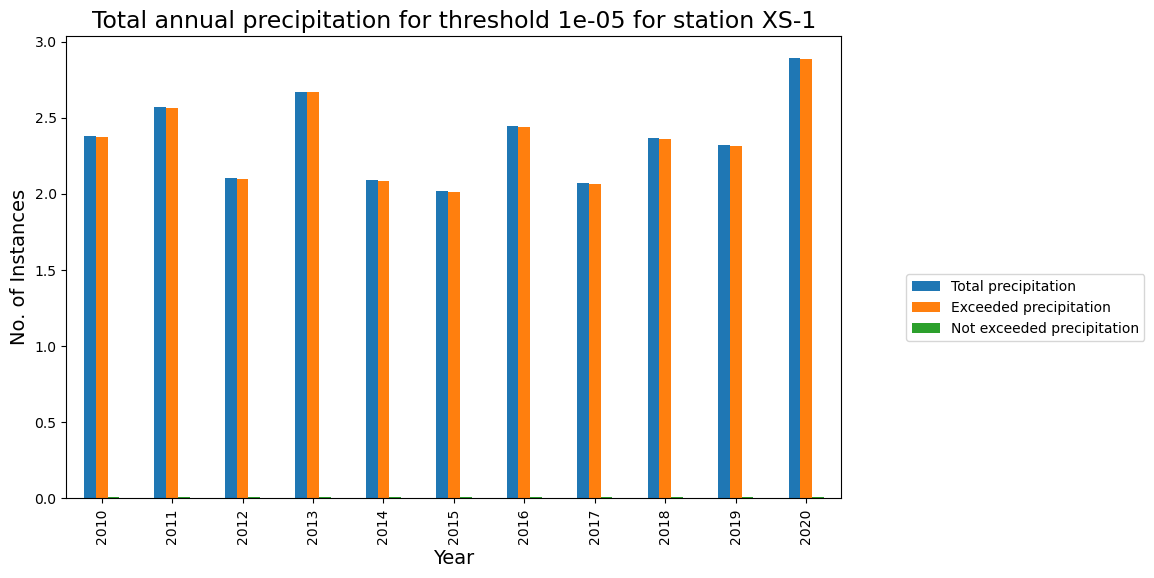

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


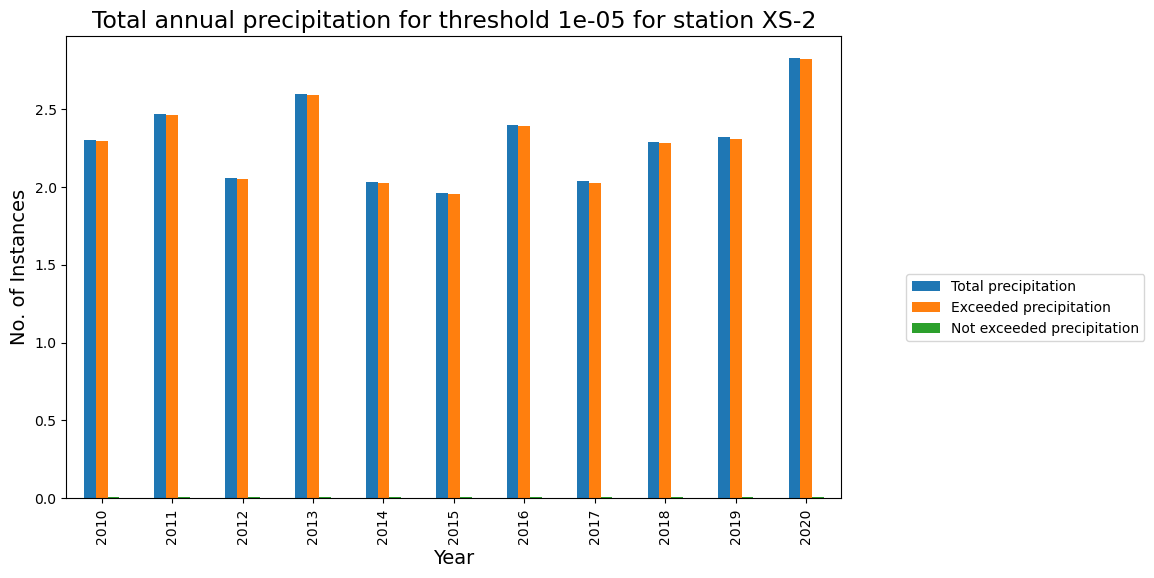

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


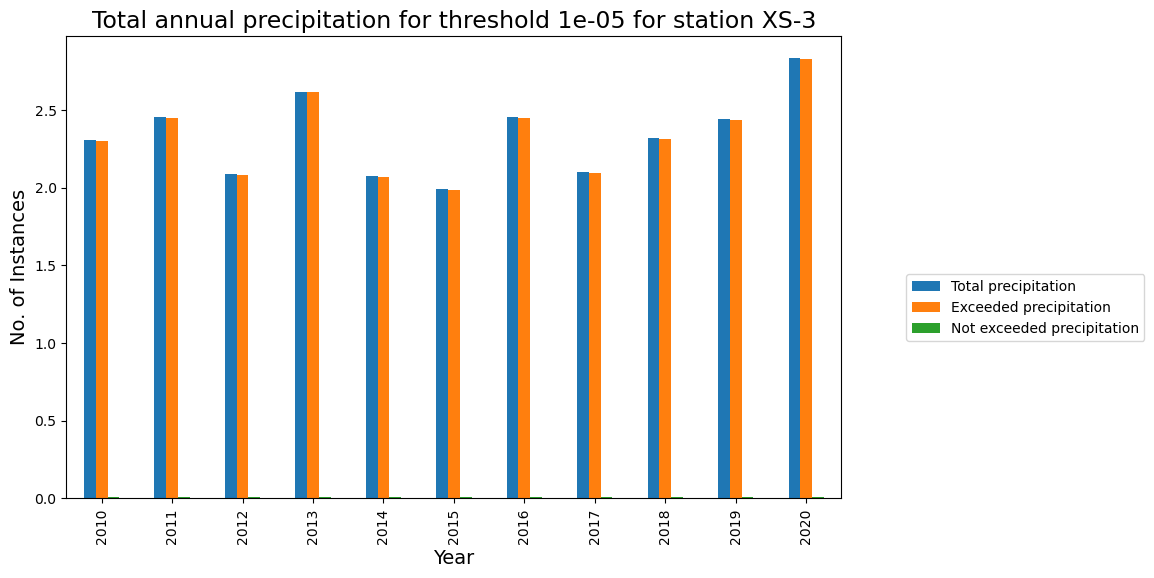

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


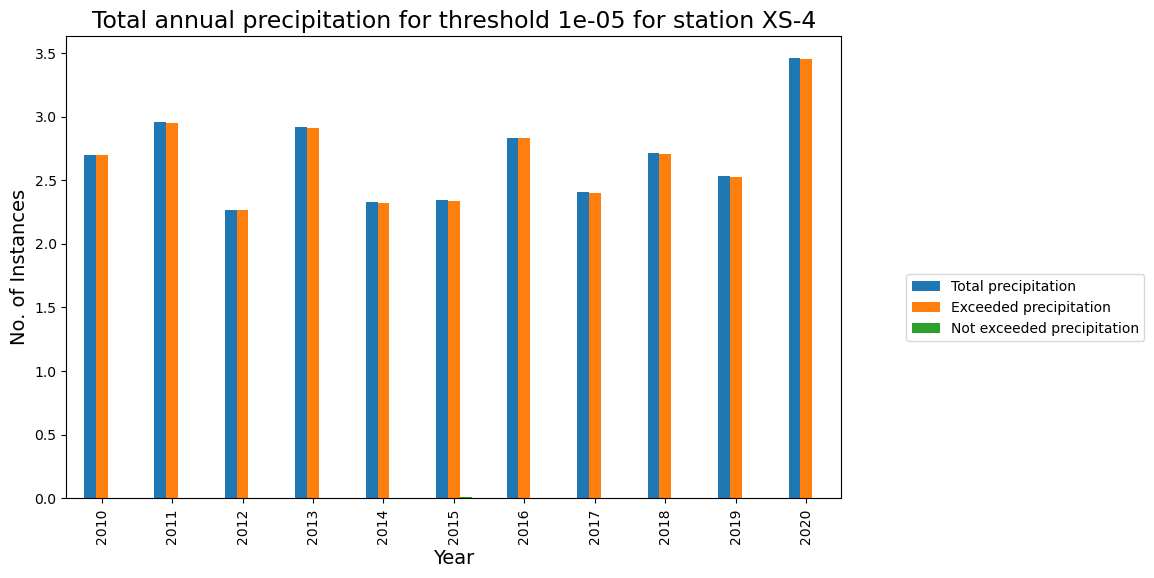

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


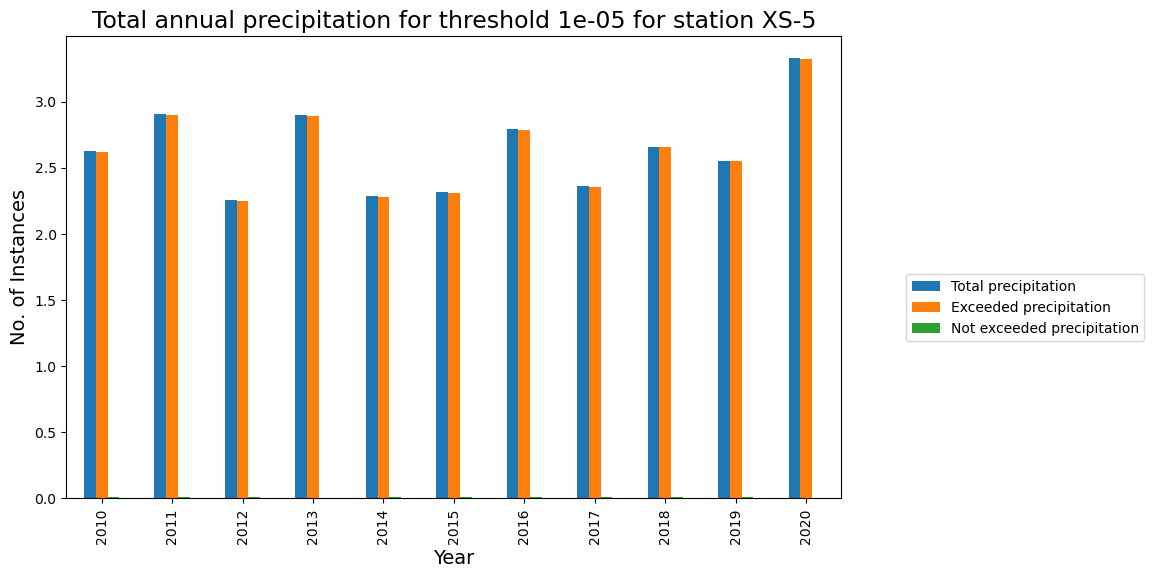

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


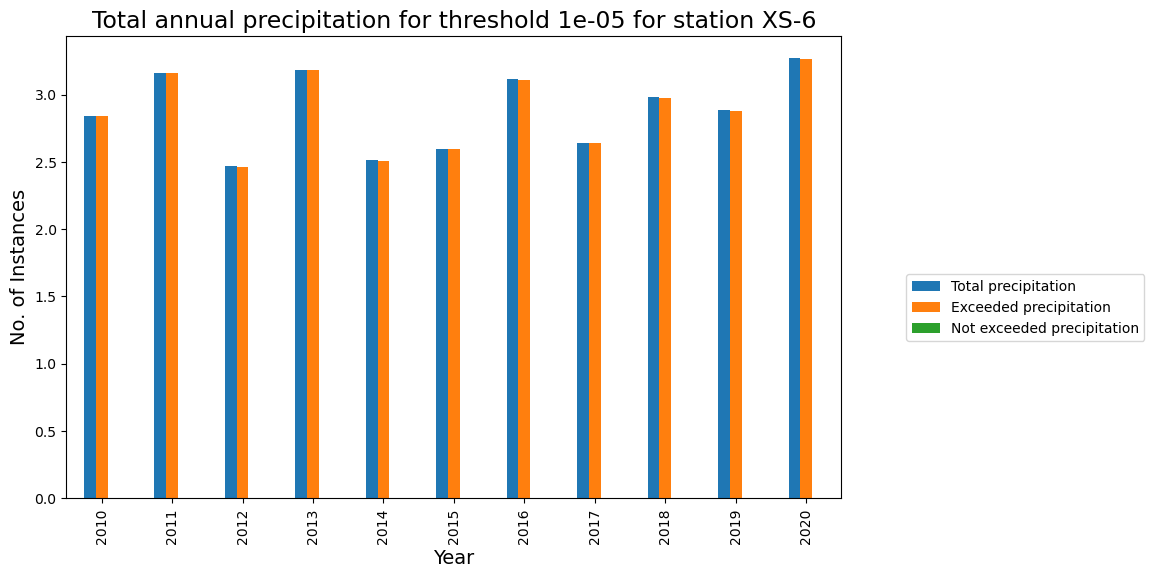

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


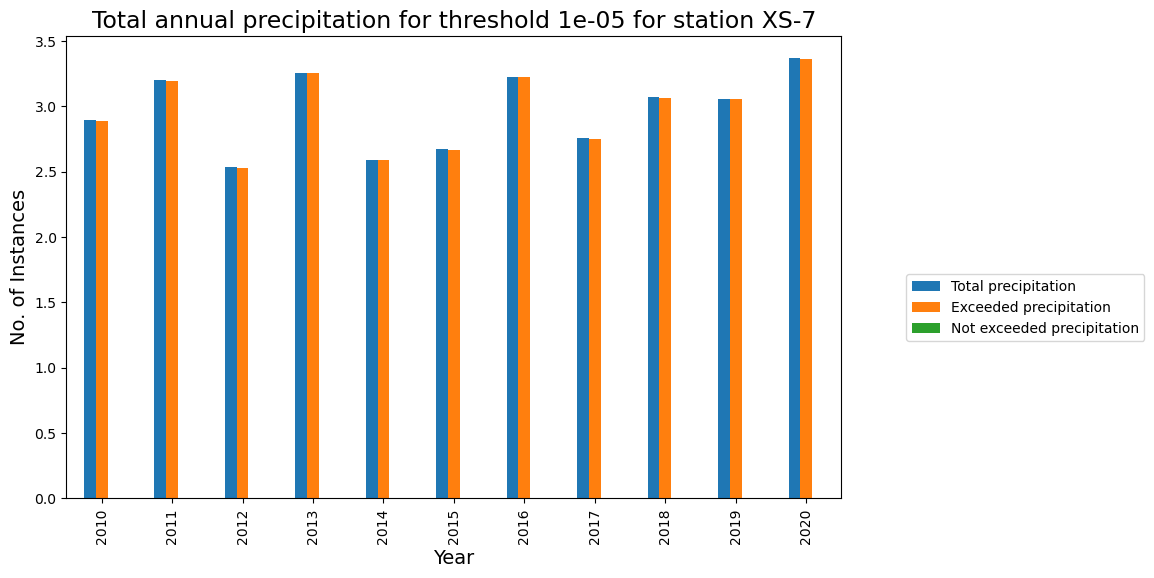

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


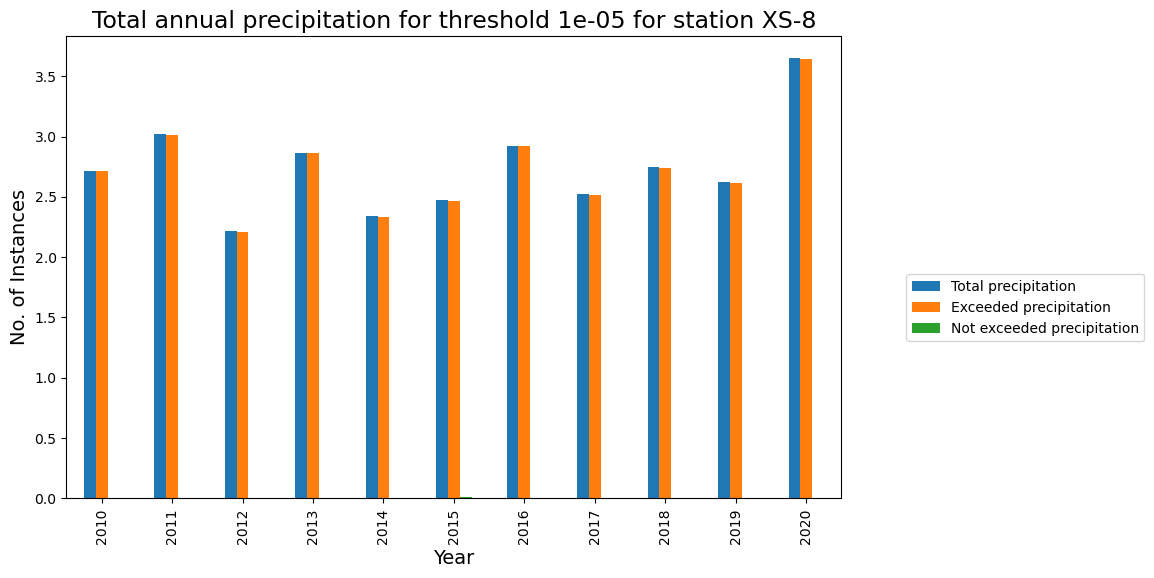

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


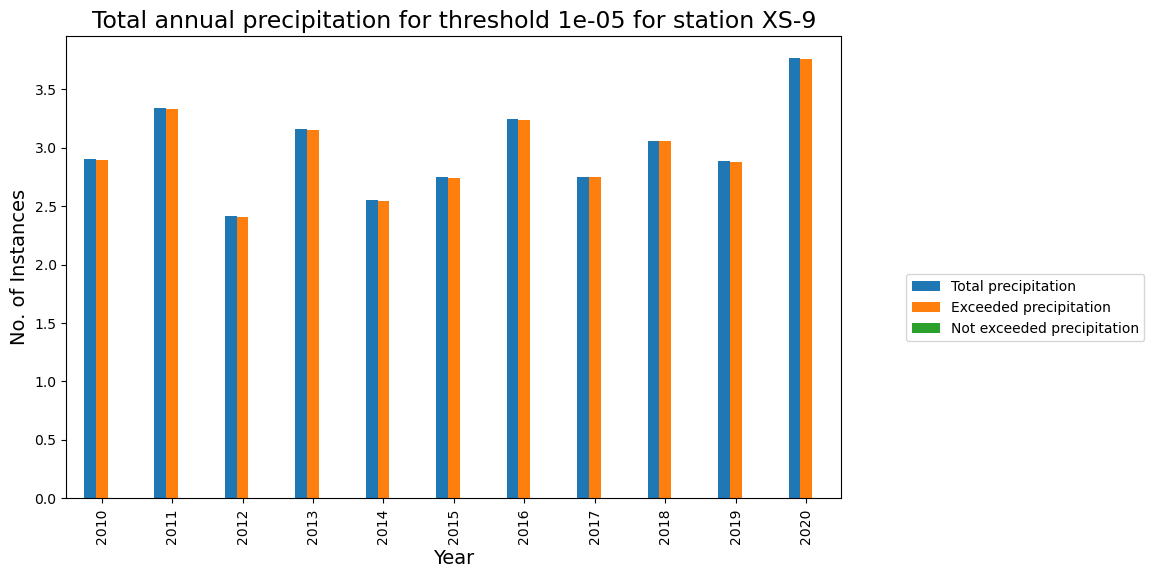

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


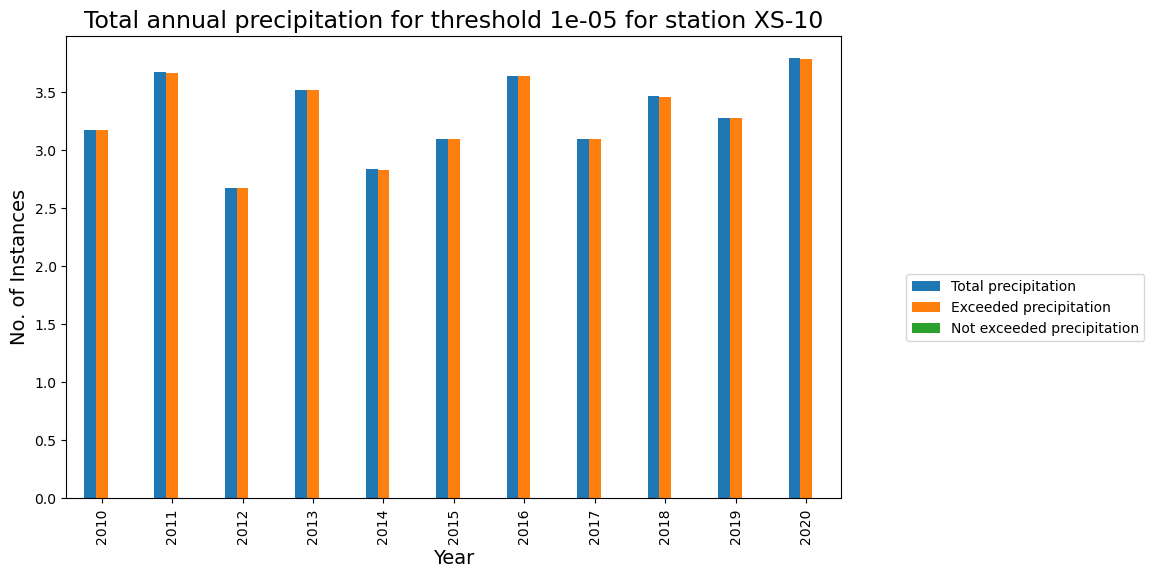

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


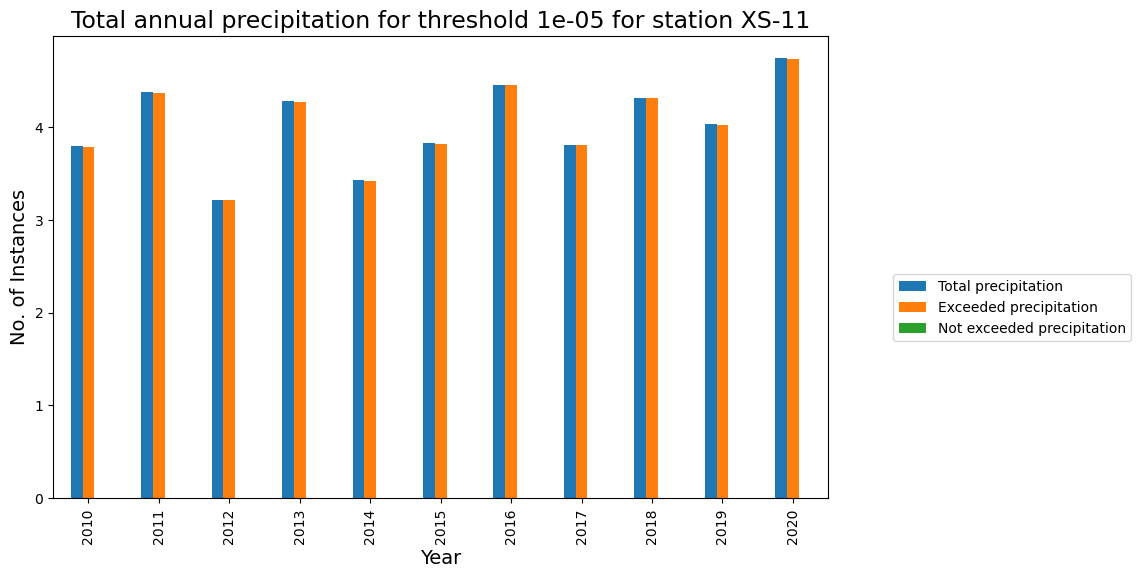

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


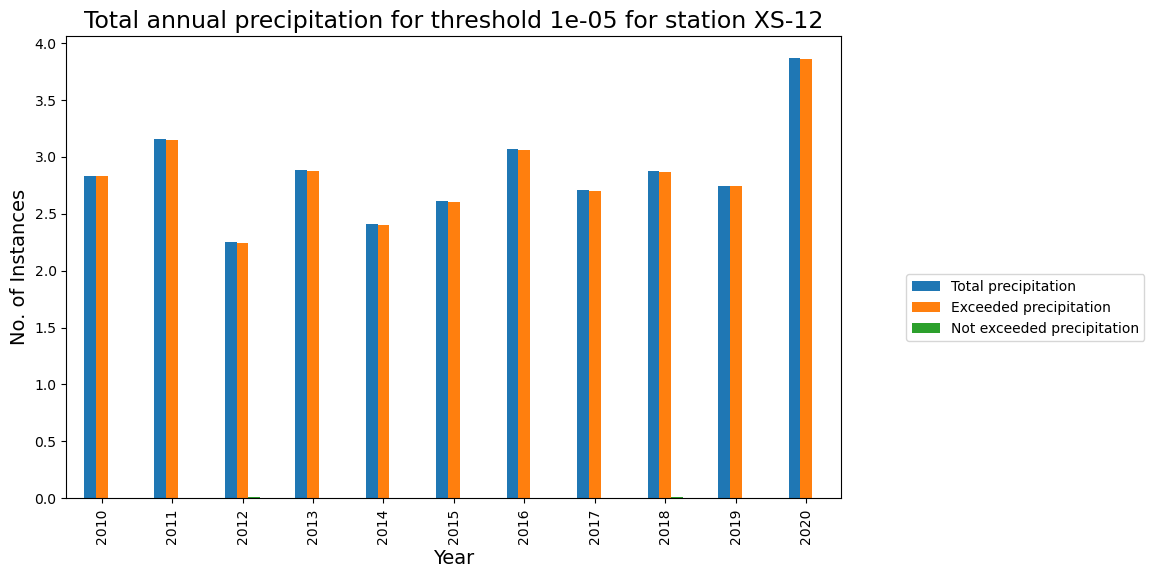

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


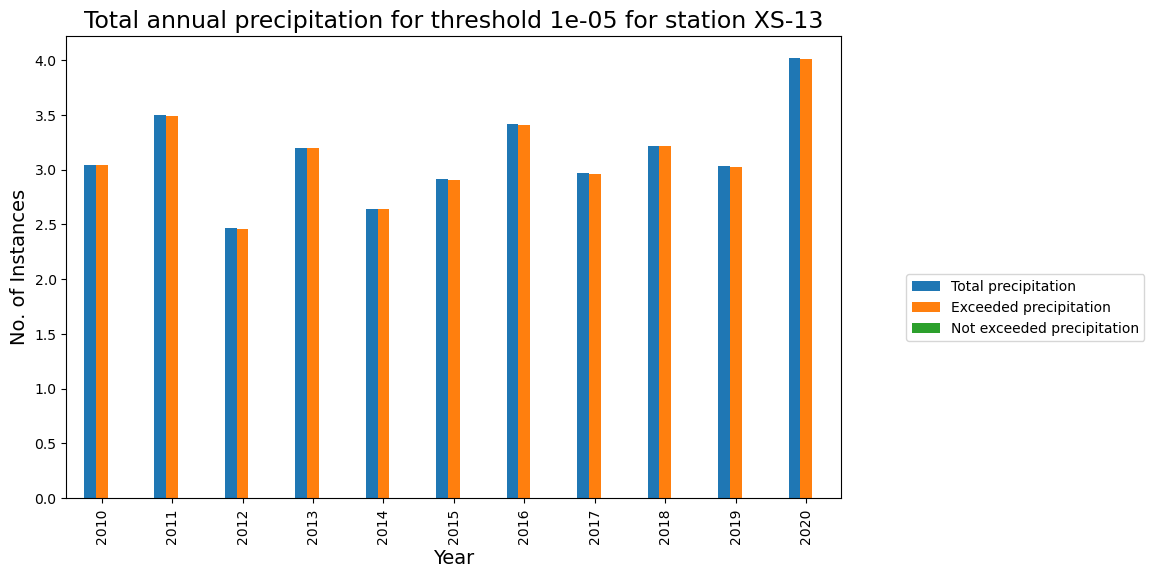

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


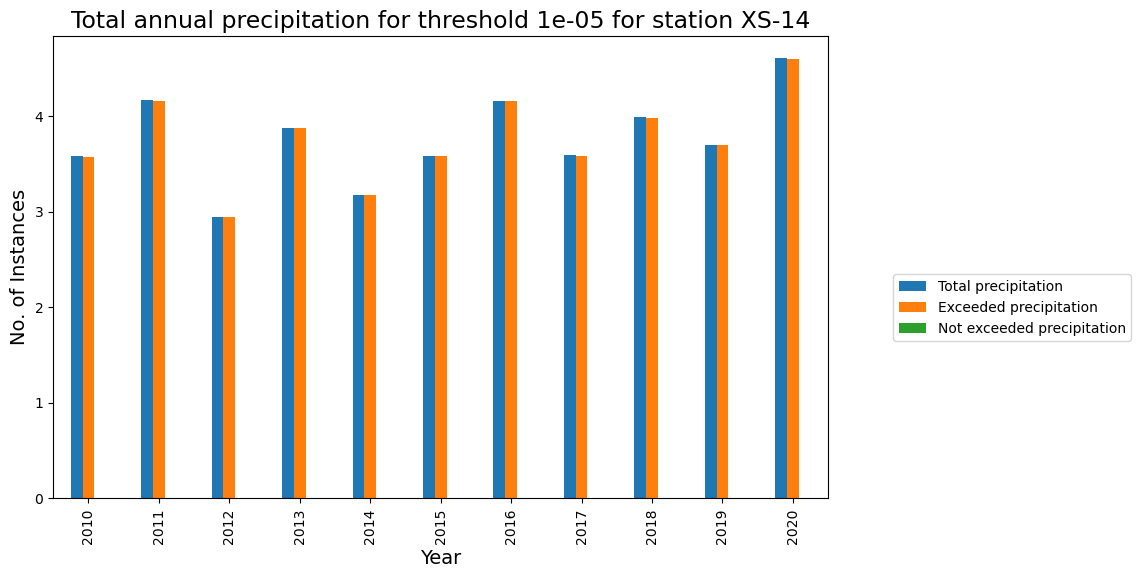

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


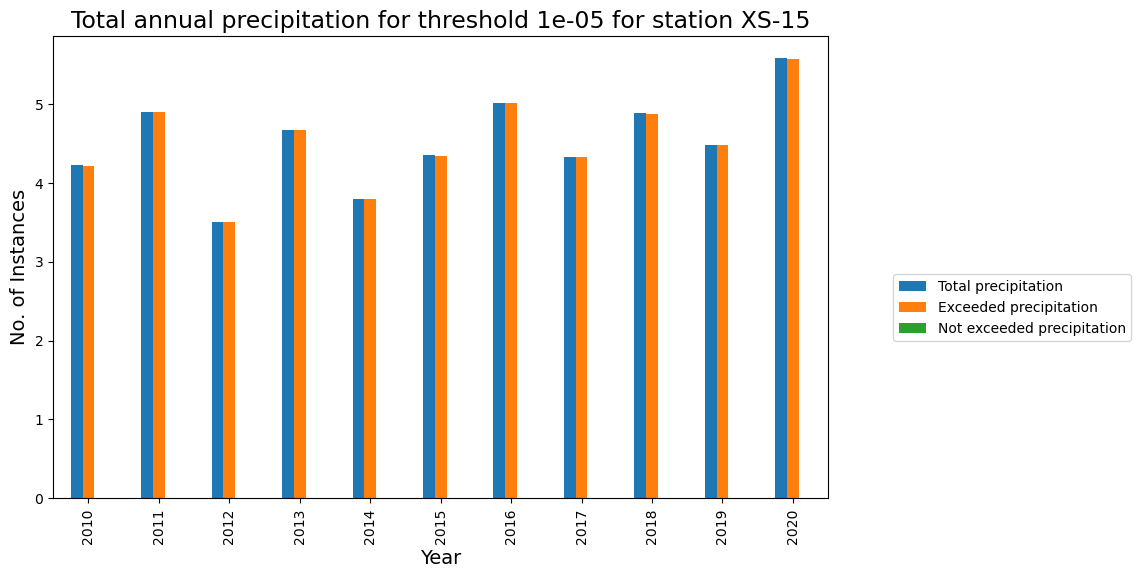

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


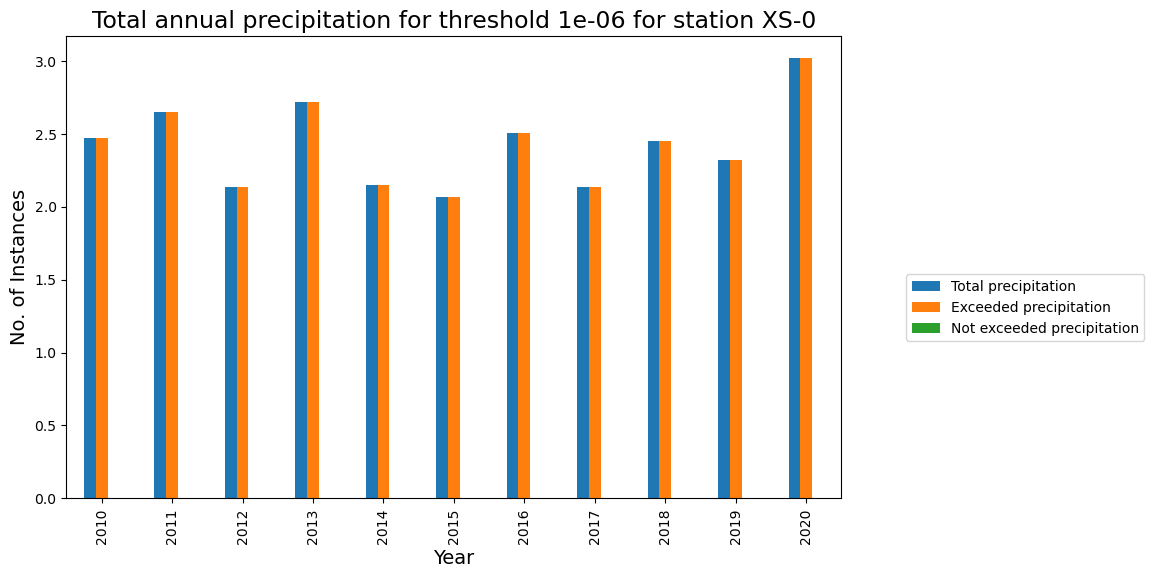

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


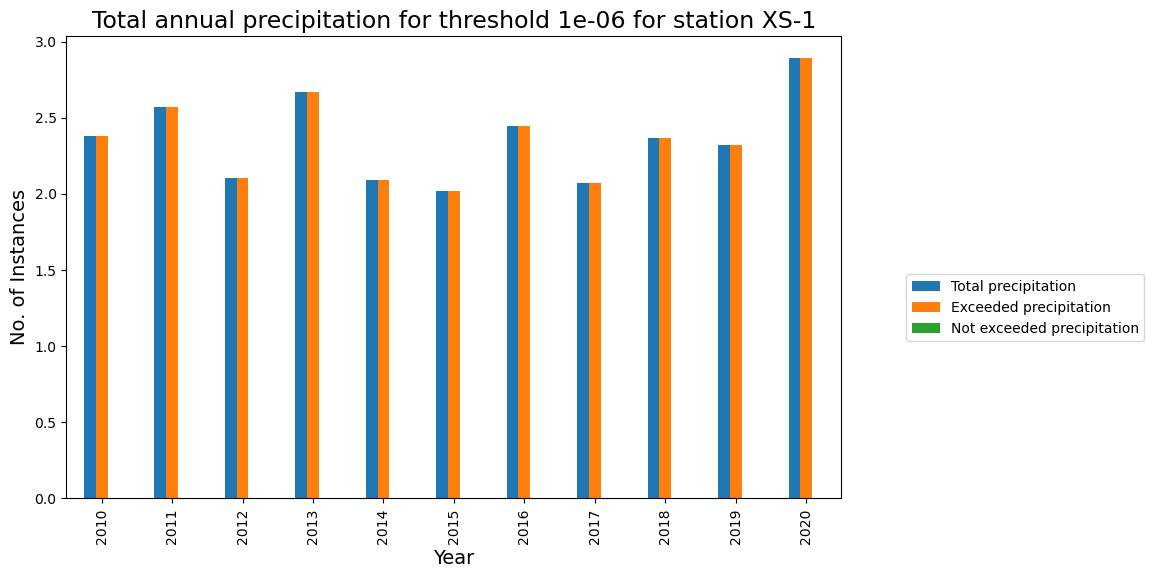

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


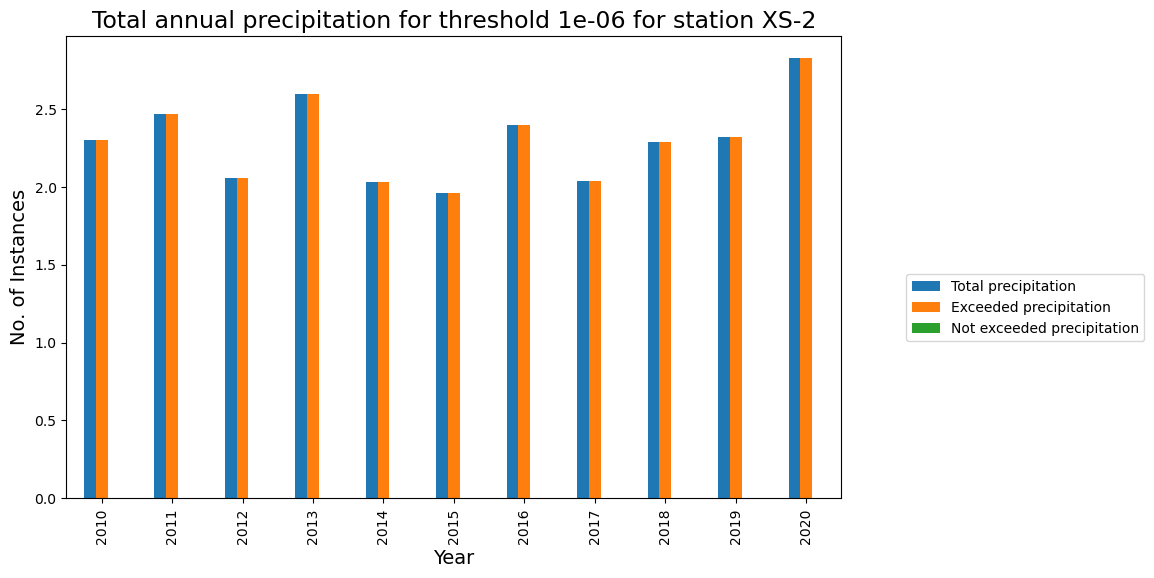

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


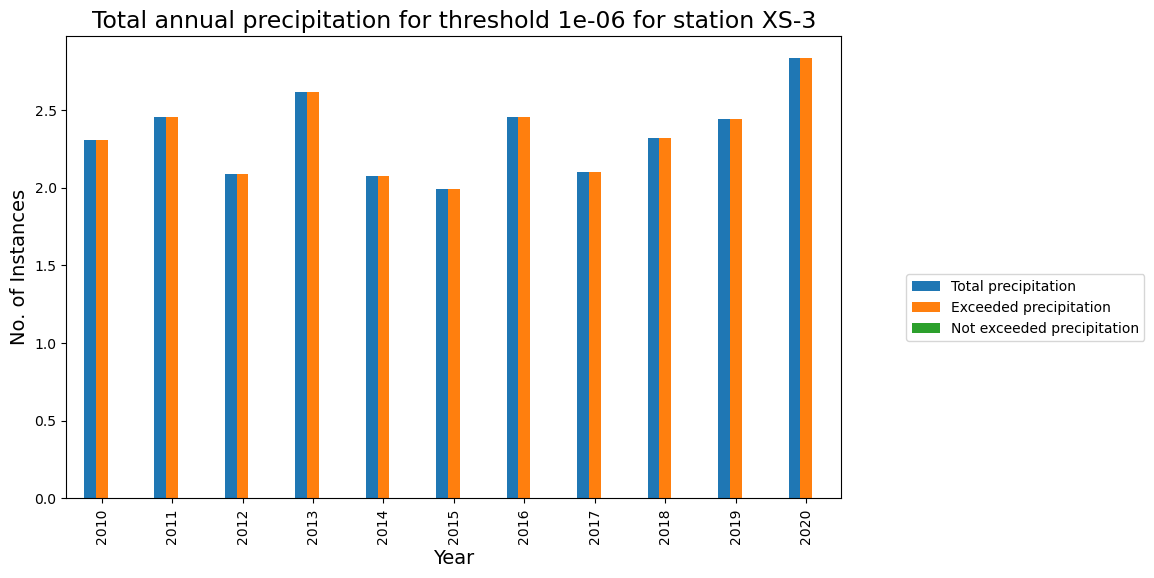

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


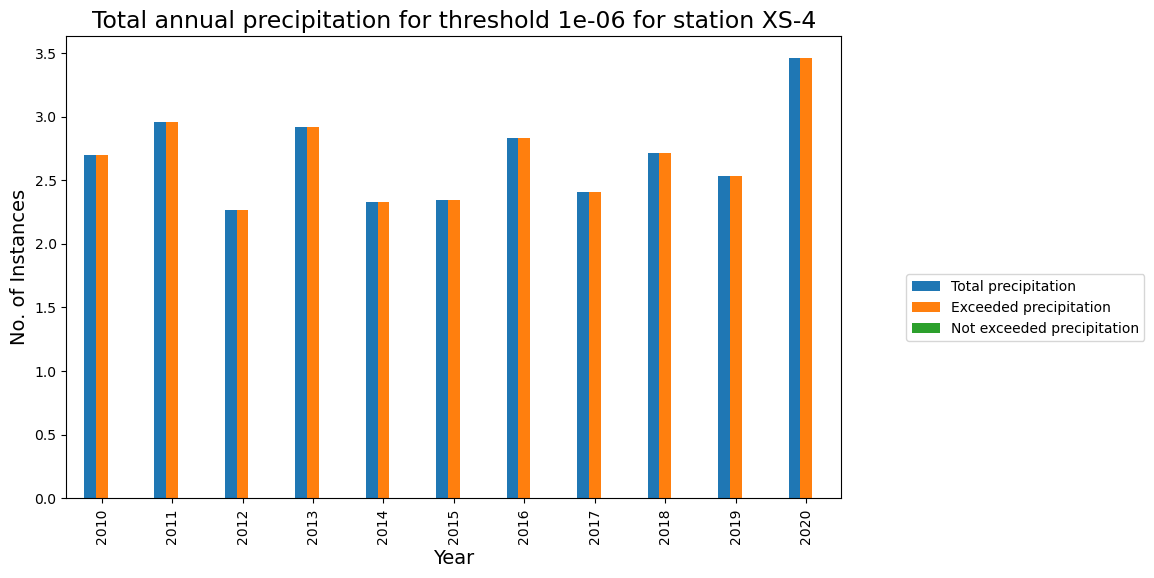

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


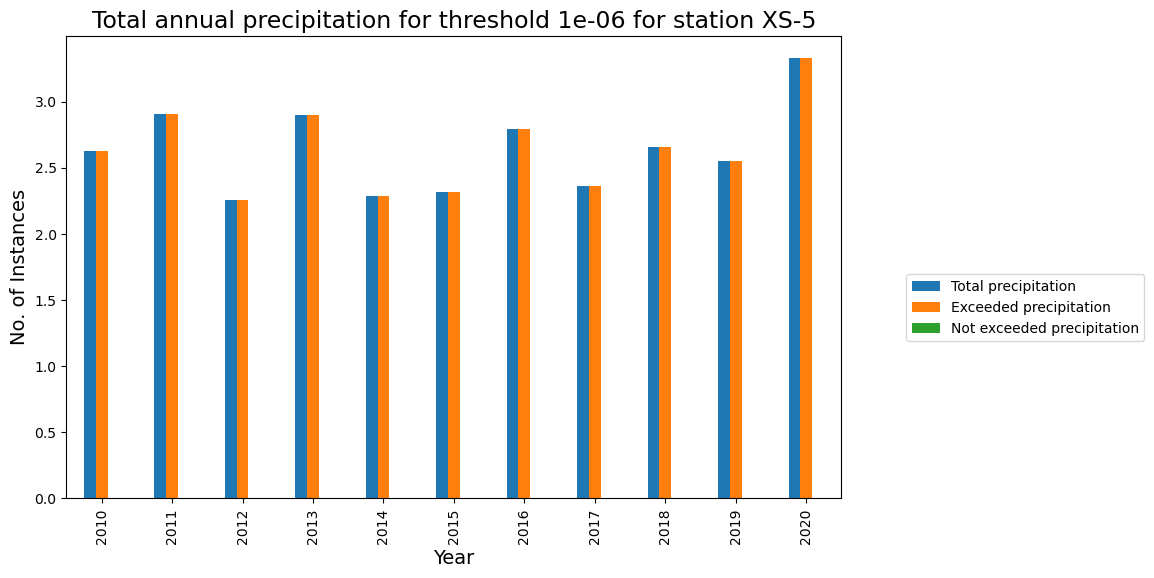

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


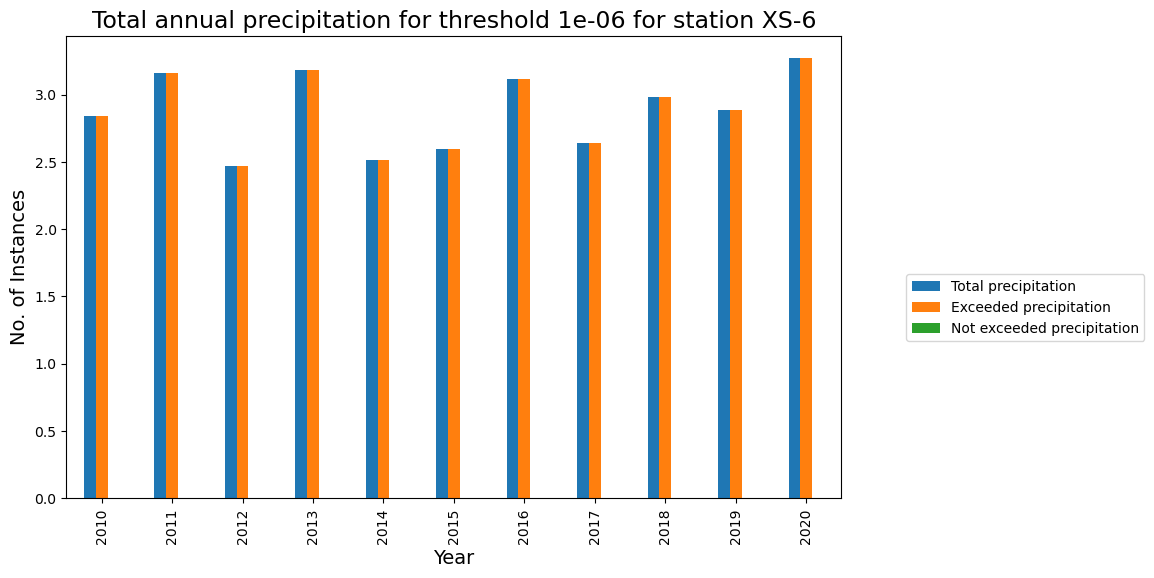

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


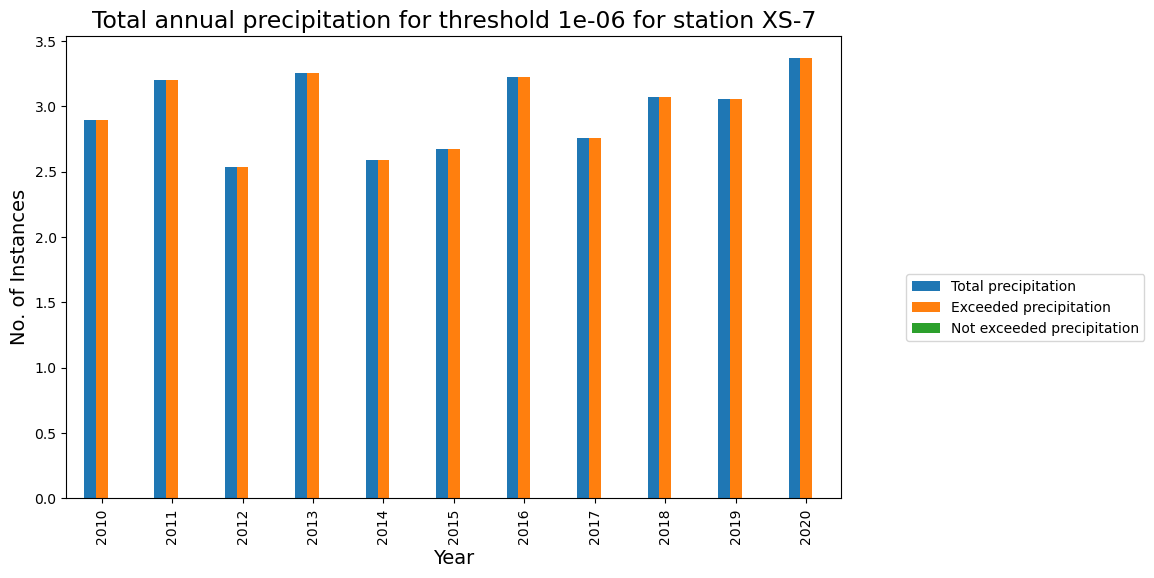

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


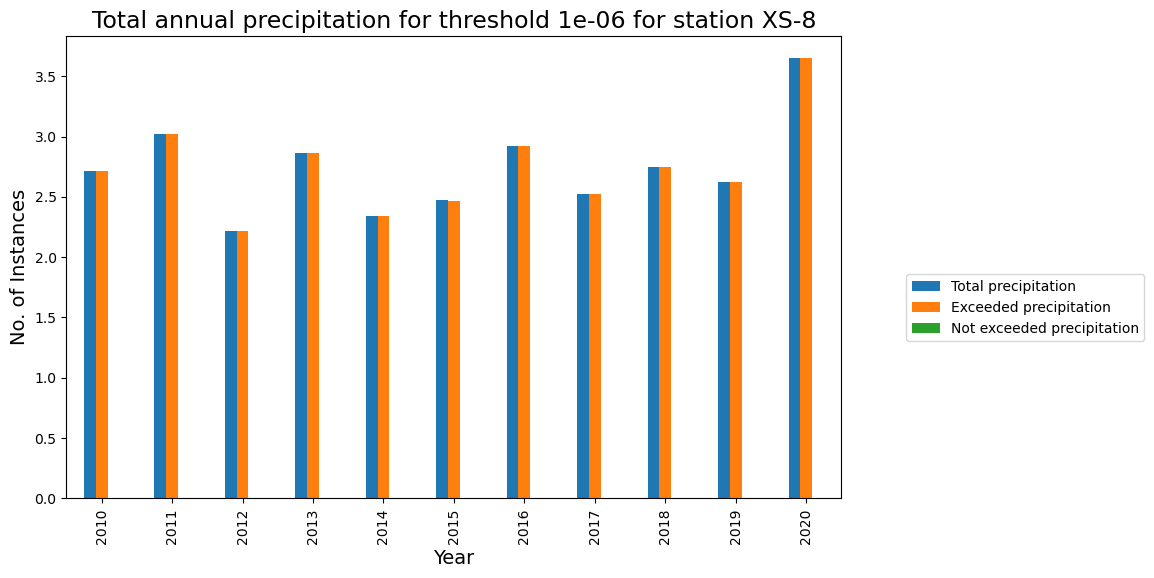

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


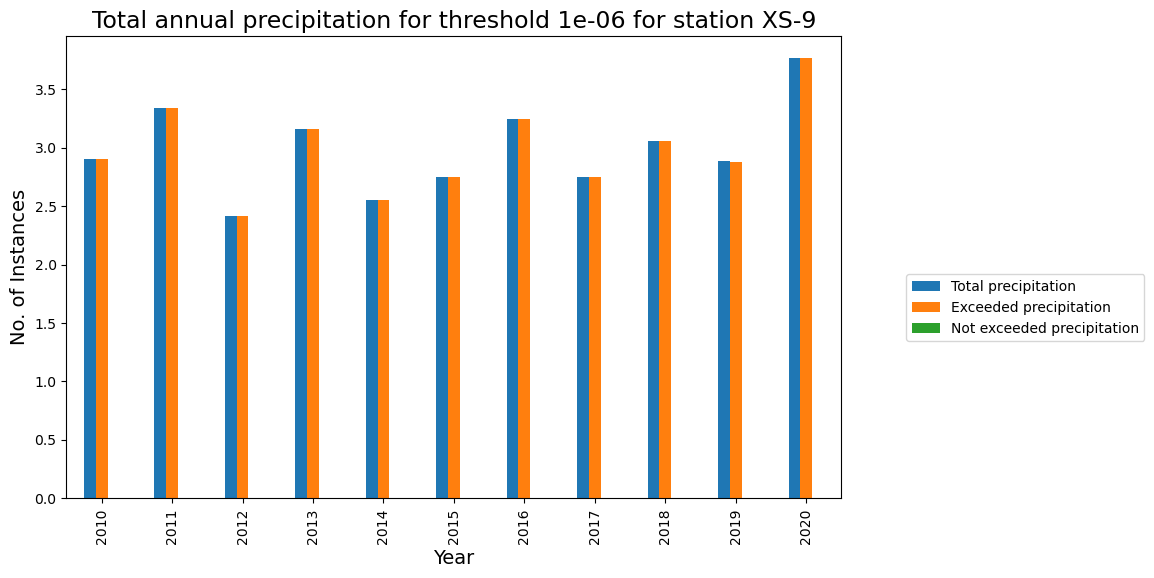

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


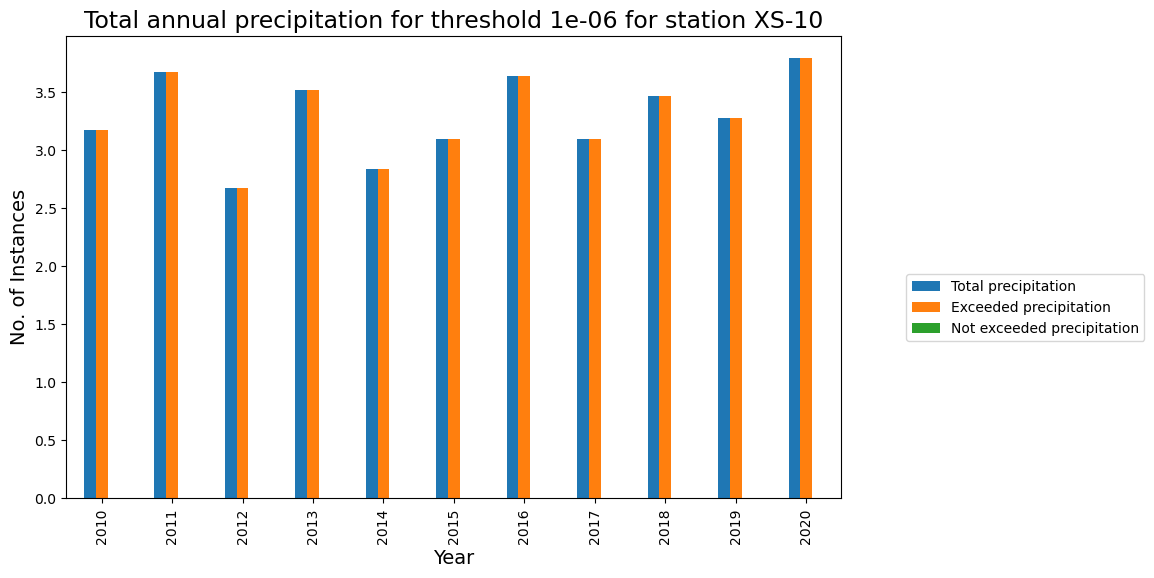

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


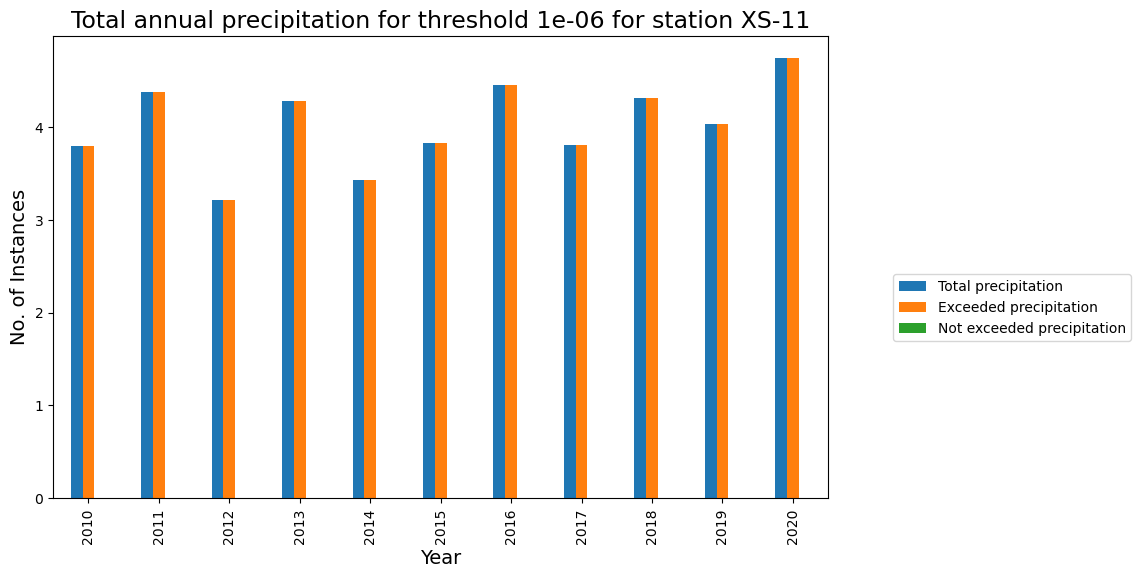

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


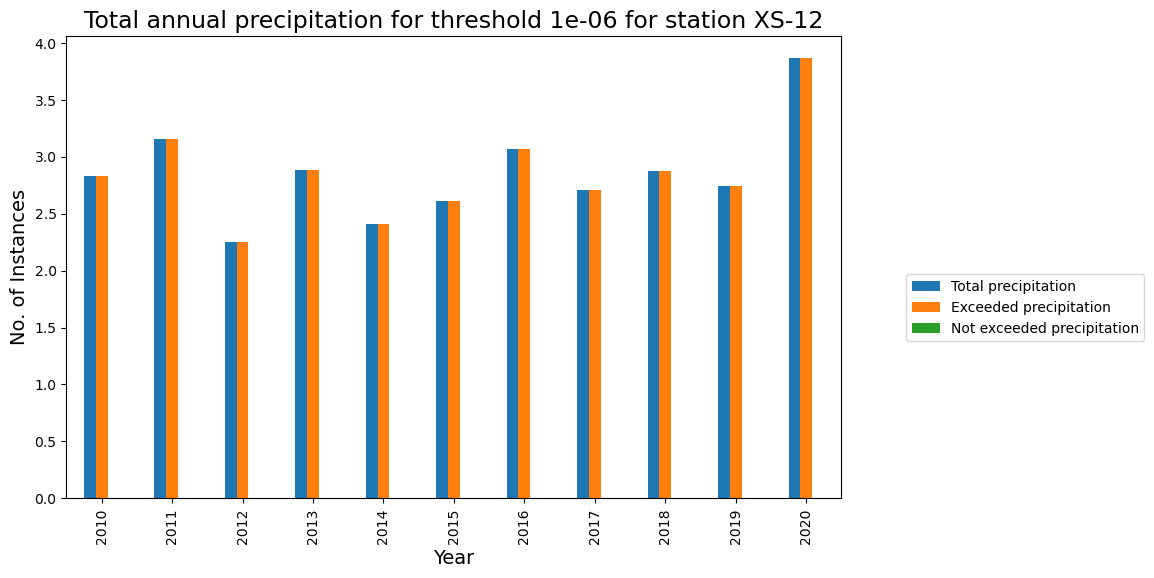

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


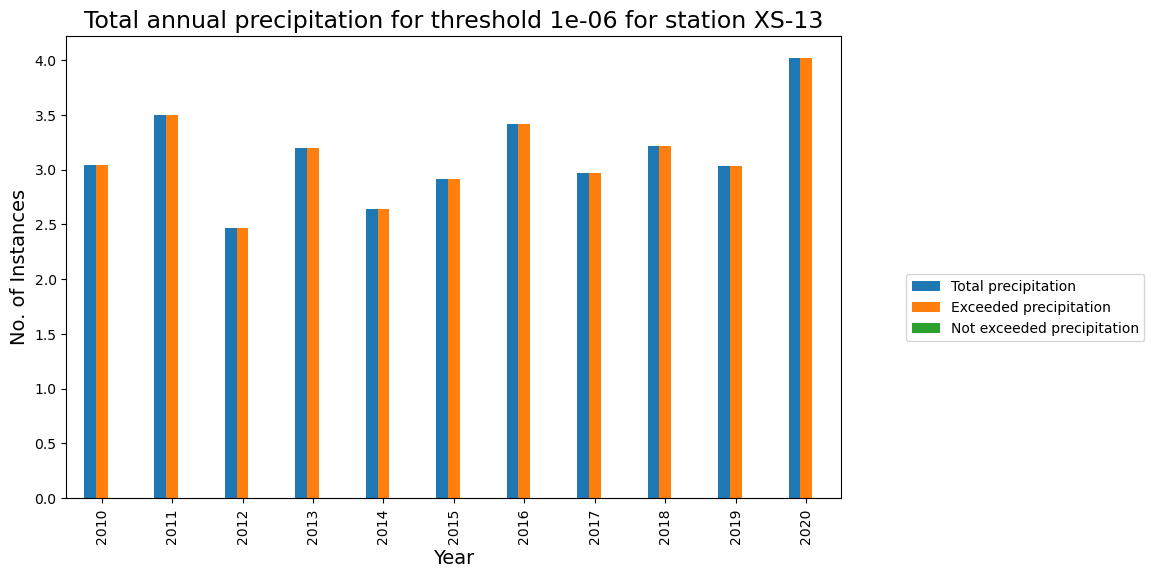

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


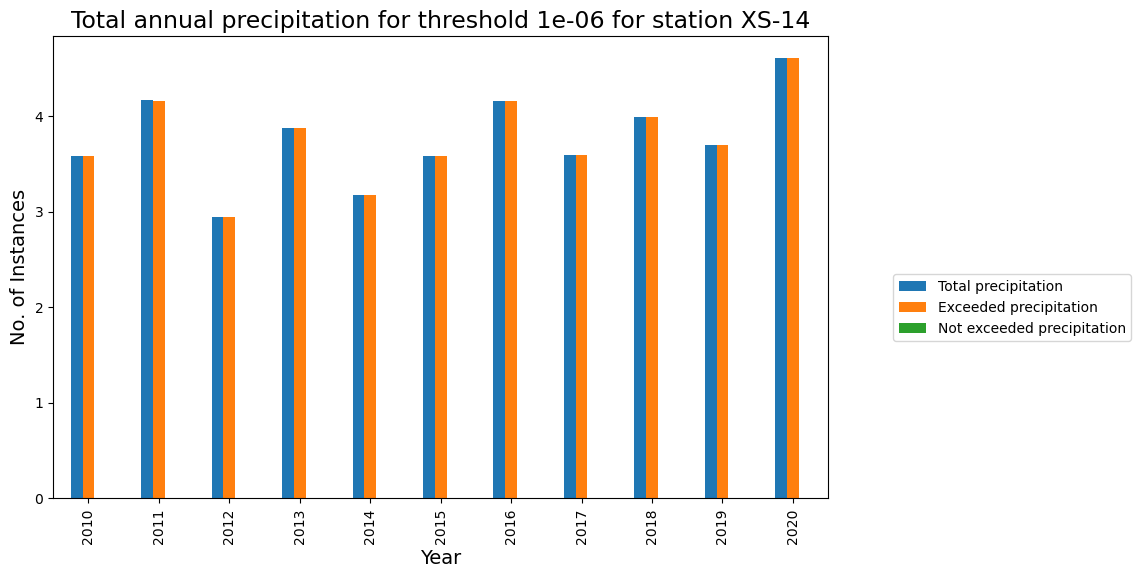

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


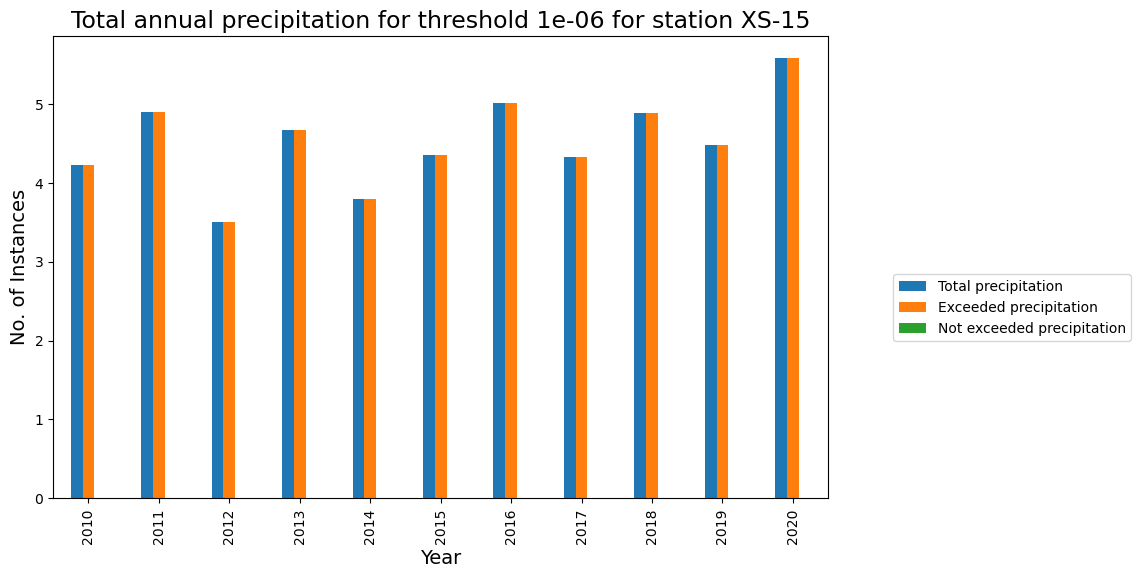

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


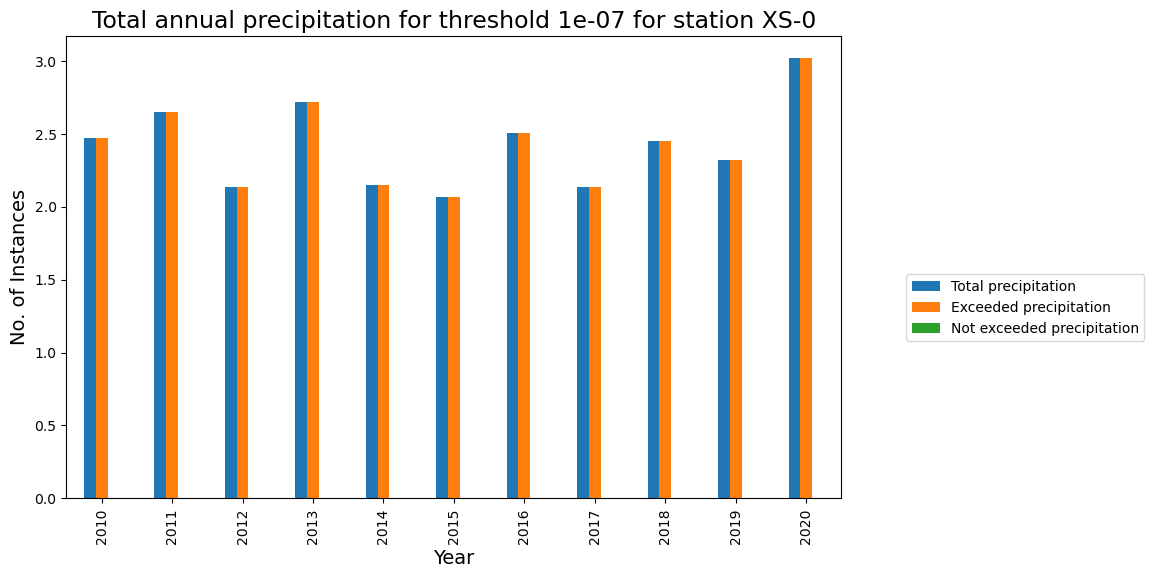

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


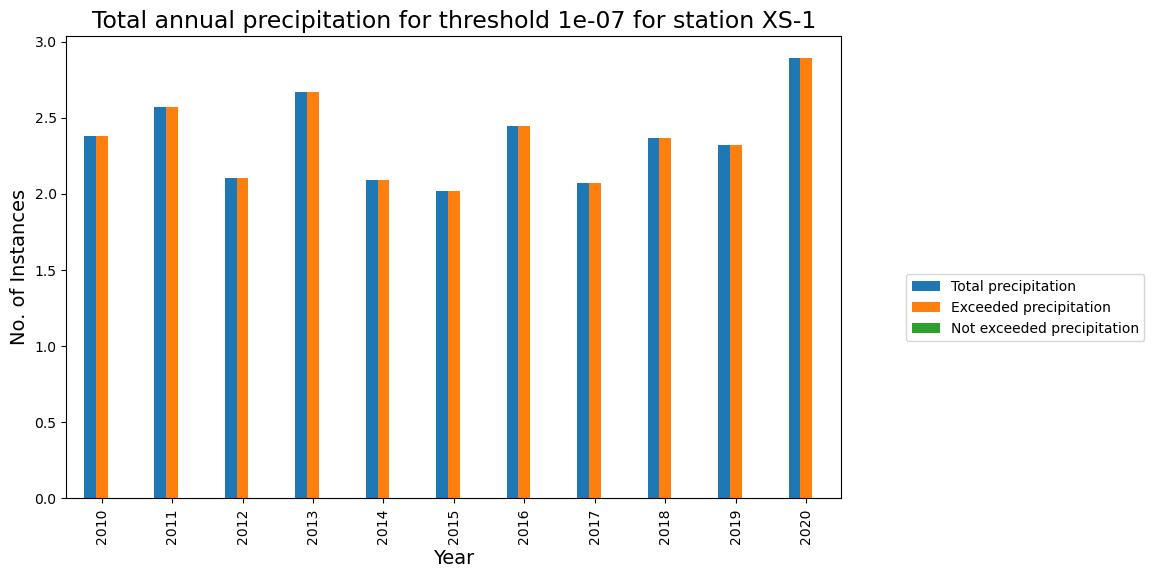

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


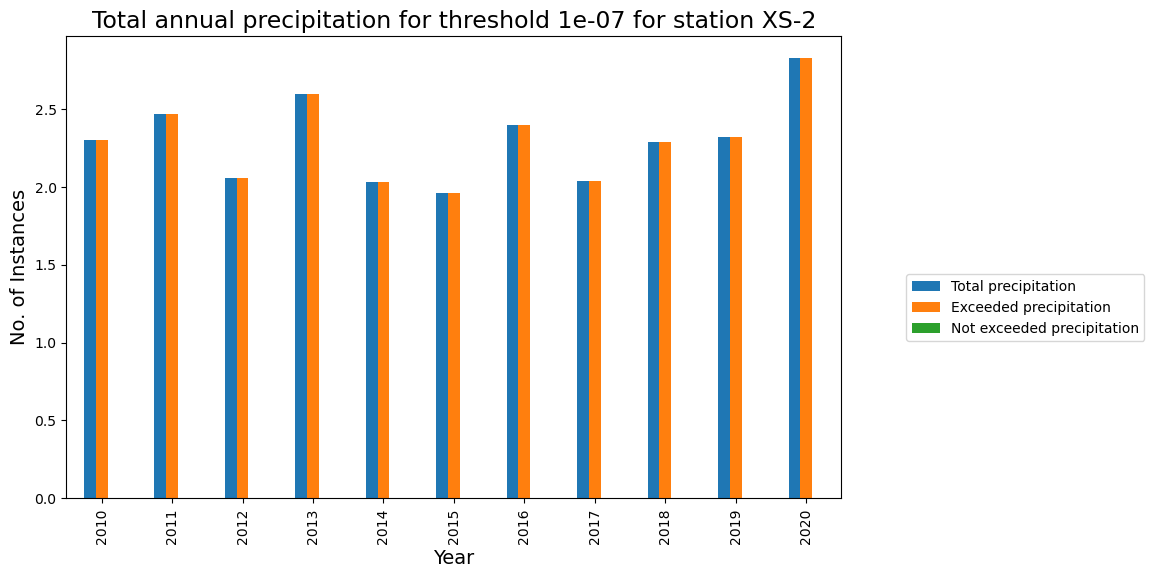

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


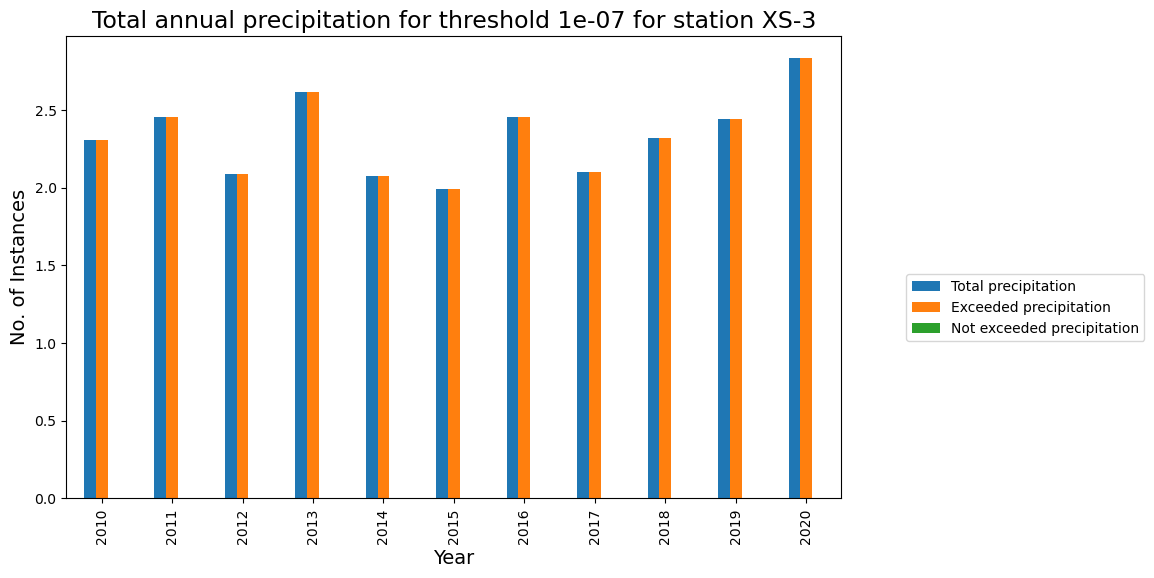

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


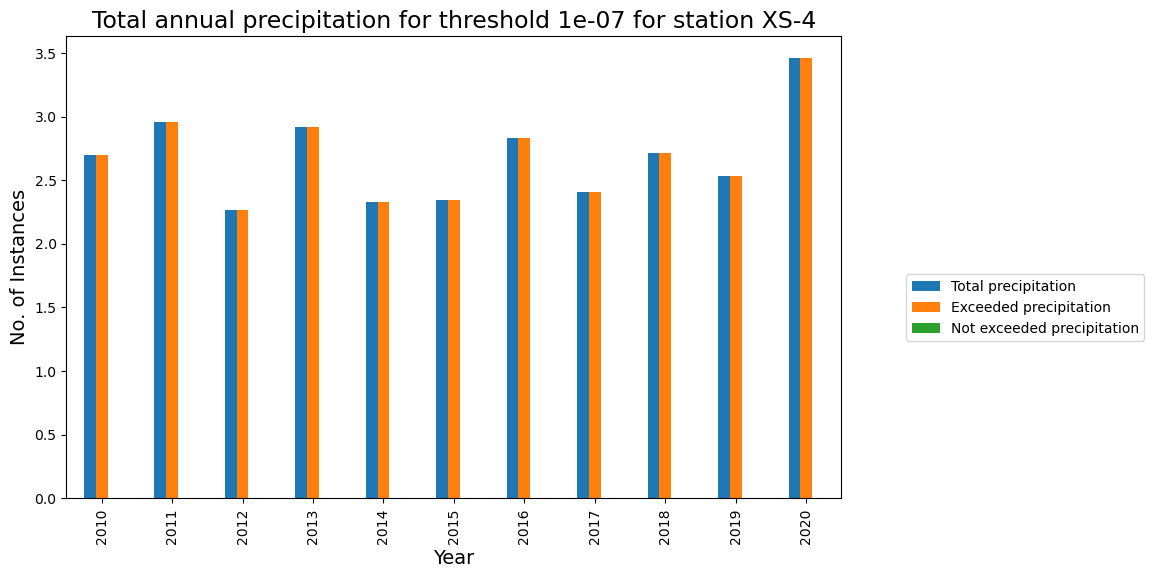

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


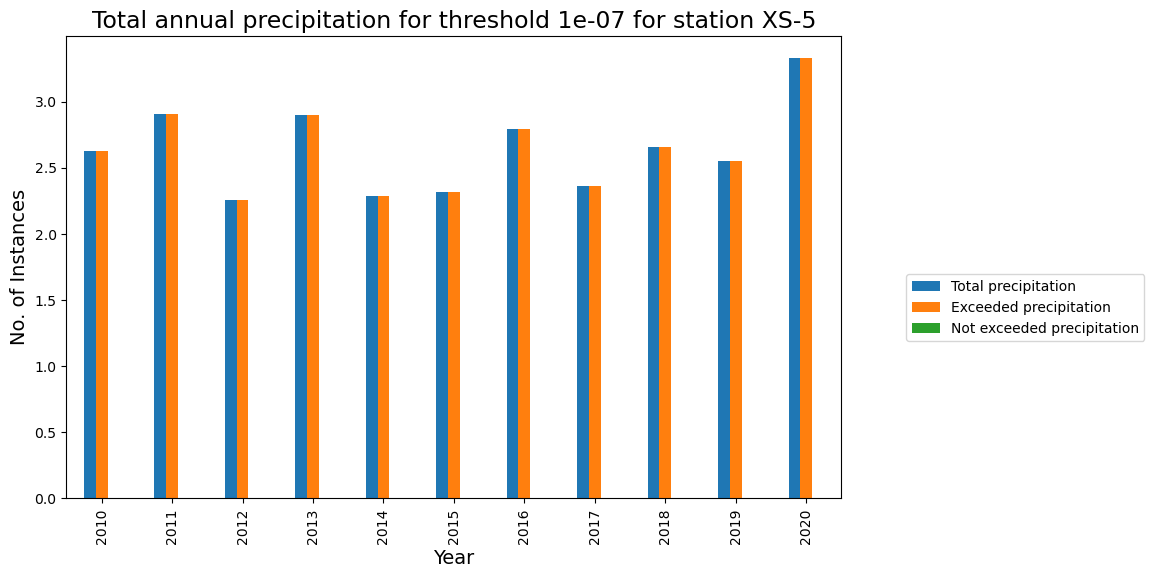

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


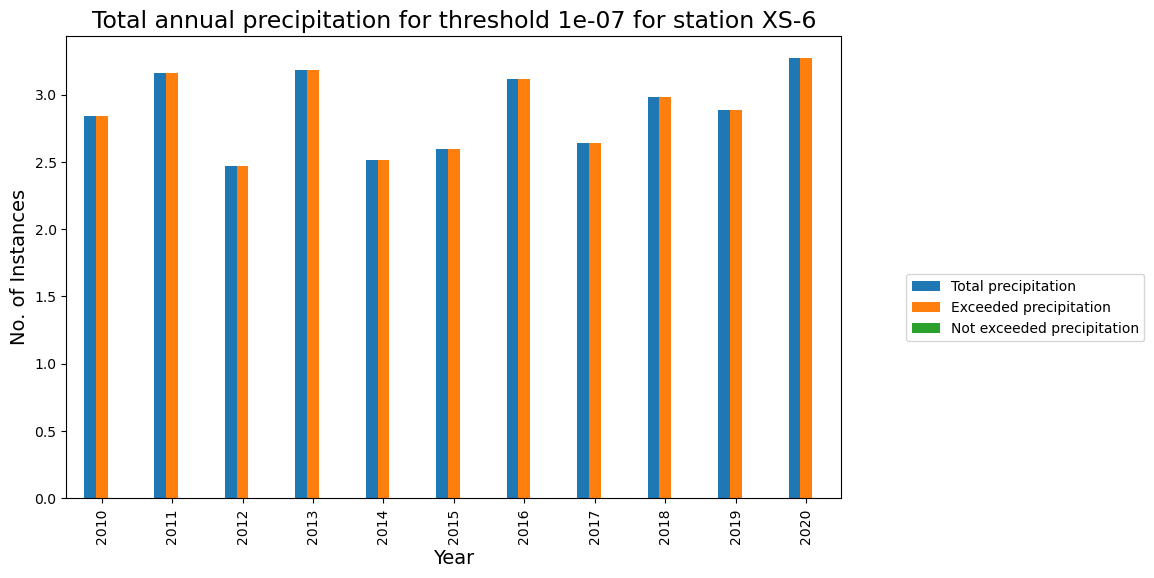

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


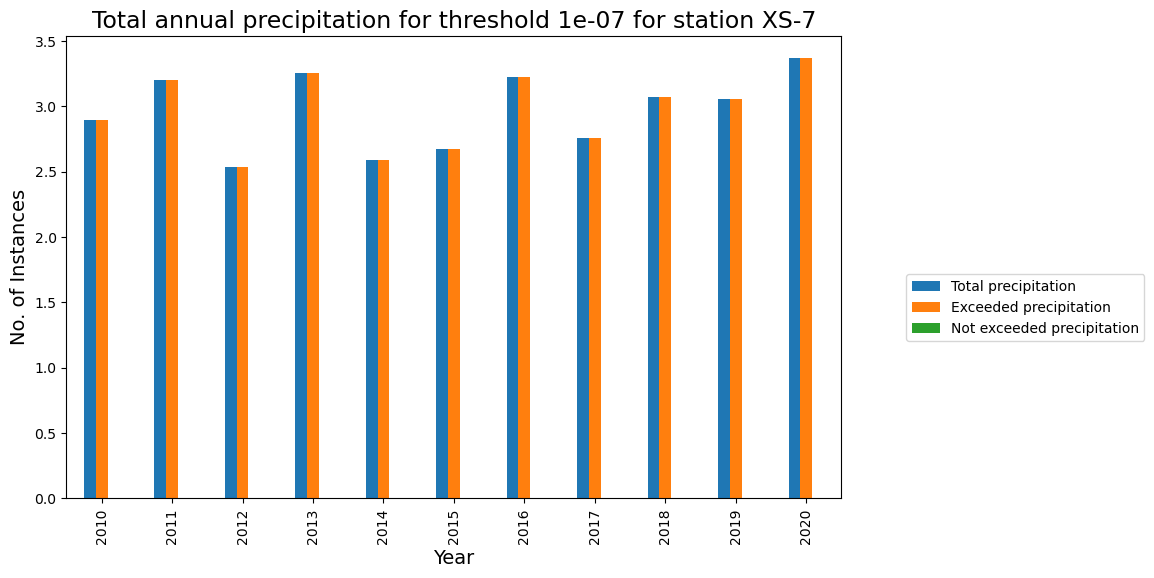

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


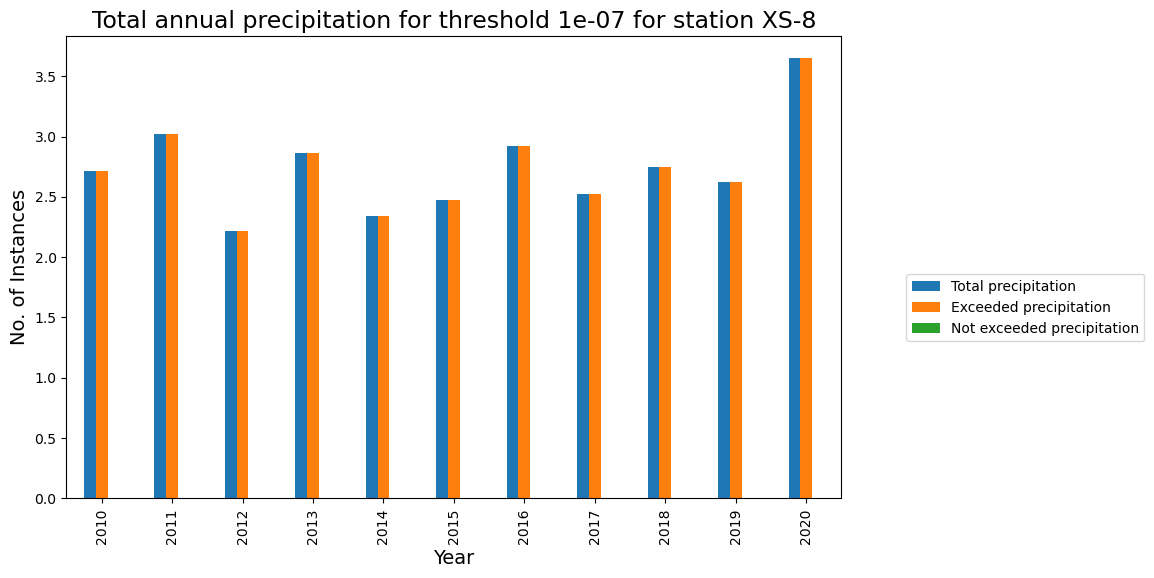

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


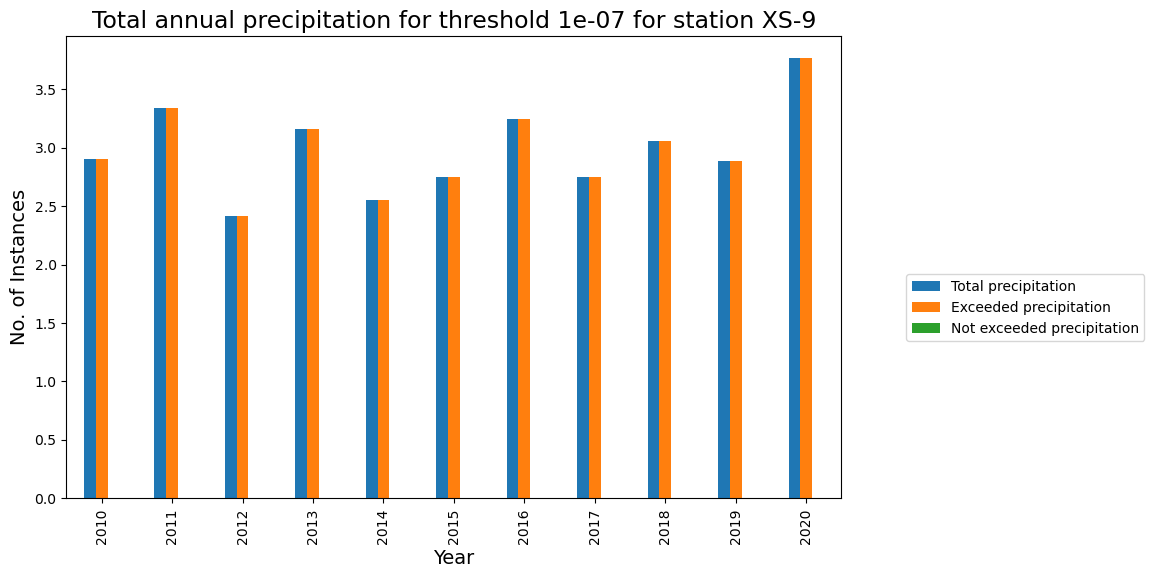

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


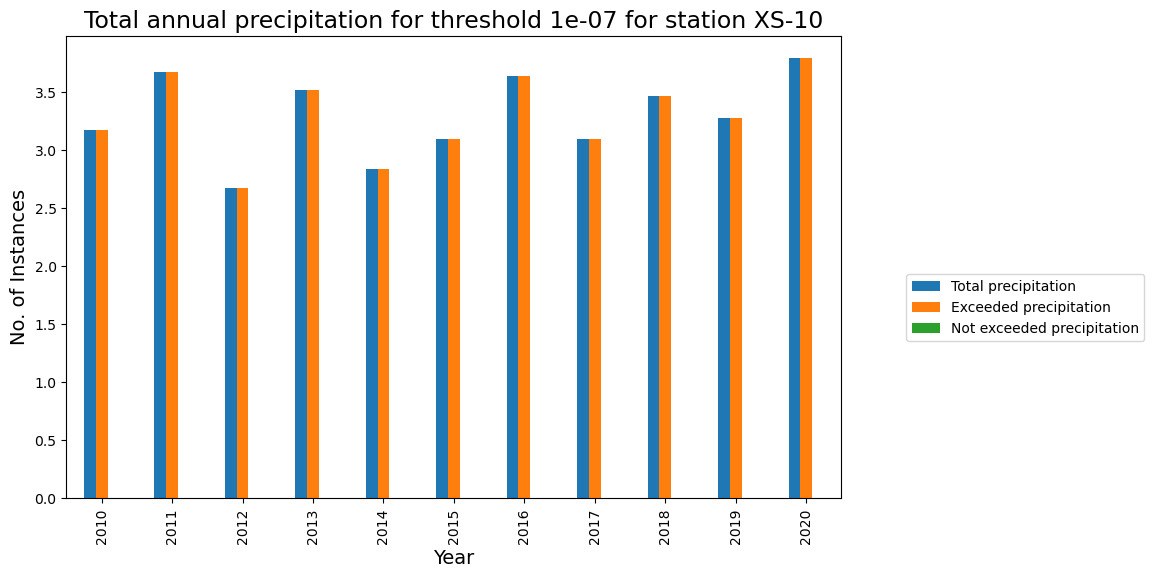

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


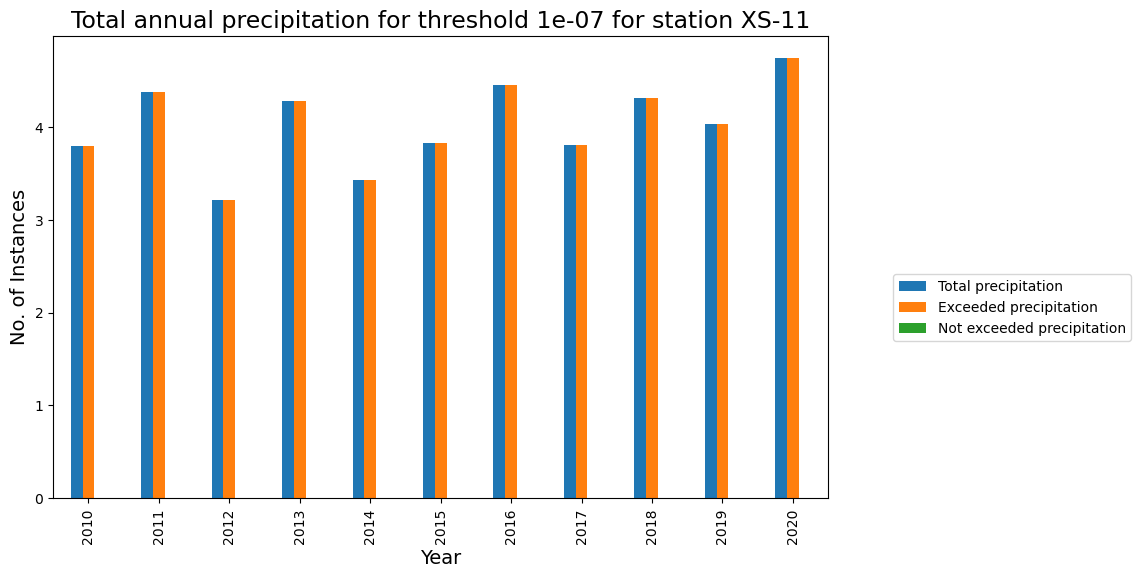

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


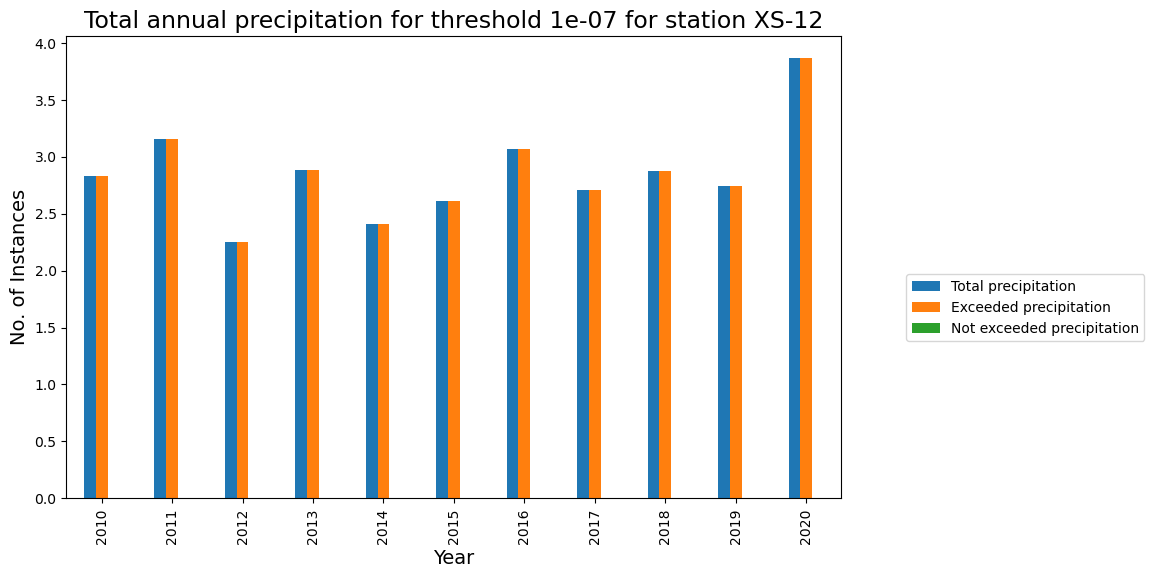

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


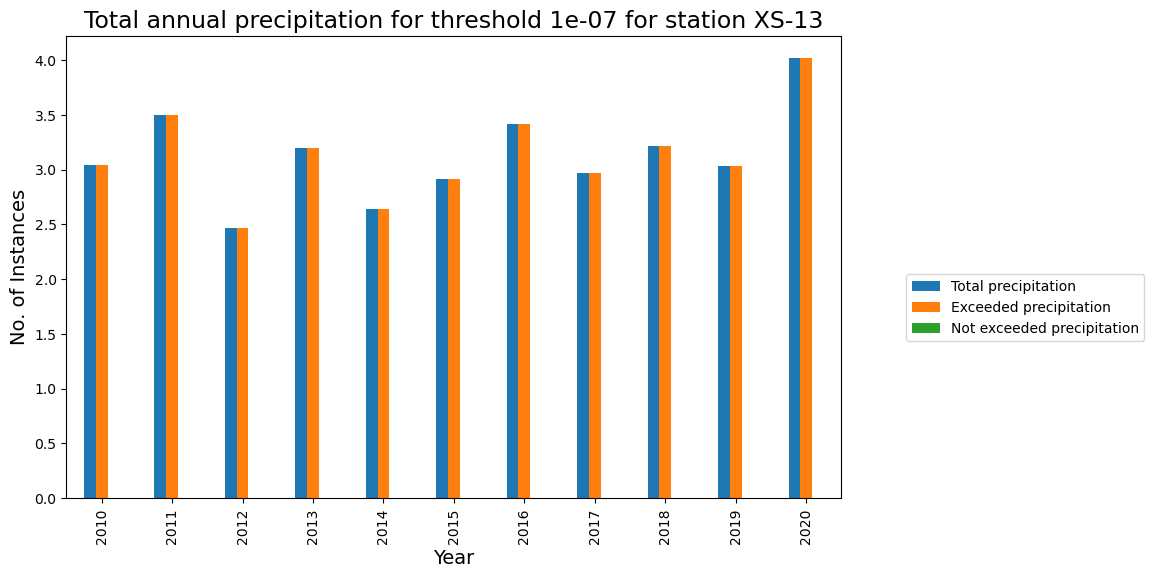

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


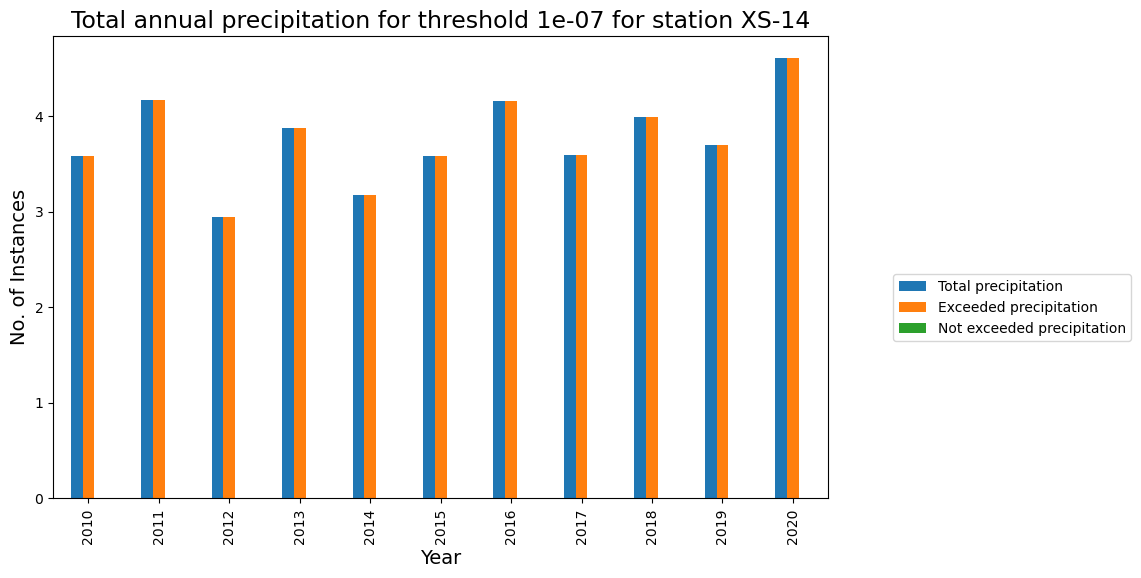

C:\Users\ACER\AppData\Local\Temp\ipykernel_11512\510476385.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)


In [ ]:
#ADD path where you want to store your plots
work_dir = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/Output plots'
os.chdir(work_dir)
df_yr = [2010,2011,2012,2013,2014,2015,2016, 2017, 2018, 2019, 2020]
Nsta = df_Psta.columns.to_list()
#Psta_summary.set_index('Year', inplace=True)
for t1 in thres:
    for sta in Nsta[2: len(Nsta)]:
        filt_df = Psta_summary[(Psta_summary['Station']==sta) & (Psta_summary['Threshold']==t1)]
        filt_df.drop(columns = ['Threshold', 'Station', 'Total precipitation', 'Exceeded precipitation', 'Not exceeded precipitation'], inplace=True)
        #display(filt_df)
        filt_df.plot(kind='bar', x='Year')
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('No. of Instances', fontsize=14)
        title='No of times for exceedence for threshold '+str(t1)+' for station ' + sta
        plt.legend(bbox_to_anchor=(1.25,0.5),loc='upper right')
        plt.title(title, fontsize=17)
        fname = 'Exceedence'+str(t1)+sta+'.jpg'
        plt.gcf().set_size_inches(10,6)
        plt.savefig(fname, bbox_inches='tight')
        plt.show()

for t1 in thres:
    for sta in Nsta[2: len(Nsta)]:
        filt_df = Psta_summary[(Psta_summary['Station']==sta) & (Psta_summary['Threshold']==t1)]
        filt_df.drop(columns = ['Threshold', 'Station', 'Time exceeded', 'Time not exceeded'], inplace=True)
        #display(filt_df)
        filt_df.plot(kind='bar', x='Year')
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('No. of Instances', fontsize=14)
        title='Total annual precipitation for threshold '+str(t1)+' for station ' + sta
        plt.legend(bbox_to_anchor=(1.4,0.5),loc='upper right')
        plt.title(title, fontsize=17)
        fname = 'tot_tainfall'+str(t1)+sta+'.jpg'
        plt.gcf().set_size_inches(10,6)
        plt.savefig(fname, bbox_inches='tight')
        plt.show()

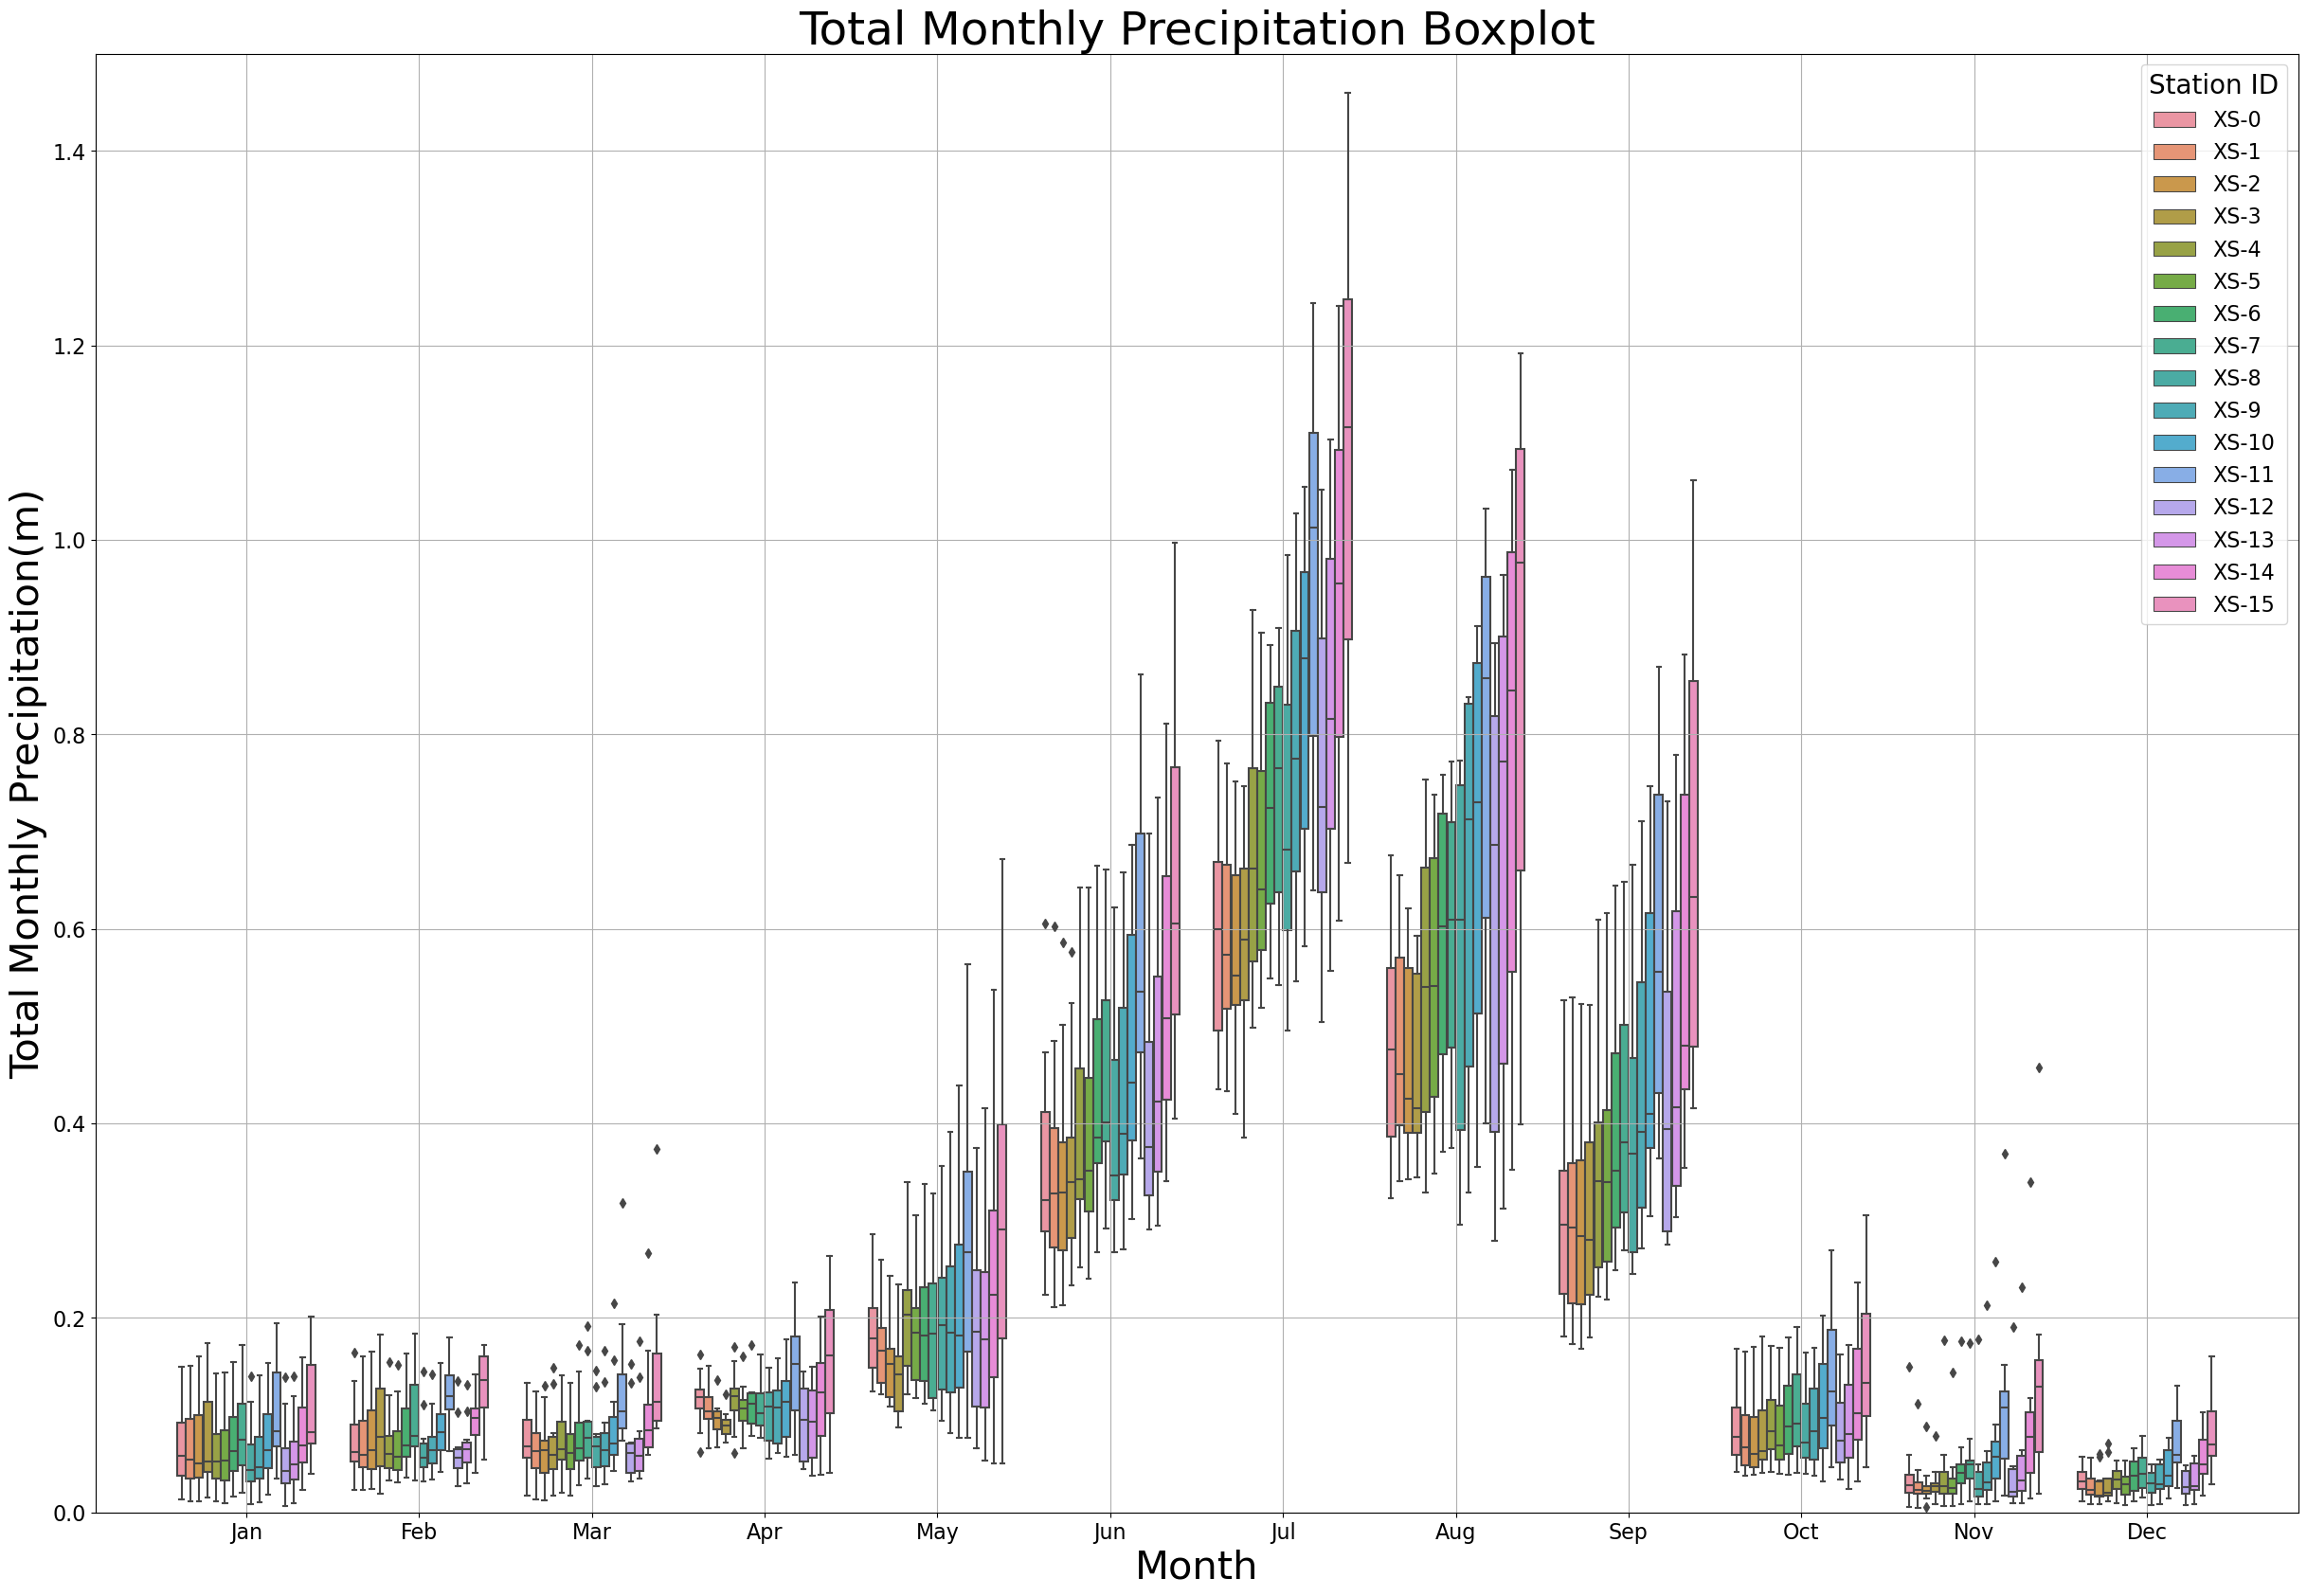

In [26]:
#Add the directory where you have added the jupyter notebook
work_dir = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/'
os.chdir(work_dir)
df_precip = pd.read_csv('final_tp_station_land.csv')
#display(df_precip)
df_precip['Date']=pd.to_datetime(df_precip['Date'])
#df_precip['Hour']=pd.to_datetime(df_precip['Hour'])
df_precip["Datetime"] = df_precip['Date'] + pd.to_timedelta(df_precip['Hour'], unit='h')
df_precip = df_precip.drop(['Date', 'Hour'], axis=1)
df_precip.set_index('Datetime', inplace=True)

df_precip_month = df_precip.resample('M').sum()
df_precip_month = df_precip_month.reset_index()
#df_precip_month['Year'] = df_precip_month['Datetime'].dt.year
#df_precip_month['Month'] = df_precip_month['Datetime'].dt.month
df_precip_month = df_precip_month.drop(['Datetime',], axis=1)
#display(df_precip_month)
col_name = df_precip_month.columns
#print(col_name)
month = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
len1 = df_precip_month.shape[0]
arr_precip = df_precip_month.values.flatten()
#print(arr_precip)
df_plot = pd.DataFrame(arr_precip, columns=['Precipitation'])
rp_arr1 = np.tile(col_name, len1)
df_plot['Station'] = rp_arr1
rp_arr2 = np.concatenate([np.repeat(x, 16) for x in month])
rp_arr3 = np.tile(rp_arr2, 11)
df_plot['Month']=rp_arr3
#display(df_plot)

import seaborn as sns
#plot = df_precip_month.boxplot(column=['XS-0', 'XS-1', 'XS-2', 'XS-3', 'XS-4', 'XS-5', 'XS-6', 'XS-7', 'XS-8', 'XS-9', 'XS-10', 'XS-11', 'XS-12','XS-13', 'XS-14', 'XS-15'], by=['Month'], figsize=(10,15))
#plot.set_xlabel('Year')
#plot.set_ylabel('Values')
#plot.set_title('Box plot')
plt.figure(figsize = (30,20))
ax=sns.boxplot(x='Month', y='Precipitation', hue='Station', data=df_plot, dodge=0.5)
ax.set_ylim(0,1.5)
plt.margins(x=0.1, y=0.1)
plt.xlabel('Month', fontsize = 30)
plt.ylabel('Total Monthly Precipitation(m)', fontsize = 30)
plt.title('Total Monthly Precipitation Boxplot', fontsize = 35)
plt.legend(title='Station ID', fontsize=16, title_fontsize='20')
plt.xticks(fontsize=16)  # Increase font size and font weight for x-axis tick labels
plt.yticks(fontsize=16)
ax.grid(True)
plt.savefig('precip_box_plot.jpg', bbox_inches='tight', dpi=600, pad_inches=0.5)
plt.show()

Datetime     Flow  Glacier Flow  Snowfall  Rainfall     Date
0   2010-01-31    73.00      0.057761  0.000494    0.0095   2010-1
1   2010-02-28   264.14      0.057523  0.003423    0.0622   2010-2
2   2010-03-31   800.47      2.837425  0.002247    0.0523   2010-3
3   2010-04-30  1840.33      9.608874  0.002164    0.0642   2010-4
4   2010-05-31  1625.87      8.361374  0.005660    0.1602   2010-5
..         ...      ...           ...       ...       ...      ...
127 2020-08-31  2512.12     15.878370  0.020199    0.6359   2020-8
128 2020-09-30  1661.71     10.474822  0.020401    0.5765   2020-9
129 2020-10-31   902.48      5.646521  0.001340    0.0361  2020-10
130 2020-11-30   130.28      0.739495  0.000753    0.0150  2020-11
131 2020-12-31    22.48      0.054572  0.001094    0.0200  2020-12

[132 rows x 6 columns]

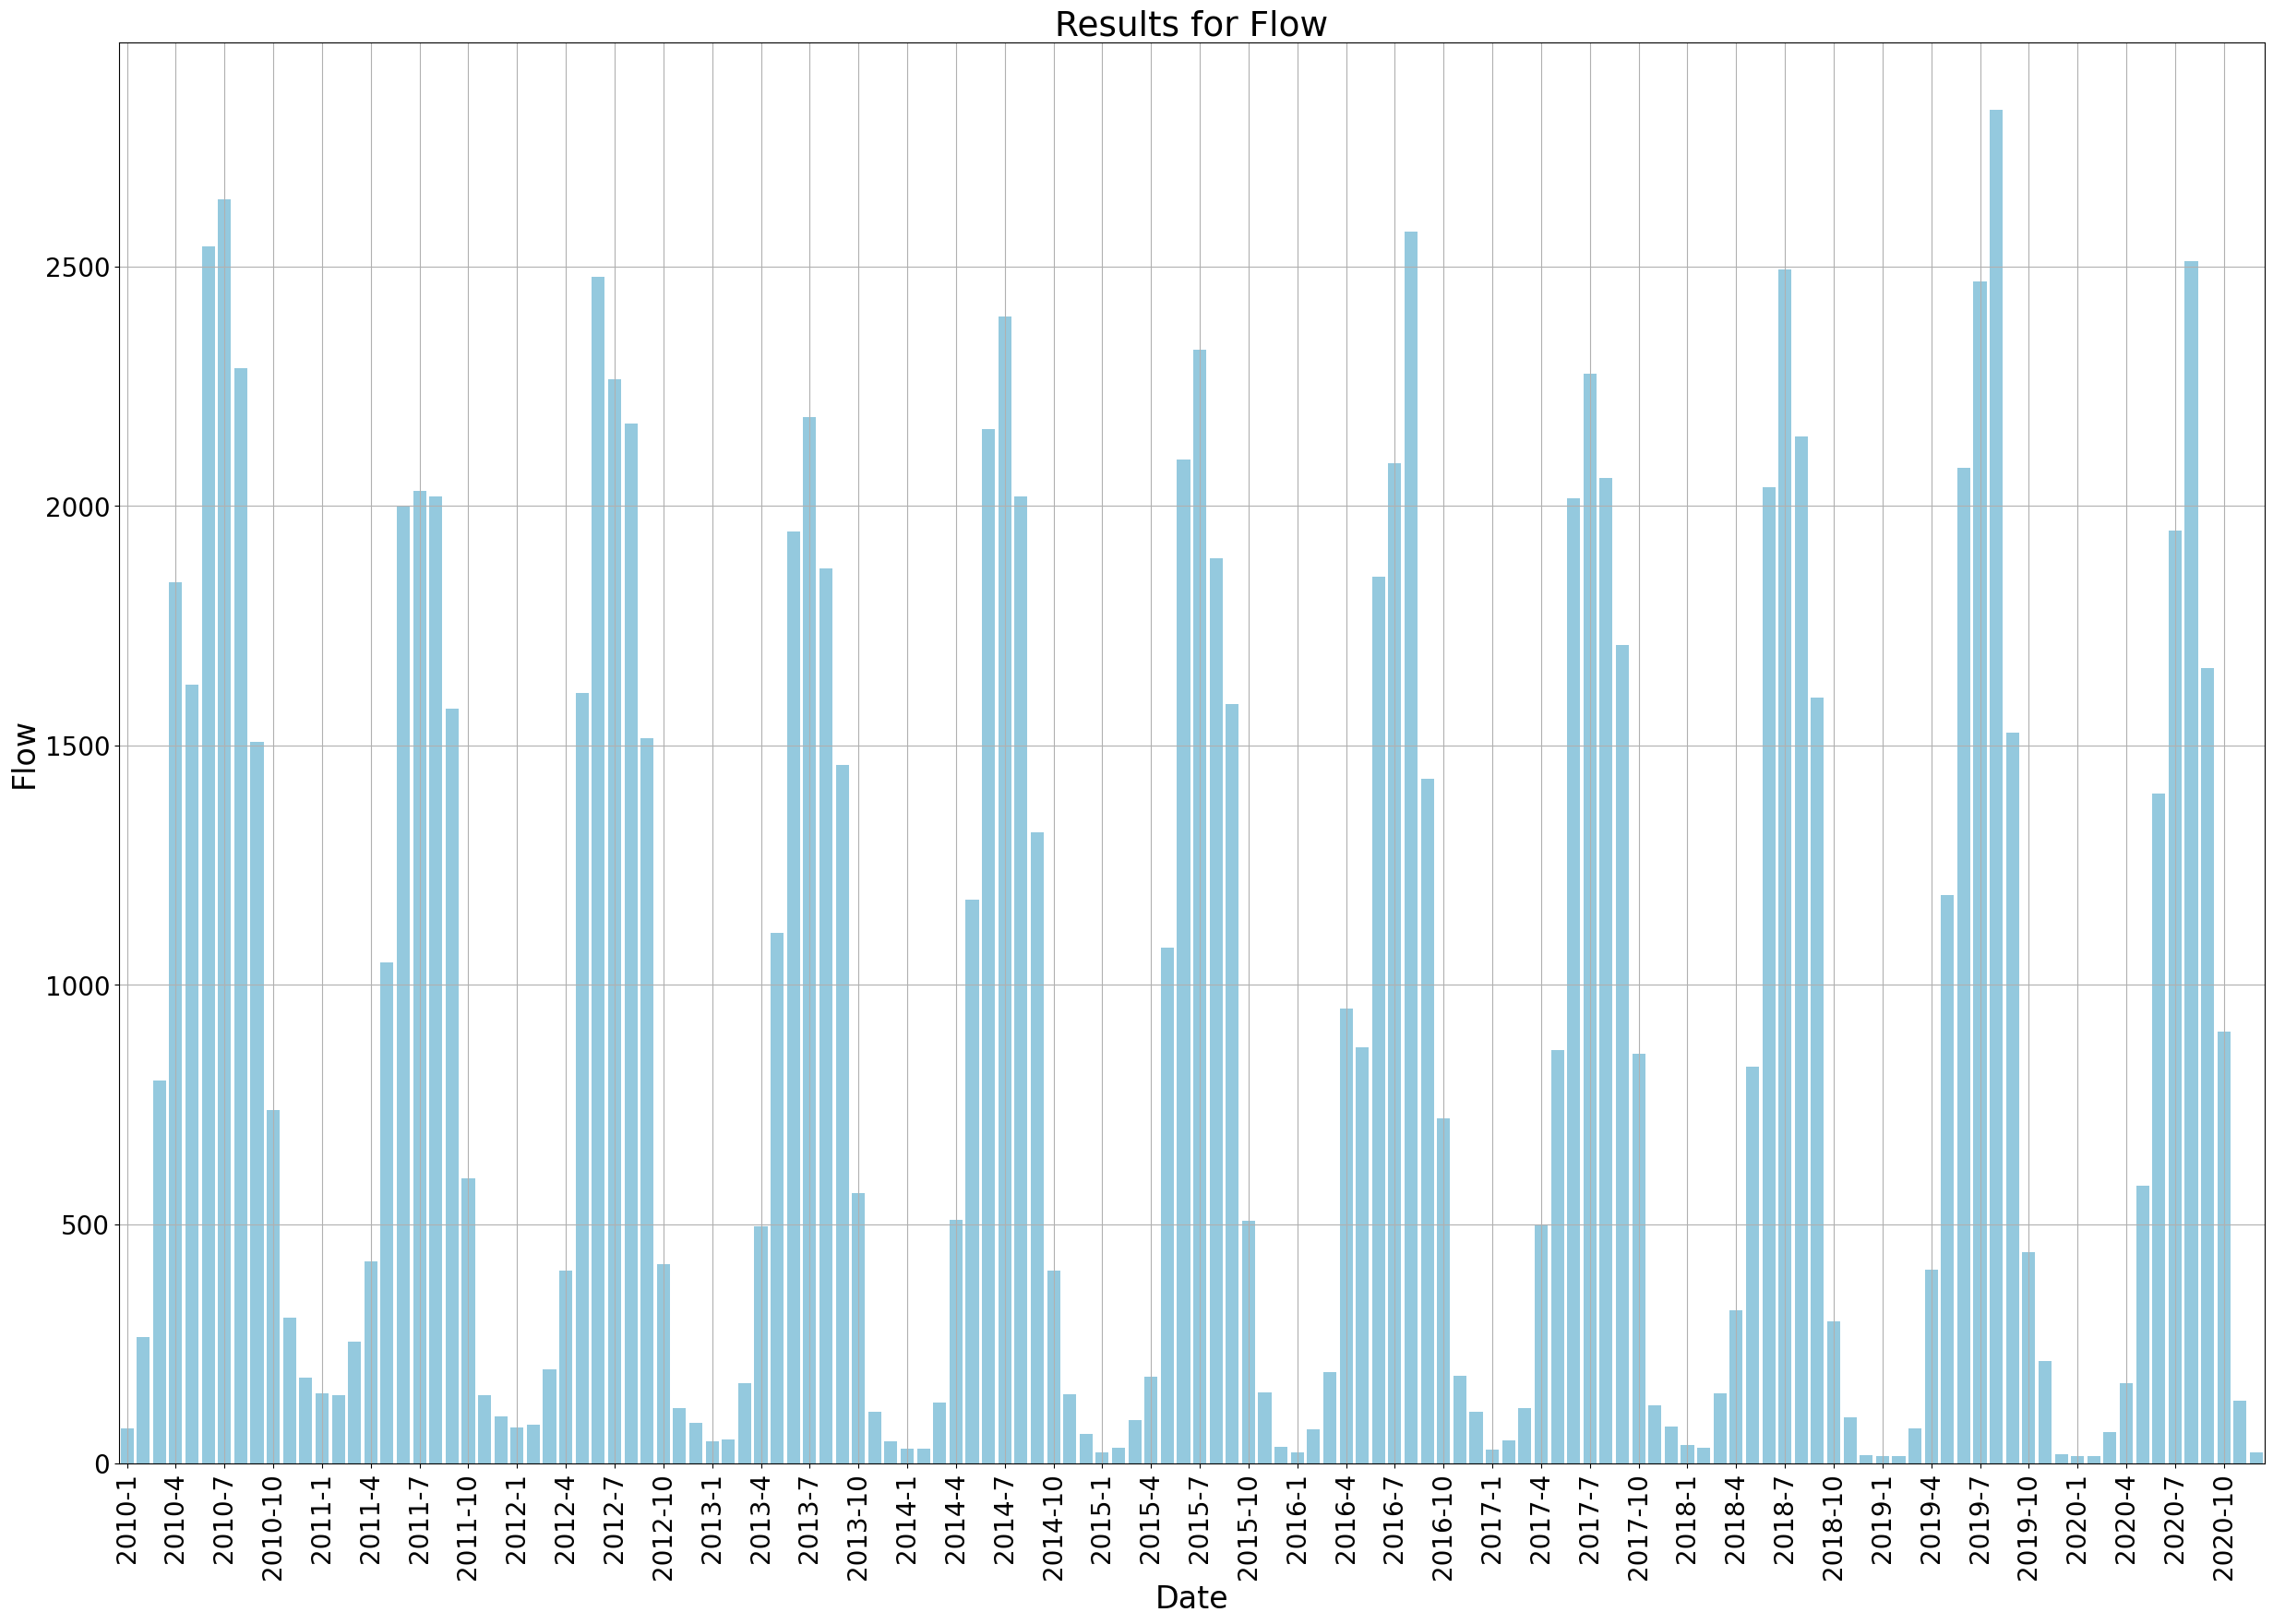

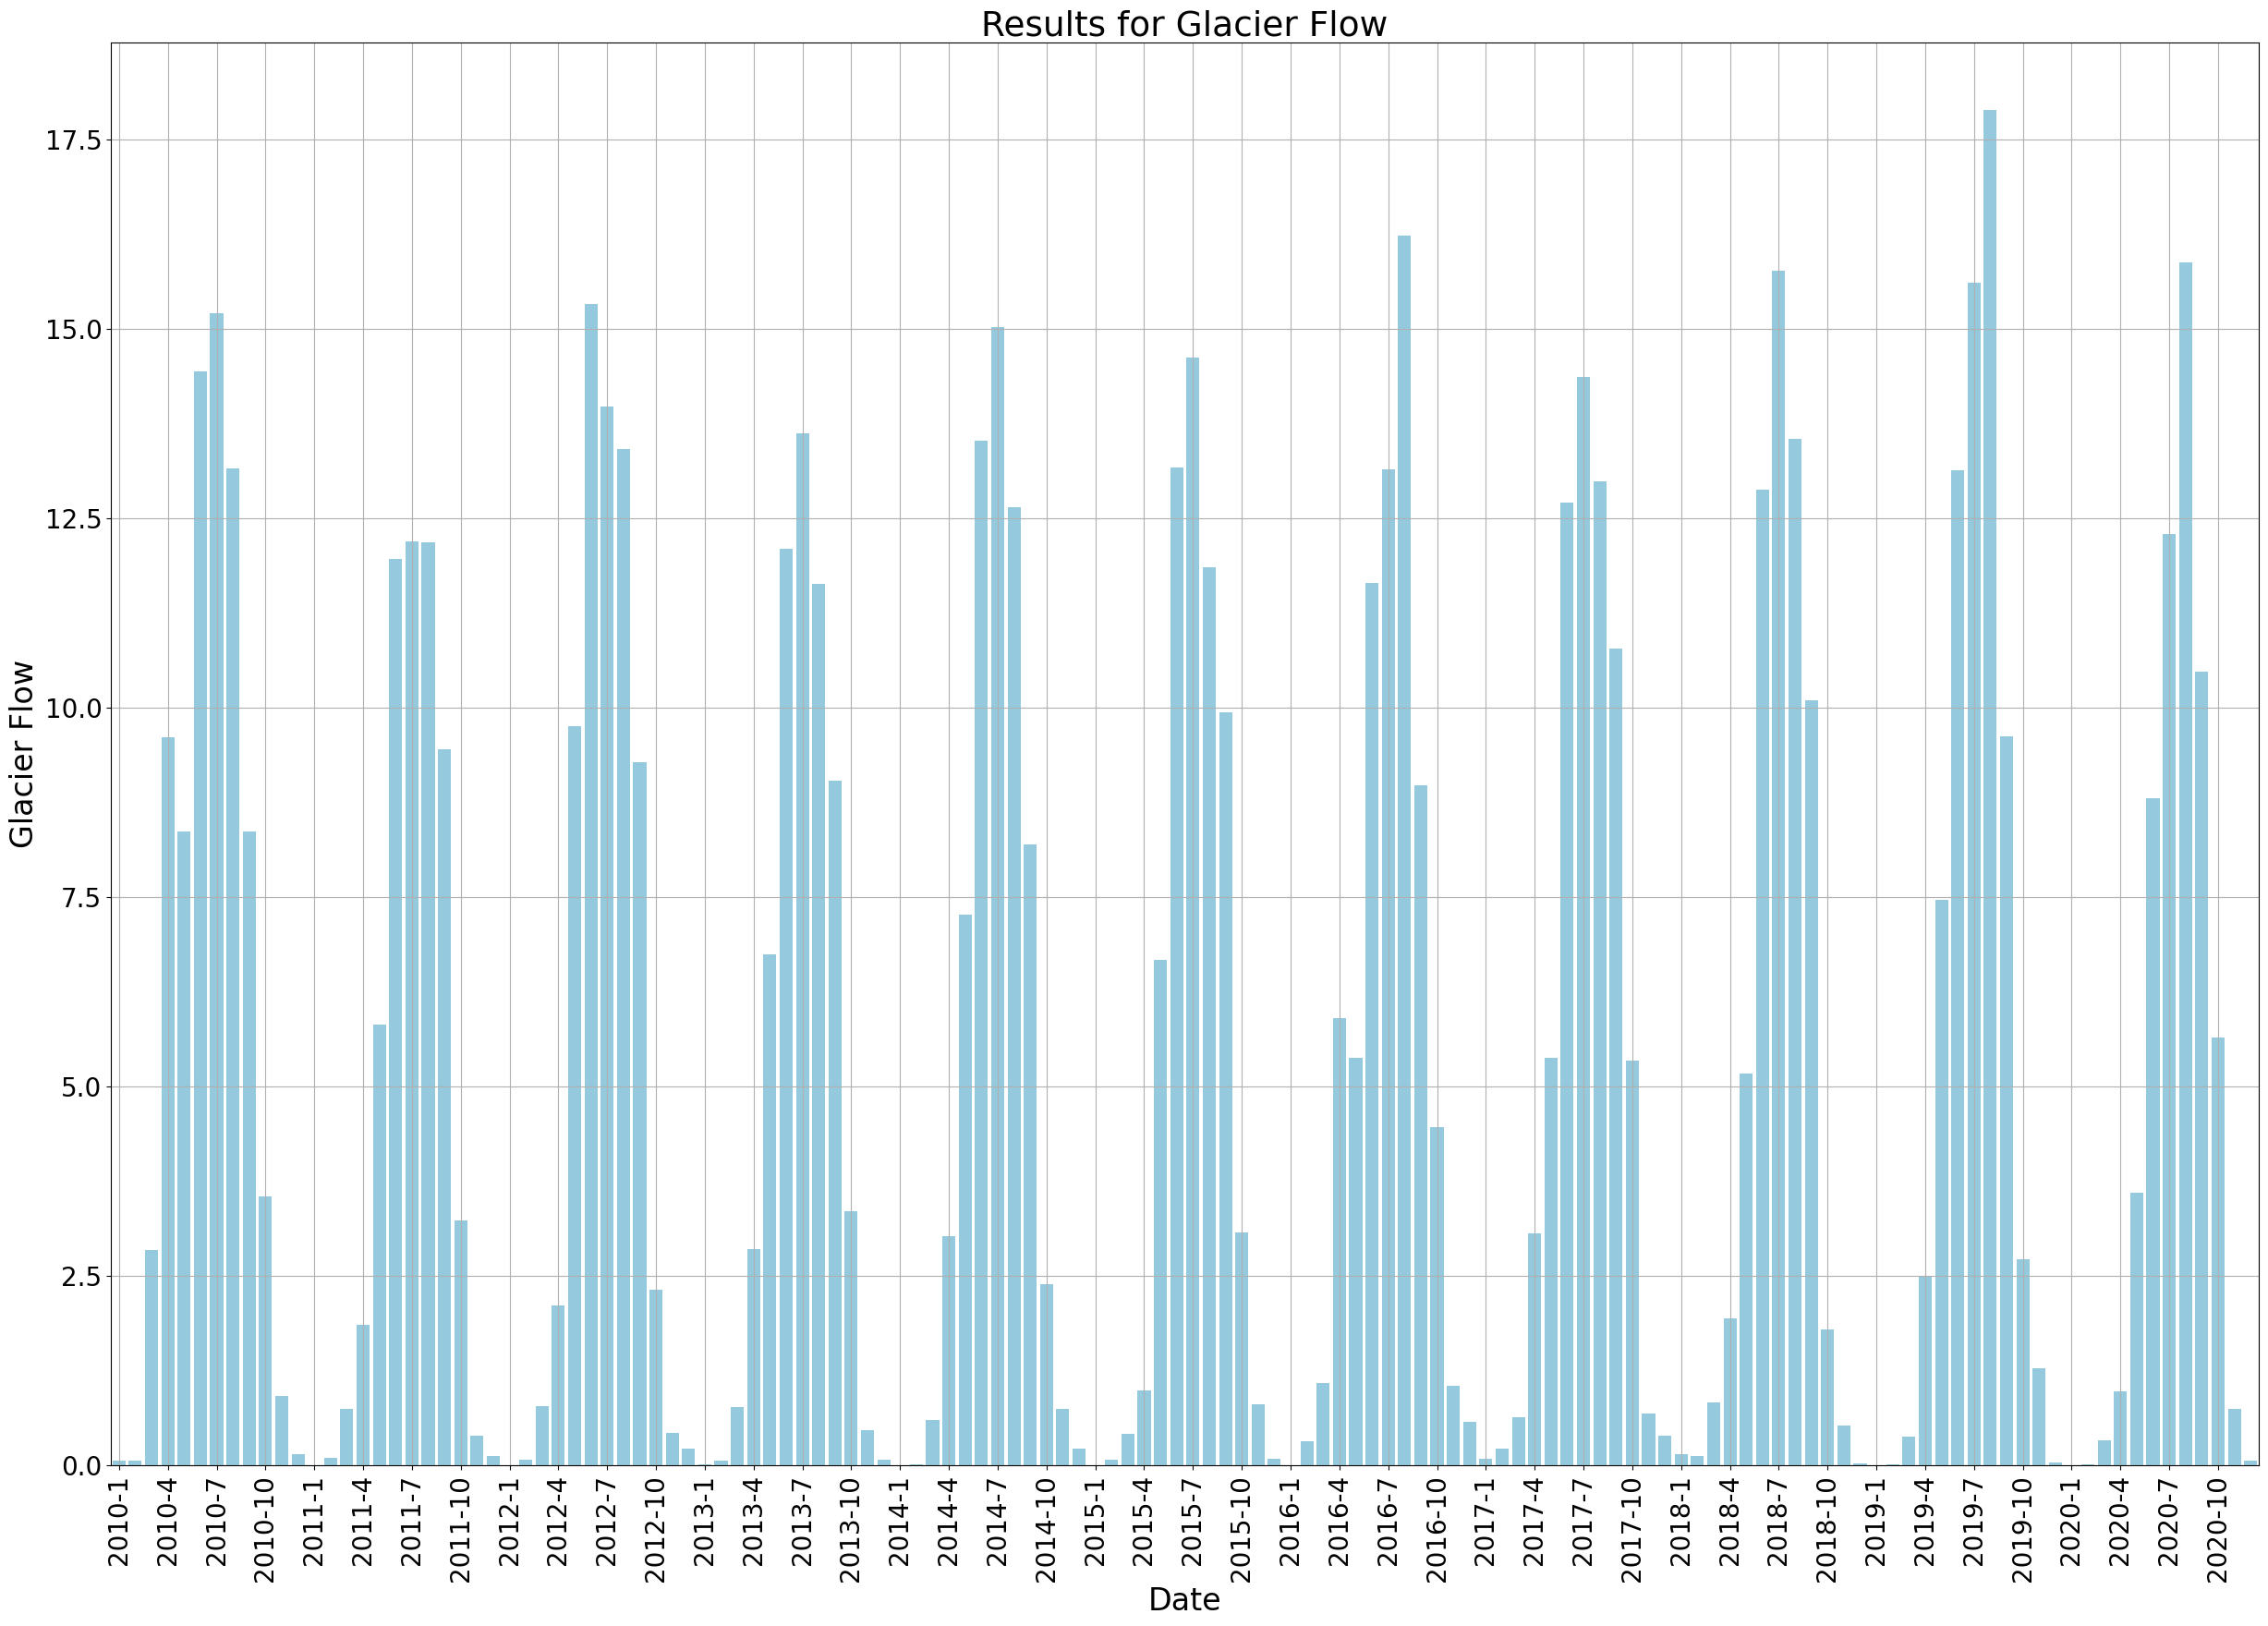

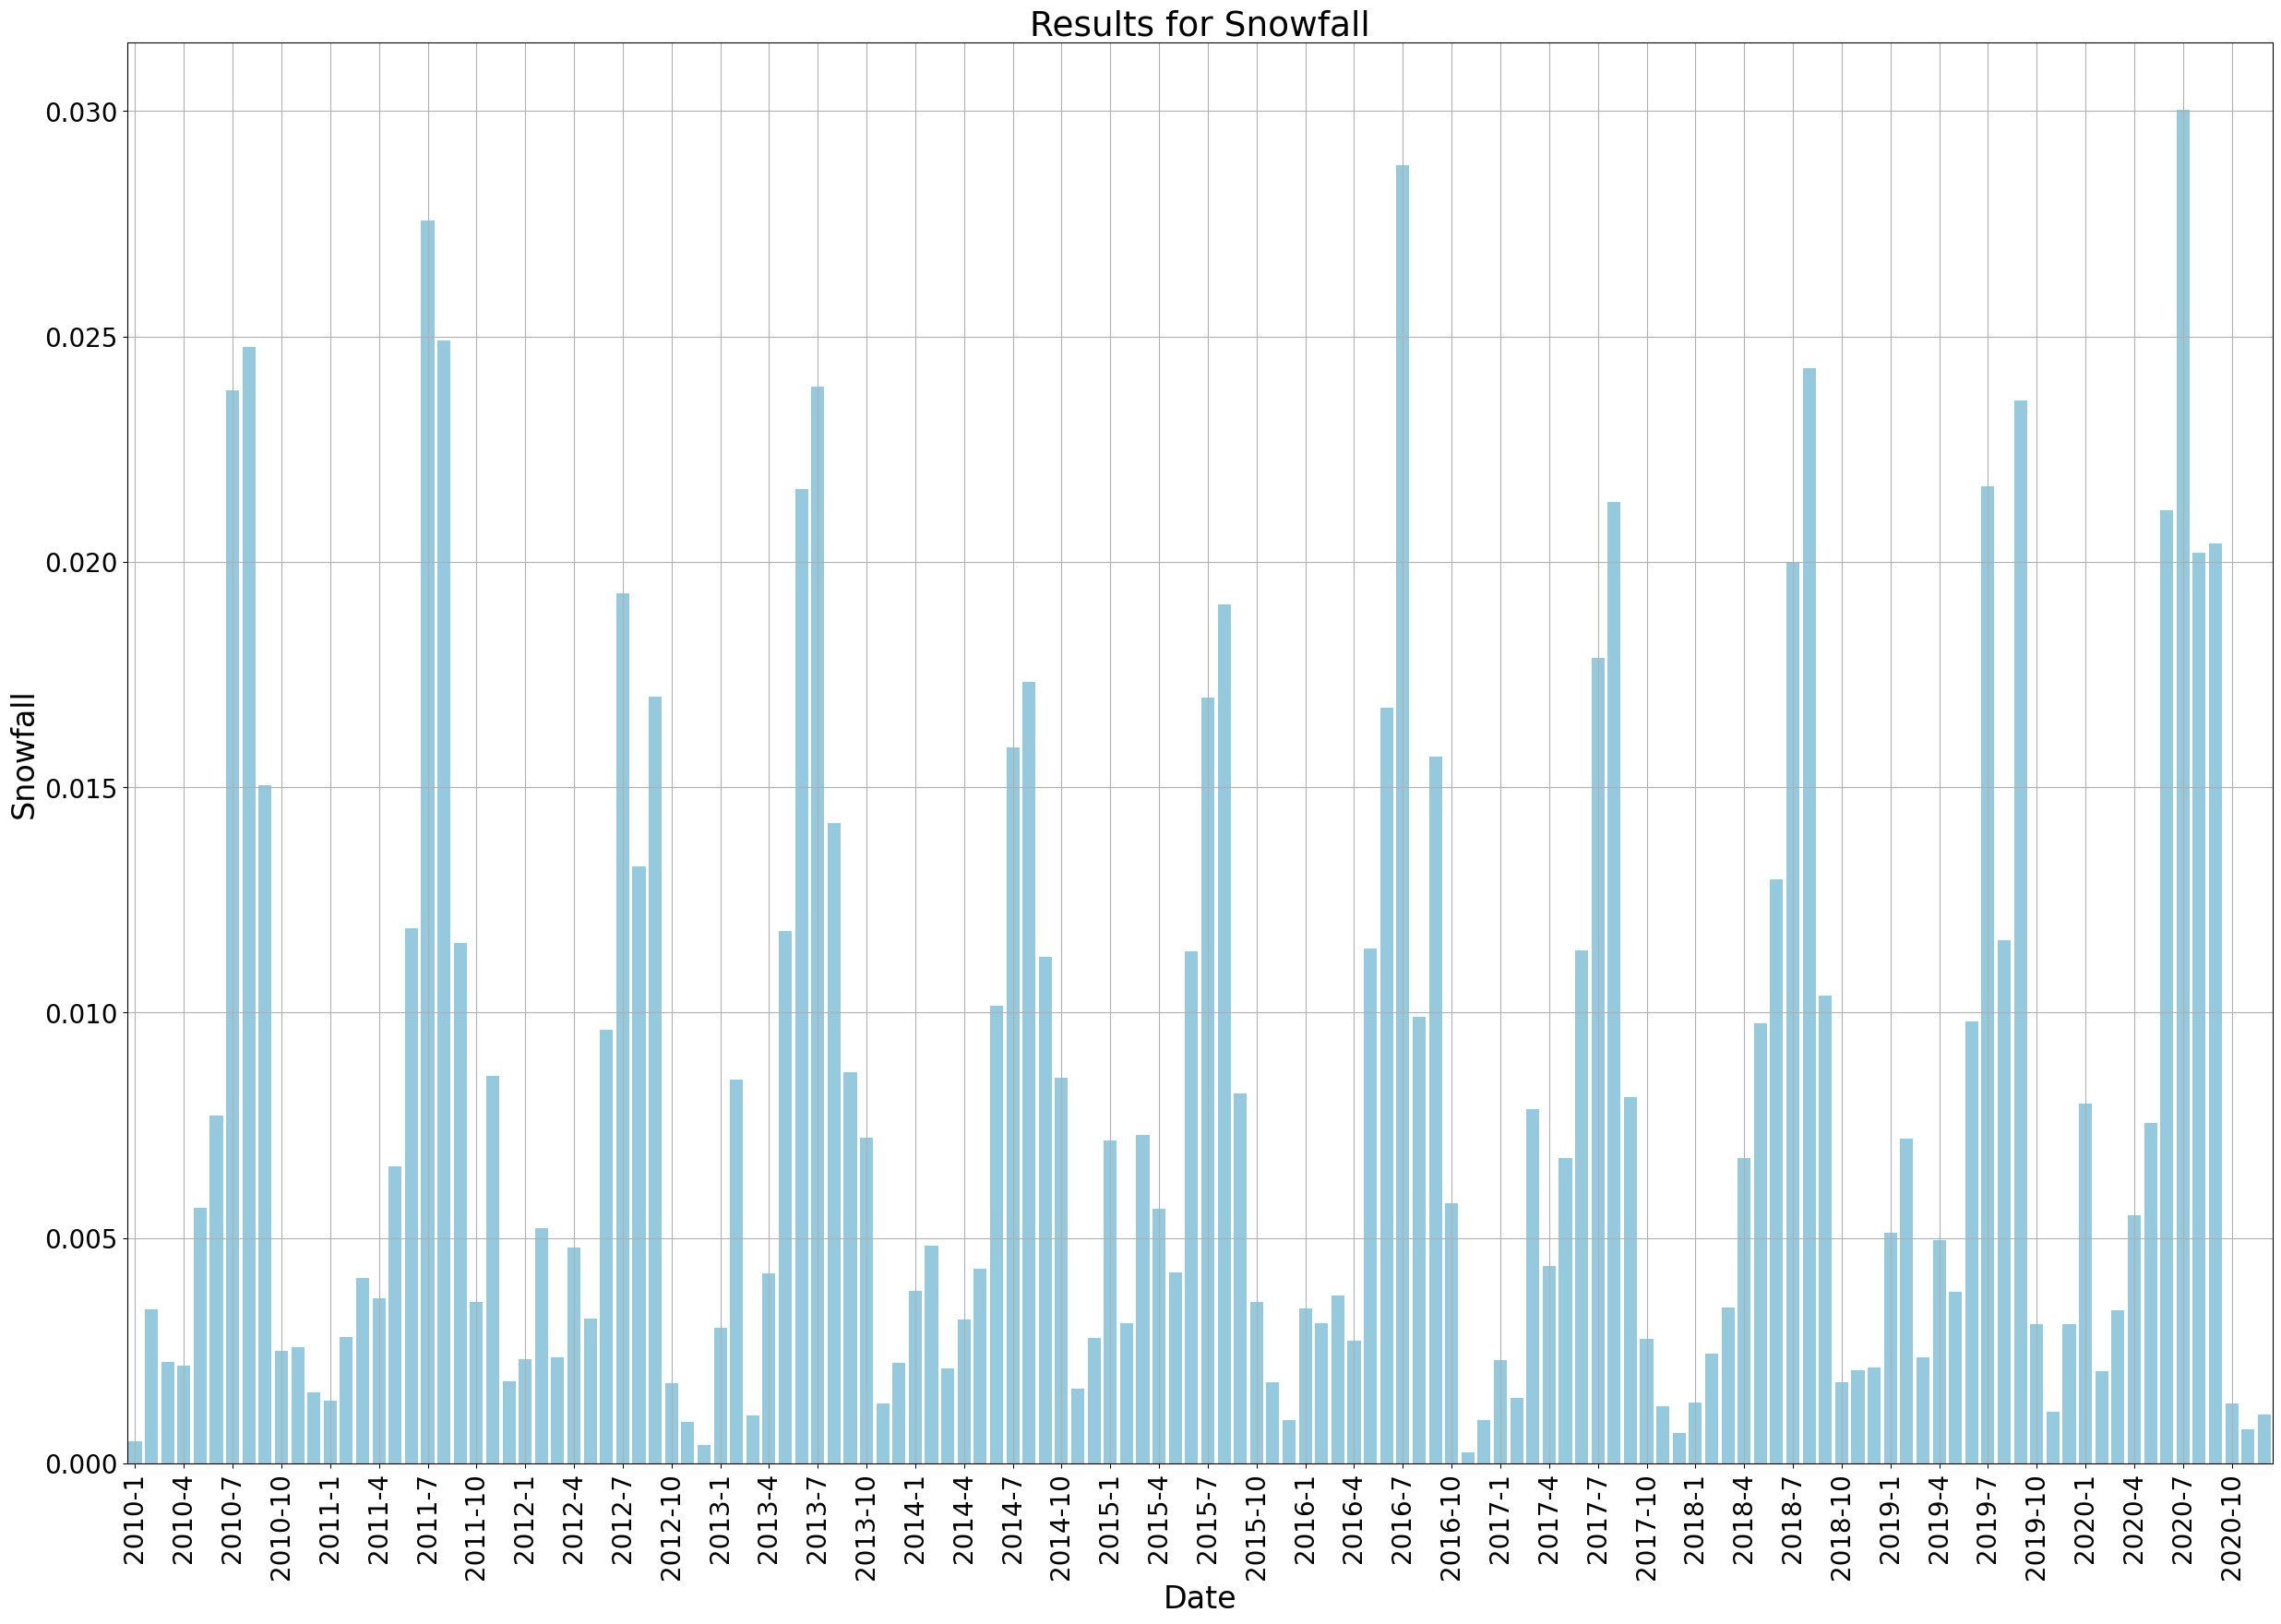

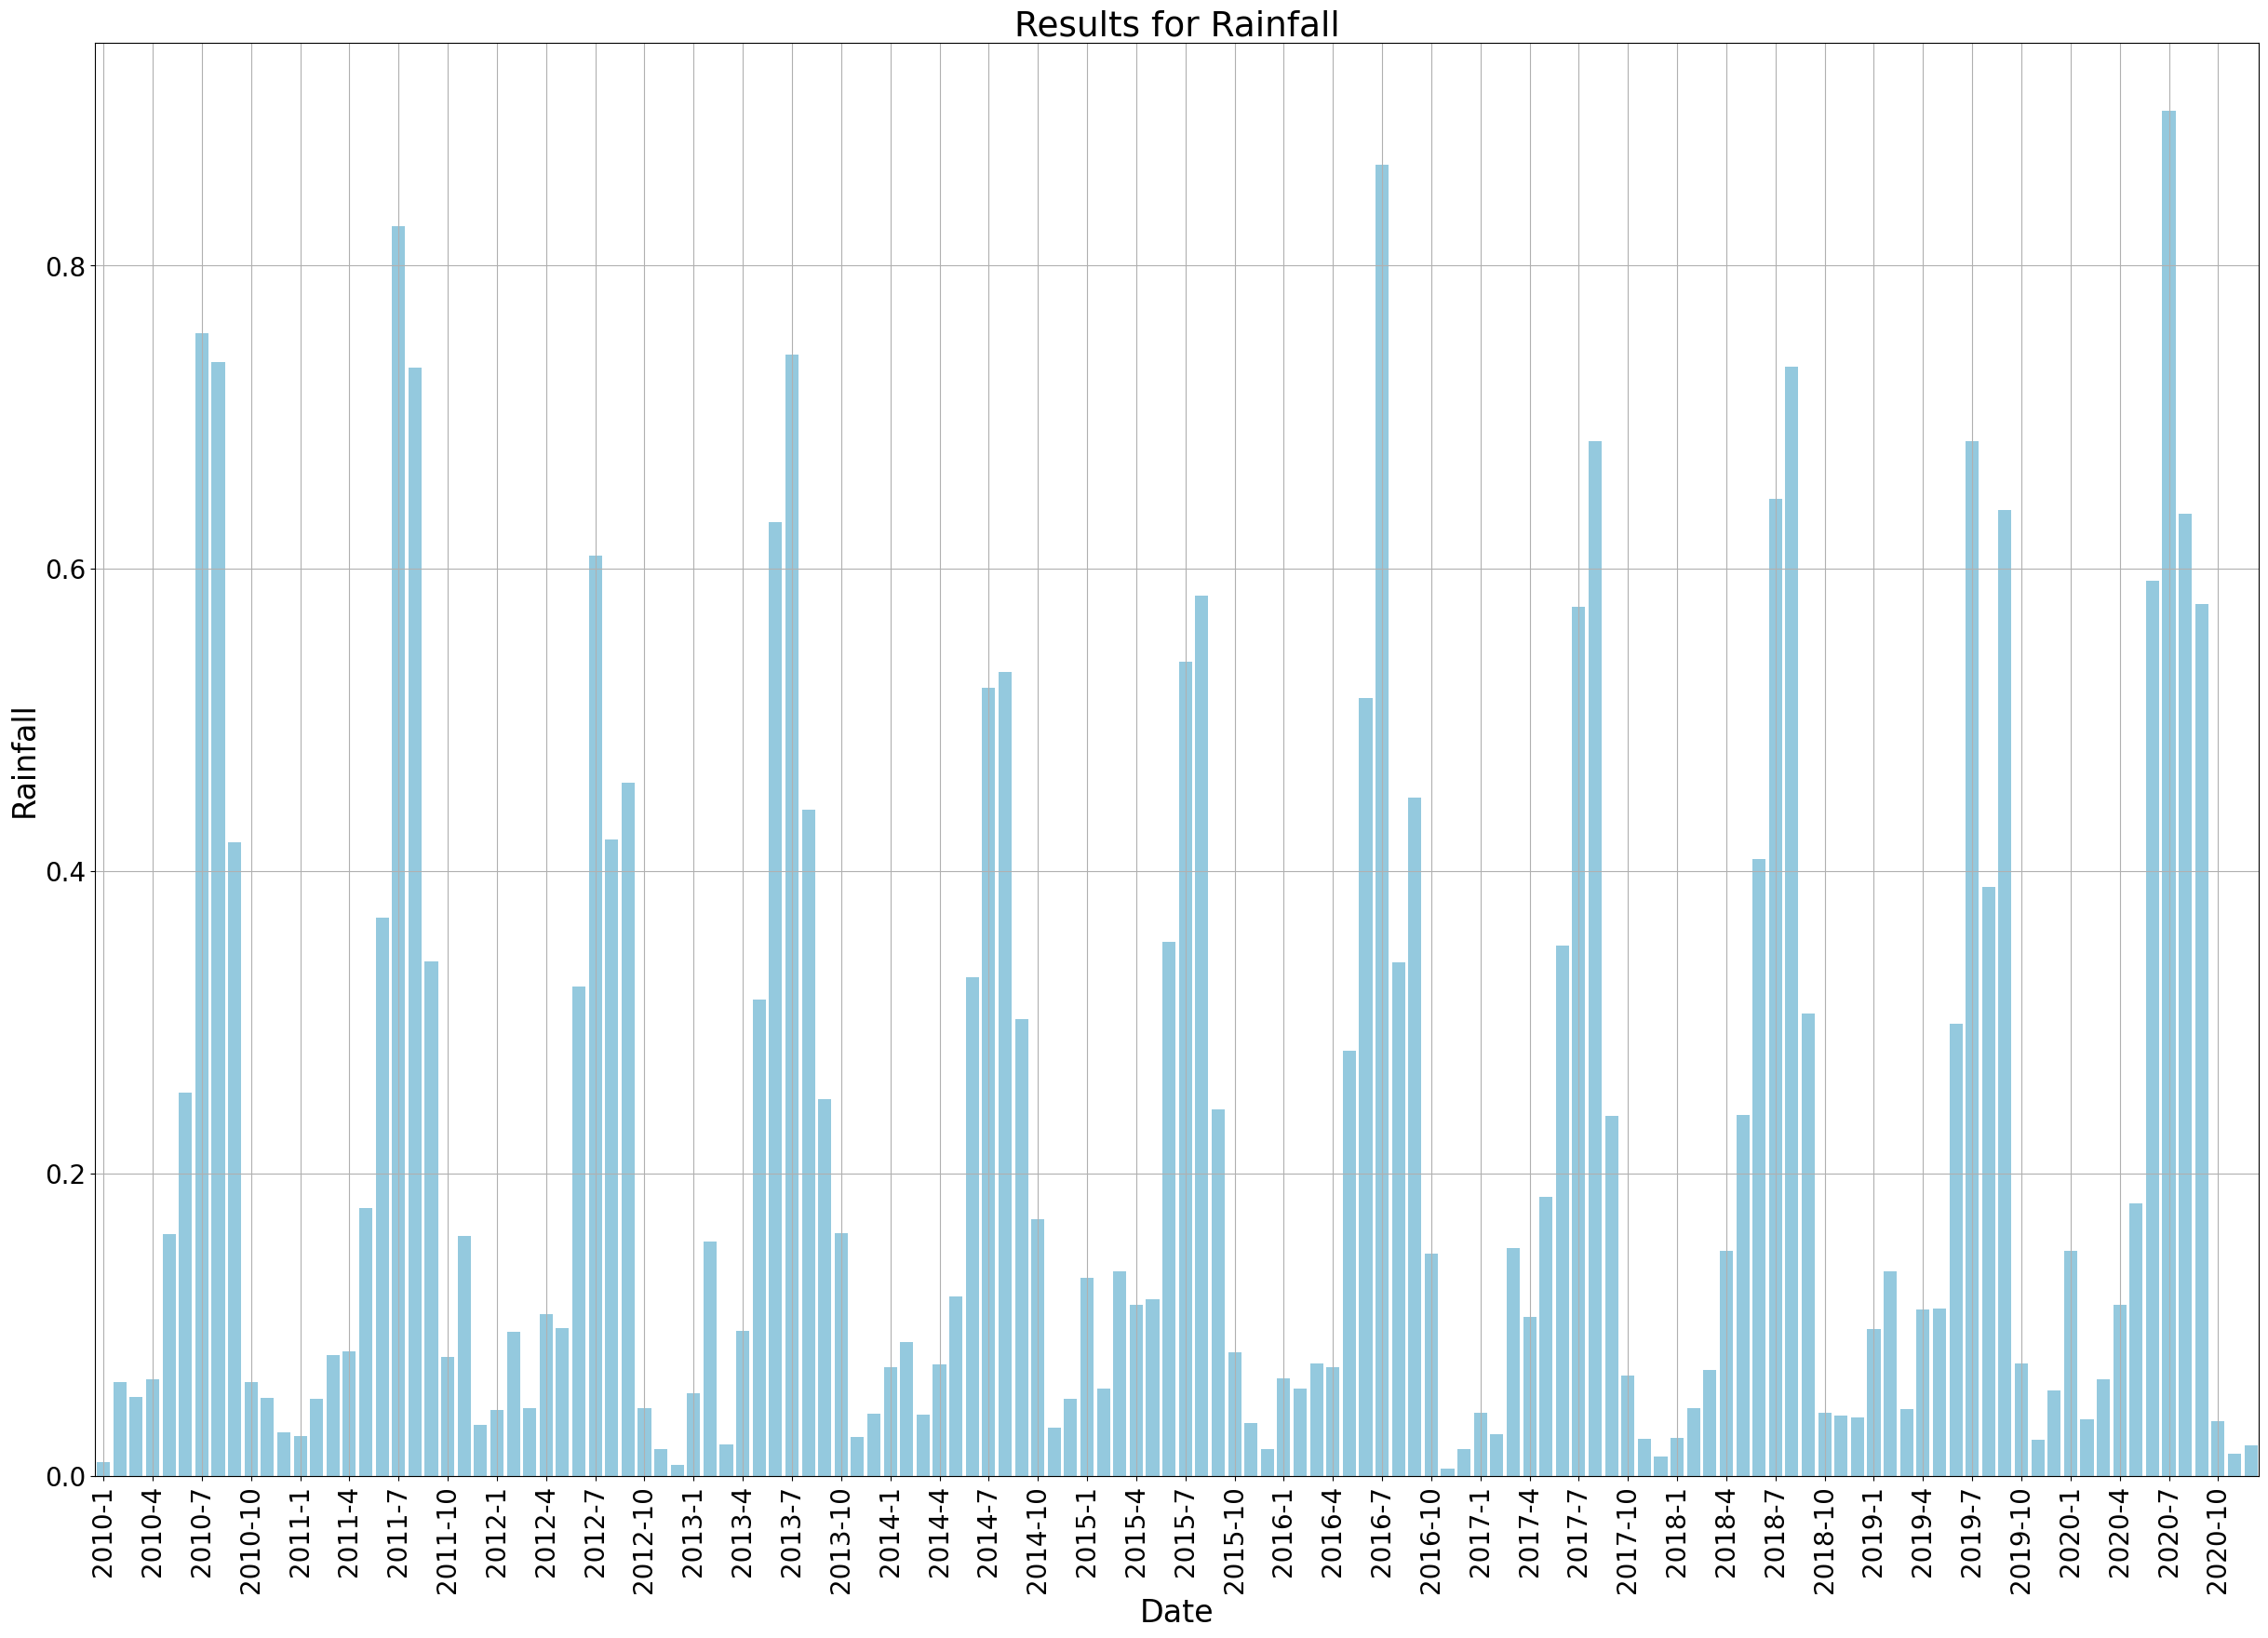

In [104]:
#ADD directory where you copied the output from the model simulation
work_dir = 'G:/manoj_doc/Books/MSc. Second Sem/Glacial hydrological modelling/Assignment/Meteorological analysis/OUTPUT/'
os.chdir(work_dir)

df_flow = pd.read_csv('out_flow.txt', header=None)
df_Qglac = pd.read_csv('out_Qglac.txt', header=None)
df_snowfall = pd.read_csv('out_snowfall.txt', header=None)
df_rainfall = pd.read_csv('final_tp.txt', sep=' ', header=None)
#display(df_rainfall)
df_result = pd.concat([df_flow[0],df_flow[1], df_flow[2], df_Qglac[2],df_snowfall[2], df_rainfall[2]], axis=1)
df_result.columns=['Date','Hour','Flow','Glacier Flow', 'Snowfall', 'Rainfall']
#display(df_result)
df_result.to_csv('result_summarized.csv', index=None, header=True)  

df_result['Date']=pd.to_datetime(df_result['Date'])
df_result["Datetime"] = df_result['Date'] + pd.to_timedelta(df_result['Hour'], unit='h')
df_result = df_result.drop(['Date', 'Hour'], axis=1)
df_result.set_index('Datetime', inplace=True)

df_result_month = df_result.resample('M').sum()
df_result_month = df_result_month.reset_index()
df_result_month['Date']=df_result_month['Datetime'].dt.year.astype(str) + '-' + df_result_month['Datetime'].dt.month.astype(str)
display(df_result_month)

#df_result_month.plot(kind='bar', x='Datetime')
col_name=df_result_month.columns
for cname in col_name[1:len(col_name)-1]:
    sns.barplot(df_result_month, x='Date', y=cname, color='skyblue', orient="v")
    #plt.bar(df_result_month['Datetime'], df_result_month['Flow'], color='red', label='Flow', width=15)
    #plt.bar(df_result_month['Datetime'], df_result_month['Rainfall'], color='blue', label='Rainfall', width=15)
    plt.xlabel('Date', fontsize=24)
    plt.ylabel(cname, fontsize=24)
    title='Results for ' + cname
    #plt.legend(bbox_to_anchor=(1.4,0.5),loc='upper right')
    plt.title(title, fontsize=27)
    plt.gcf().set_size_inches(30,20)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)
    plt.xticks(range(0, len(df_result_month), 3), df_result_month['Date'].iloc[::3])
    #plt.savefig(fname, bbox_inches='tight')
    fname = 'result_for_'+cname+'.jpg'
    plt.savefig(fname, bbox_inches='tight', dpi=600, pad_inches=0.5)
    plt.show()